# Preliminaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import norm
#import sharepy #This should allow grabbing files from sharepoint (Doesn't work)
#Seems to be an issue with passwords with symbols? try remove from passwords

In [2]:
full_method_list=['M06-2X','B3LYP','wB97M-V']

#full_basisset_list = ['STO-3G','6-31G','6-31Gd','6-31+G','6-31+Gd','6-31++Gdd','6-311G','6-311+G','6-311Gd','6-311+Gd','pc-0','pc-1','pc-2','aug-pc-0','aug-pc-1','aug-pc-2','pcseg-0','pcseg-1','pcseg-2','aug-pcseg-0','aug-pcseg-1','aug-pcseg2','cc-pVDZ','cc-pVTZ','aug-cc-pVDZ','aug-cc-pVTZ','def2-SVP','def2-TVP','def2-TVPP']
#Original list 

full_basisset_list = ['6-31++G','6-31++Gdd','6-31+G','6-31+Gd','6-31Gdd','6-311+G','6-311+Gd','6-311Gdd','6-311G','6-311G_2df_p','6-311Gd','6-31G','6-31G_2df_p','6-31Gd','STO-3G','aug-cc-pVDZ','aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2','aug-pcseg-0','aug-pcseg-1','cc-pVDZ','cc-pVTZ','def2-SVP','def2-SVPD','def2-TZVP','def2-TZVPD','def2-TZVPP','pc-0','pc-1','pc-2', 'pcseg-0','pcseg-1','pcseg-2']
len(full_basisset_list)

#full_basisset_list = ['aug-cc-pVTZ','aug-pc-0','aug-pc-1','aug-pc-2']



#full_basisset_list = pd.read_csv(f'29Sept/Results/fullbasislist.txt',header=None)
#This file doesnt exist, cant find it in any of the folders?

#full_basisset_list = full_basisset_list[0].tolist()
#.tolist() converts something to a list? why convert the first entry of a list to a list?

#DZ only
#full_basisset_list = ['6-31G','6-31Gd','pc-1','pcseg-1','cc-pVDZ','def2-SVP','6-31+G','6-31+Gd','aug-pc-1','aug-pcseg-1','aug-cc-pVDZ']


#SZ only
#full_basisset_list = ['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0']
#label="SingleZeta"

35

In [3]:
full_basisset_list
#prints list
#This is the new list taken from the old processing file (should be the contents of the file that is missing)

['6-31++G',
 '6-31++Gdd',
 '6-31+G',
 '6-31+Gd',
 '6-31Gdd',
 '6-311+G',
 '6-311+Gd',
 '6-311Gdd',
 '6-311G',
 '6-311G_2df_p',
 '6-311Gd',
 '6-31G',
 '6-31G_2df_p',
 '6-31Gd',
 'STO-3G',
 'aug-cc-pVDZ',
 'aug-cc-pVTZ',
 'aug-pc-0',
 'aug-pc-1',
 'aug-pc-2',
 'aug-pcseg-0',
 'aug-pcseg-1',
 'cc-pVDZ',
 'cc-pVTZ',
 'def2-SVP',
 'def2-SVPD',
 'def2-TZVP',
 'def2-TZVPD',
 'def2-TZVPP',
 'pc-0',
 'pc-1',
 'pc-2',
 'pcseg-0',
 'pcseg-1',
 'pcseg-2']

In [4]:
method='M06-2X'
basis='6-31G'
#Sets the basis set and method 
raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
#Loads file
raw_timings
raw_timings.describe()
raw_timings.sum()[1]
#sums columm 2 of raw_timings
#Calculates total time for basis set method combination 
#This works the same as the base code though the result there is 22624.340000000004

22624.34

# Timing Considerations

In [5]:
print('Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)' )
#inital print statement
Missing_Combinations = []
#new list for the missing combinations
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.sum()[1]/3600:.2f}',end=' ')
            #prints raw times in hours
        except:
            print(method,' ? ', end=' ')
            #Any file it cant find, puts a ? instead of a number
            Missing_Combinations.append(f'Time_{method}.{basis}.txt')
            continue
print('\n Missing Combinations = ',Missing_Combinations)#Almost all of these missing ones are in the base document - where are they now?
#Theyre in the folder - lied, theyre not there

Basis, M06-2X, Tot time (hrs), B3LYP, Tot time (hrs), wB97M-V, Tot time (hrs)

6-31++G M06-2X  ?  B3LYP 5.84 wB97M-V 27.49 
6-31++Gdd M06-2X 33.53 B3LYP 10.04 wB97M-V 23.63 
6-31+G M06-2X 27.03 B3LYP 18.46 wB97M-V 30.59 
6-31+Gd M06-2X 21.20 B3LYP 8.87 wB97M-V 30.36 
6-31Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311+G M06-2X 16.44 B3LYP  ?  wB97M-V 24.33 
6-311+Gd M06-2X 68.30 B3LYP 11.79 wB97M-V 26.97 
6-311Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311G M06-2X 8.90 B3LYP  ?  wB97M-V 16.96 
6-311G_2df_p M06-2X 54.88 B3LYP 25.57 wB97M-V 63.19 
6-311Gd M06-2X 13.76 B3LYP 4.07 wB97M-V 19.53 
6-31G M06-2X 6.28 B3LYP 7.74 wB97M-V 11.57 
6-31G_2df_p M06-2X 31.86 B3LYP 17.74 wB97M-V 36.83 
6-31Gd M06-2X 9.40 B3LYP 3.48 wB97M-V 16.83 
STO-3G M06-2X  ?  B3LYP 0.80 wB97M-V 11.14 
aug-cc-pVDZ M06-2X 213.47 B3LYP 722.03 wB97M-V 205.47 
aug-cc-pVTZ M06-2X 762.64 B3LYP 538.95 wB97M-V 682.13 
aug-pc-0 M06-2X 16.35 B3LYP  ?  wB97M-V 21.91 
aug-pc-1 M06-2X 79.14 B3LYP  ?  wB97M-V 151.87 
aug-pc-2 M06-2X 98

In [6]:
print('Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)' )
Missing_Combinations_Average = []
for basis in full_basisset_list:
    print()#idk why this print statement is here
    
    print(basis,end=' ') #  prints basis then space
    for method in full_method_list:
        try:
            raw_timings=pd.read_csv(f'29Sept/Results/Time_{method}.{basis}.txt',delimiter=' ')
           # print(f'{method} timings, {raw_timings.count()[0]:.0f}, {raw_timings.sum()[1]/3600:.2f} hrs total, {raw_timings.describe().mean()[0]:.0f}',end=' ')
            print(f'{method} {raw_timings.describe().mean()[0]/60:.2f}',end=' ')
            
        except:
            print(method,' ? ', end=' ')
            #prints average time taken to do the calculation in minutes
            Missing_Combinations_Average.append(f'Time_{method}.{basis}.txt')
            continue
print('\n The missing combinations are', Missing_Combinations_Average) # as above... where are the files  

Basis, M06-2X, Av time (hrs), B3LYP, Av time (mins), wB97M-V, Av time (mins)

6-31++G M06-2X  ?  B3LYP 5.72 wB97M-V 20.96 
6-31++Gdd M06-2X 34.37 B3LYP 12.15 wB97M-V 18.29 
6-31+G M06-2X 92.50 B3LYP 103.67 wB97M-V 36.56 
6-31+Gd M06-2X 29.55 B3LYP 8.36 wB97M-V 38.08 
6-31Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311+G M06-2X 21.13 B3LYP  ?  wB97M-V 30.76 
6-311+Gd M06-2X 293.36 B3LYP 16.65 wB97M-V 18.18 
6-311Gdd M06-2X  ?  B3LYP  ?  wB97M-V  ?  
6-311G M06-2X 7.02 B3LYP  ?  wB97M-V 12.98 
6-311G_2df_p M06-2X 65.49 B3LYP 18.65 wB97M-V 70.93 
6-311Gd M06-2X 13.54 B3LYP 3.46 wB97M-V 19.24 
6-31G M06-2X 4.74 B3LYP 5.77 wB97M-V 7.68 
6-31G_2df_p M06-2X 21.32 B3LYP 12.92 wB97M-V 21.82 
6-31Gd M06-2X 8.74 B3LYP 2.75 wB97M-V 13.18 
STO-3G M06-2X  ?  B3LYP 1.09 wB97M-V 8.32 
aug-cc-pVDZ M06-2X 596.74 B3LYP 152.54 wB97M-V 324.15 
aug-cc-pVTZ M06-2X 579.73 B3LYP 542.68 wB97M-V 453.71 
aug-pc-0 M06-2X 15.35 B3LYP  ?  wB97M-V 23.33 
aug-pc-1 M06-2X 73.56 B3LYP  ?  wB97M-V 278.38 
aug-pc-2 M06-2X 721

# Energy Accuracy Data Import and Processing

In [7]:
Test = pd.read_csv(f'29Sept/Results/Energies_B3LYP.6-31++G.txt',delimiter=' ',header = None, index_col = 0,squeeze=True).to_dict()
Test
#Just a test to see what the files are like.

{'Molecule,': 'Energy_Hartree',
 'ACONF_H_g+x-t+': '-237.0295106903',
 'ACONF_H_ttt': '-237.0350923589',
 'ACONF_H_x+g-g-': '-237.0278289076',
 'AHB21_10': '-152.2378257705',
 'AHB21_10A': '-75.7849063119',
 'AHB21_10B': '-76.3880910139',
 'AHB21_15': '-455.3646507893',
 'AHB21_15A': '-398.8117304758',
 'AHB21_15B': '-56.537527998',
 'AHB21_6': '-560.7411257589',
 'AHB21_6A': '-460.2714609473',
 'AHB21_6B': '-100.4273911609',
 'AL2X6_al2me5': '-685.0226450486',
 'AL2X6_alme2': '-322.8377169174',
 'Amino20x4_ALA_xab': '-495.7155109117',
 'Amino20x4_ALA_xag': '-495.7267077687',
 'Amino20x4_ARG_xbv': '-778.4328429385',
 'Amino20x4_ARG_xci': '-778.4433533034',
 'Amino20x4_ASP_xau': '-684.2287884073',
 'Amino20x4_ASP_xaz': '-684.2357908299',
 'Amino20x4_GLU_xav': '-723.5393065215',
 'Amino20x4_GLU_xbi': '-723.5414058885',
 'Amino20x4_ILE_xae': '-613.638306767',
 'Amino20x4_ILE_xag': '-613.636618034',
 'Amino20x4_LEU_xad': '-613.641335024',
 'Amino20x4_LEU_xap': '-613.6413603955',
 'Amino20x

In [ ]:
Missing_Combinations_Energies = []
for method in full_method_list:
    #Loops over all methods in the list (3)
    for basis in full_basisset_list:
    #loops over all basis sets in the list
        try:
            calcE=pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', delimiter=' ', header=None, index_col=0, squeeze=True).to_dict()
            #reads the file Energies_method.basis.txt and converts to a dict
            print(method,basis,' imported')
          # print(calcE)
        except:
            print(method,basis,'not found')
            
            Missing_Combinations_Energies.append(f'Energies_{method}.{basis}.txt')
            continue
        y=open(f'29Sept/Results/Benchmark_{method}.{basis}.csv','w')
        y.write("Reaction id,Database,Calc\n")

#added the f'29Sept/Results/...
        
        x=open(f'29Sept/Results/DatasetEval.csv','r')
        f = x.readlines()
        for line in f:

            g = line.split(',')
#            print(g) #g is the dataseteval file in many many lists (this prints that!)
            id= g[0]
            print(id) #this is just the reaction ids 
            calcvalue=0
            for i in range(1,len(g)-1,2):
                
                print(i)
                try:
                    refvalue = float(g[len(g)-1])#*  2625.499638 #This causes some weird errors with the graphs
                    dictvalue= float(calcE[g[i+1]])
                  #  print('dictvalue = ',dictvalue)
                    calcvalue+=float(g[i])*dictvalue
                except:
                  #  print('g[i+1] = ', g[i+1])
                    calcvalue=float('Nan')
            calcvalue = calcvalue *  2625.499638 #conversion to kj/mol
          #  diff = calcvalue - refvalue
          #  print(refvalue)
          #  print(calcvalue)
            y.write("{0}, {1}, {2} \n".format(id, refvalue, calcvalue))
        y.close()
        x.close()
print('\n Missing Energy files = ', Missing_Combinations_Energies)
#These files are missing as well. 

In [184]:
Missing_Combinations_Benchmarks = []
temp = pd.read_csv(f'29Sept/Results/Benchmark_M06-2X.STO-3G.csv')
data = temp
for method in full_method_list:
    for basis in full_basisset_list:
        try:
            temp = pd.read_csv(f'29Sept/Results/Benchmark_{method}.{basis}.csv')
            print(f'{method} {basis} imported')
        except:
            print(f'{method}.{basis} not found')
            Missing_Combinations_Benchmarks.append(f'Benchmark_{method}.{basis}.csv')
            continue
        data[f'{method}_{basis}']=pd.to_numeric(temp['Calc'],errors='coerce')
print(Missing_Combinations_Benchmarks)
#Imports data and tell us which of these files are missing as well

M06-2X 6-31++G imported
M06-2X 6-31++Gdd imported
M06-2X 6-31+G imported
M06-2X 6-31+Gd imported
M06-2X 6-31Gdd imported
M06-2X 6-311+G imported
M06-2X 6-311+Gd imported
M06-2X 6-311Gdd imported
M06-2X 6-311G imported
M06-2X 6-311G_2df_p imported
M06-2X 6-311Gd imported
M06-2X 6-31G imported
M06-2X 6-31G_2df_p imported
M06-2X 6-31Gd imported
M06-2X STO-3G imported
M06-2X aug-cc-pVDZ imported
M06-2X aug-cc-pVTZ imported
M06-2X aug-pc-0 imported
M06-2X aug-pc-1 imported
M06-2X aug-pc-2 imported
M06-2X aug-pcseg-0 imported
M06-2X aug-pcseg-1 imported
M06-2X cc-pVDZ imported
M06-2X cc-pVTZ imported
M06-2X def2-SVP imported
M06-2X def2-SVPD imported
M06-2X def2-TZVP imported
M06-2X def2-TZVPD imported
M06-2X def2-TZVPP imported
M06-2X pc-0 imported
M06-2X pc-1 imported
M06-2X pc-2 imported
M06-2X pcseg-0 imported
M06-2X pcseg-1 imported
M06-2X pcseg-2 imported
B3LYP 6-31++G imported
B3LYP 6-31++Gdd imported
B3LYP 6-31+G imported
B3LYP 6-31+Gd imported
B3LYP 6-31Gdd imported
B3LYP 6-311+G im

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_89862/2913548779.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{method}_{basis}']=pd.to_numeric(temp['Calc'],errors='coerce')


In [10]:
Df = data
Df.dtypes
#checking datatype

Reaction id          object
Database            float64
Calc                 object
M06-2X_6-31++G      float64
M06-2X_6-31++Gdd    float64
                     ...   
wB97M-V_pc-1        float64
wB97M-V_pc-2        float64
wB97M-V_pcseg-0     float64
wB97M-V_pcseg-1     float64
wB97M-V_pcseg-2     float64
Length: 108, dtype: object

In [11]:
Df=Df.drop(['Calc'], axis=1)
Df.count()
#dropping calc 

Reaction id         1499
Database            1499
M06-2X_6-31++G       124
M06-2X_6-31++Gdd     135
M06-2X_6-31+G        135
                    ... 
wB97M-V_pc-1         135
wB97M-V_pc-2         135
wB97M-V_pcseg-0      135
wB97M-V_pcseg-1      135
wB97M-V_pcseg-2      135
Length: 107, dtype: int64

In [12]:
Df['Database']
#Checking database

0       0.000953
1       0.000978
2       0.001531
3       0.004483
4       0.000948
          ...   
1494    0.121703
1495    0.071393
1496    0.095791
1497    0.106118
1498    0.124301
Name: Database, Length: 1499, dtype: float64

In [187]:
Df[100:120]

Reaction id     Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  \
1205      S66_47    12.049932       11.761621         12.135964   
1219      S66_61    12.175452       12.497480         11.243455   
1240    SCONF_16    25.773462        7.216454         18.625404   
1262    TAUT15_5    54.517568       37.257817         56.213378   
1270   TAUT15_13     2.301201        3.621136          1.903992   
1274     UPU23_2    12.426492       20.519187         17.102851   
1276     UPU23_4     9.288489       12.709468          9.135369   
1281     UPU23_9    30.375867       37.105478         33.906891   
1287    UPU23_15    22.928339       25.310960         25.707673   
1297     W4-11_2   891.899891             NaN        863.465917   
1302     W4-11_7   798.077793             NaN        795.907257   
1325    W4-11_30   449.776217             NaN        428.734814   
1326    W4-11_31   763.961426             NaN        740.061118   
1333    W4-11_38   448.558672             NaN        435.873661   
1353    W4-11_58   942.547256      866.861119        948.638227   
1358    W4-11_63  2232.007000             NaN       2200.945197   
1368    W4-11_73  1247.682467             NaN       1230.462332   
1372    W4-11_77  1908.206952             NaN       1878.853427   
1380    W4-11_85  1632.351401     1368.255226       1595.079195   
1381    W4-11_86  1615.389450     1412.668297       1589.241960   

      M06-2X_6-31+G  M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  \
1205      11.245370       11.302170       12.919686       12.988103   
1219      12.068758       10.880368       15.658751       13.350278   
1240       6.836491       16.216266        1.351102        7.738736   
1262      37.483499       61.177495       63.850190       34.752636   
1270       3.652390        1.696892        0.622901        3.083158   
1274      19.793795       17.126694       13.383553       17.924684   
1276      12.456595        8.584156        5.694550       11.521572   
1281      37.592150       33.842728       27.865400       35.675628   
1287      24.306778       25.150947       23.212898       21.862764   
1297     828.489615      868.989327             NaN      823.162118   
1302     779.726002      795.822620             NaN      773.552356   
1325     373.981837      419.704894             NaN      372.099691   
1326     682.045507      732.394149             NaN      677.255643   
1333     391.128097      425.502067             NaN      389.677986   
1353     866.861119      948.638228      956.065414      862.046769   
1358    2069.495213     2201.367941             NaN     2059.384624   
1368    1152.619063     1224.867816             NaN     1153.235252   
1372    1743.438538     1878.241519             NaN     1738.968723   
1380    1368.255226     1595.079195     1617.031745     1362.296480   
1381    1412.668297     1589.241959     1632.118515     1420.269049   

      M06-2X_6-311+Gd  M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  \
1205        13.446202        13.291251  ...          19.232455   
1219        12.902075        15.988260  ...          17.467822   
1240        16.531308         3.906734  ...          15.575775   
1262        56.366140        55.679251  ...          57.194988   
1270         1.375039         1.707765  ...           2.770255   
1274        17.040999        13.509507  ...           3.285418   
1276         9.418298         9.351776  ...           5.453113   
1281        34.691635        33.082498  ...          32.956859   
1287        25.907230        26.052880  ...          22.317442   
1297       860.660034              NaN  ...         906.377544   
1302       792.289806              NaN  ...         810.616790   
1325       416.172294              NaN  ...         448.409970   
1326       727.703472              NaN  ...         784.988249   
1333       419.615801              NaN  ...         455.398236   
1353       957.174065       958.979267  ...         932.147581   
1358      2205.409641              NaN  ...      

## Cleaning Data

In [14]:
#pd.set_option('display.max_rows', None)
#print(df.count())
#pd.set_option('display.max_rows', 20)
#Not sure what this does

In [15]:
Df=Df.dropna(thresh=30)
Df=Df.dropna(axis=1,thresh=20)
#Drops na

In [16]:
#Df[46:47]
#Prints df

In [17]:
Df['Database'] = Df['Database']*2625.5
# Converting to kJ/mol

In [18]:
Df[46:47]

Reaction id  Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
546     FH51_48 -3.598242       -4.185921         -3.833902      -4.112205   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
546       -3.735411       -3.544438       -4.712784        -4.051128   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
546        -3.943012  ...          -3.091809           -2.94583   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
546           -2.965149            -3.02474     -9.355539     -2.968435   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
546     -3.028839         -8.83719         -2.76199        -3.024219  

[1 rows x 107 columns]

In [19]:
Df = Df.drop(46)

#Still dont really know what this is
#Show Laura - So if you dont do this the error increases insanely, this reaction calculation is so bad by everything 
#2210x bigger value that the database
#This removes the reaction FH51_48 from the set and you need too.... 
#Its not actually that bad but if you dont remove? 

In [20]:
Df.iloc[55]

Reaction id         HAL59_16
Database            4.978964
M06-2X_6-31++G        7.0023
M06-2X_6-31++Gdd     3.24808
M06-2X_6-31+G       6.790552
                      ...   
wB97M-V_pc-1        4.993817
wB97M-V_pc-2        3.597033
wB97M-V_pcseg-0     7.696916
wB97M-V_pcseg-1     4.790673
wB97M-V_pcseg-2     3.511098
Name: 651, Length: 107, dtype: object

In [21]:
#df['B3LYP_aug-cc-pVTZ'].isnull().values

In [22]:
Df

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
10      ACONF_11   11.012297        8.917241          9.615086       9.005341   
13      ACONF_14   12.899284       10.749396         11.357444      10.877744   
26       AHB21_6 -106.775774     -113.322399       -108.306883    -113.587432   
30      AHB21_10 -156.105181     -182.279688       -177.802364    -182.506510   
35      AHB21_15  -36.066113      -45.262878        -39.385556     -45.386141   
...          ...         ...             ...               ...            ...   
1486    YBDE18_6  216.480354       82.886067        175.717890      82.498189   
1488    YBDE18_8  224.806521      249.999212        202.104553     249.622666   
1489    YBDE18_9  136.314842      153.851502        141.187012     153.677169   
1493   YBDE18_13  218.739715       51.546105        182.338707      51.233771   
1496   YBDE18_16  251.500465      133.777581        213.387285     133.951707   

      M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
10          9.695630        9.380298        7.570435         8.872310   
13         11.603179       10.805606        8.751417        10.167440   
26       -107.719741     -110.934766     -113.803427      -111.630301   
30       -172.009987     -232.627646     -183.383384      -174.765295   
35        -39.516001      -45.447217      -44.952181       -40.265195   
...              ...             ...             ...              ...   
1486      175.950680      171.290521       80.001940       177.049243   
1488      203.028113      187.370085      249.607886       206.872426   
1489      145.574389      150.514319      153.949860       146.344184   
1493      182.657236      210.146315       55.896291       186.225902   
1496      214.101933      212.838866      137.518572       218.976134   

      M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
10           8.963197  ...           9.199943          10.695056   
13          10.077478  ...          10.031453          12.021267   
26        -103.725424  ...        -108.423152        -122.555689   
30        -229.978808  ...        -162.512702        -190.601857   
35         -36.949369  ...         -37.560385         -46.937235   
...               ...  ...                ...                ...   
1486       175.260098  ...         201.214323         216.084150   
1488       198.676066  ...         241.727837         212.624053   
1489       147.690953  ...         138.729068         128.526094   
1493       200.673195  ...         167.503065         194.704584   
1496       217.479996  ...         236.016368         247.461554   

      wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
10             10.855707           10.866343      7.052698     10.877499   
13             12.207872           12.158424      6.848815     11.907209   
26           -106.280833         -121.419300   -171.003406   -124.682682   
30           -158.194103         -189.007561   -337.792451   -227.930025   
35            -35.525326          -46.412782    -75.375250    -52.545602   
...                  ...                 ...           ...           ...   
1486          216.254897          216.200206     89.061668    184.739924   
1488          215.827367          212.970894    245.144730    219.016415   
1489          125.266777          127.709385    208.748993    132.767652   
1493          189.981687          194.466864    137.113169    163.370279   
1496          248.226012          247.680062    139.438057    221.228924   

      wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
10       11.119655         7.946767        11.122856        11.105519  
13       12.459424         7.474510        12.237075        12.411783  
26     -116.485338      -143.447415      -113.539480      -119.212200  
30     -182.004708      -277.850486      -225.920961      -180.595281  
35      -42.122238       -69.365573       -42.998885       -44.85

In [186]:
df = pd.DataFrame(columns=Df.columns.values)
Reaction_List = ['ACONF_11', 'ACONF_14', 'AHB21_6', 'AHB21_10', 'AHB21_15', 'AL2X6_5', 
                 'Amino20x4_4', 'Amino20x4_6', 'Amino20x4_15', 'Amino20x4_25', 'Amino20x4_39', 
                 'Amino20x4_41', 'Amino20x4_46', 'Amino20x4_68', 'BH76_8', 'BH76_36', 'BH76_37', 
                 'BH76_47', 'BH76_50', 'BH76_53', 'BH76_66', 'BH76RC_5', 'BHPERI_2', 'BHPERI_8', 
                 'BHPERI_25', 'BHROT27_3', 'BHROT27_11', 'BHROT27_14', 'BHROT27_21', 'BSR36_17',
                'BSR36_22', 'BUT14DIOL_2', 'BUT14DIOL_29', 'BUT14DIOL_32', 'BUT14DIOL_38', 
                 'BUT14DIOL_39', 'BUT14DIOL_42', 'BUT14DIOL_43', 'BUT14DIOL_53', 'CDIE20_1',
                'CDIE20_18', 'CDIE20_20', 'CHB6_2', 'DARC_11', 'DC13_10', 'DC13_13', 'DIPCS10_2',
                'FH51_26', 'FH51_27', 'FH51_40', 'G21EA_17', 'G21EA_20', 'G21EA_23',
                'G21IP_6', 'G21IP_15', 'G21IP_31', 'G2RC_16', 'G2RC_24', 'G2RC_25','ICONF_16', 'IDISP_3', 
                'IL16_11', 'IL16_14', 'INV24_1', 'INV24_14', 
                'INV24_15', 'ISO34_21', 'ISOL24_2', 'ISOL24_4', 'ISOL24_20', 'MB16-43_14', 'MCONF_11',
                'MCONF_20', 'MCONF_30', 'NBPRC_1', 'PA26_20', 'PA26_25', 'PArel_13', 'PCONF21_3',
                'PNICO23_7', 'PNICO23_11', 'PNICO23_13', 'PNICO23_21', 'PX13_8', 'RC21_5', 'RC21_6',
                'RC21_8', 'RC21_16', 'RC21_20', 'RG18_11', 'RG18_13', 'RG18_15', 'RSE43_14', 'RSE43_40',
                'S22_3', 'S22_8', 'S22_11', 'S66_8', 'S66_17', 'S66_25', 'S66_28', 'S66_42', 'S66_47',
                'S66_61', 'SCONF_66', 'SIE4x4_15', 'TAUT15_5', 'TAUT15_13', 'UPU23_2', 'UPU23_4', 'UPU23_9',
                'UPU23_15', 'W4-11_2', 'W4-11_7', 'W4-11_30', 'W4-11_31', 'W4-11_38', 'W4-11_58', 'W4-11_63',
                'W4-11_73', 'W4-11_77', 'W4-11_85', 'W4-11_86', 'W4-11_95', 'W4-11_102', 'W4-11_106', 
                 'W4-11_129', 'WATER27_2', 'WATER27_17', 'WCPT18_6', 'WCPT18_8', 'WCPT18_9', 'WCPT18_18',
                'YBDE18_6', 'YBDE18_8', 'YBDE18_9', 'YBDE18_13', 'YBDE18_16']#,'FH51_48']
print(len(Reaction_List))
for reaction in Reaction_List:
    Df.loc[Df['Reaction id'] == reaction]
    df = df.append(Df.loc[Df['Reaction id'] == reaction])


138


In [181]:
Df.loc[Df['Reaction id'] == 'W4-11_2']

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
1297     W4-11_2  891.899891             NaN        863.465917     828.489615   

      M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
1297      868.989327             NaN      823.162118       860.660034   

      M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
1297              NaN  ...         906.377544                NaN   

      wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
1297          892.943018          894.783055    851.817709    883.452413   

      wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
1297     889.00451       840.524207       883.636925       889.571463  

[1 rows x 107 columns]

In [179]:
for method in full_method_list:
    for basis in full_basisset_list:
        print(f'{method}_{basis}')
        for i in range(len(Df[f'{method}_{basis}'].isna())): 
            if Df[f'{method}_{basis}'].isna().iloc[i] == True:
                print(Df.iloc[i]['Reaction id'])
            else:
                continue

M06-2X_6-31++G
HAL59_28
MB16-43_14
RC21_5
W4-11_2
W4-11_7
W4-11_30
W4-11_31
W4-11_38
W4-11_63
W4-11_73
W4-11_77
W4-11_102
M06-2X_6-31++Gdd
HAL59_28
M06-2X_6-31+G
HAL59_28
M06-2X_6-31+Gd
HAL59_28
M06-2X_6-31Gdd
HAL59_28
MB16-43_14
RC21_5
W4-11_2
W4-11_7
W4-11_30
W4-11_31
W4-11_38
W4-11_63
W4-11_73
W4-11_77
W4-11_102
M06-2X_6-311+G
M06-2X_6-311+Gd
M06-2X_6-311Gdd
CHB6_2
MB16-43_14
RC21_5
W4-11_2
W4-11_7
W4-11_30
W4-11_31
W4-11_38
W4-11_63
W4-11_73
W4-11_77
W4-11_102
M06-2X_6-311G
M06-2X_6-311G_2df_p
M06-2X_6-311Gd
M06-2X_6-31G
HAL59_28
M06-2X_6-31G_2df_p
HAL59_28
M06-2X_6-31Gd
HAL59_28
M06-2X_STO-3G
M06-2X_aug-cc-pVDZ
HAL59_28
PCONF21_3
UPU23_2
UPU23_4
UPU23_9
UPU23_15
M06-2X_aug-cc-pVTZ
HAL59_28
M06-2X_aug-pc-0
HAL59_28
M06-2X_aug-pc-1
HAL59_28
ISOL24_4
UPU23_2
UPU23_4
UPU23_9
UPU23_15
M06-2X_aug-pc-2
HAL59_28
M06-2X_aug-pcseg-0
HAL59_28
M06-2X_aug-pcseg-1
HAL59_28
ISOL24_20
UPU23_4
M06-2X_cc-pVDZ
HAL59_28
MB16-43_14
RC21_5
W4-11_2
W4-11_7
W4-11_30
W4-11_31
W4-11_38
W4-11_63
W4-11_73
W4

In [194]:
Gone_Values = Df.isnull().sum()
Gone_Values = Gone_Values.to_dict()
Gone_Values_df = pd.DataFrame.from_dict(data= Gone_Values,orient='index')
#Gone_Values = Gone_Values.to_frame()
#Gone_Values = Gone_Values.rename({0: 'method_basis'}, axis=1)

#Gone_Values = Gone_Values.applymap(str)
#Gone_Values['method_basis'].str.split(' ', expand=True)
#Gone_Values.loc[Gone_Values.loc['Number of NaN values'] == str(0)]

Gone_Values_df
#Gone_Values.loc[Gone_Values.loc['0'] == '0']

0
Reaction id        0
Database           0
M06-2X_6-31++G    12
M06-2X_6-31++Gdd   1
M06-2X_6-31+G      1
...               ..
wB97M-V_pc-1       1
wB97M-V_pc-2       1
wB97M-V_pcseg-0    1
wB97M-V_pcseg-1    1
wB97M-V_pcseg-2    1

[107 rows x 1 columns]

In [202]:
df#.loc[df['Reaction id'] == 'W4-11_102']

Reaction id    Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
10      ACONF_11   11.012297        8.917241          9.615086       9.005341   
13      ACONF_14   12.899284       10.749396         11.357444      10.877744   
26       AHB21_6 -106.775774     -113.322399       -108.306883    -113.587432   
30      AHB21_10 -156.105181     -182.279688       -177.802364    -182.506510   
35      AHB21_15  -36.066113      -45.262878        -39.385556     -45.386141   
...          ...         ...             ...               ...            ...   
1486    YBDE18_6  216.480354       82.886067        175.717890      82.498189   
1488    YBDE18_8  224.806521      249.999212        202.104553     249.622666   
1489    YBDE18_9  136.314842      153.851502        141.187012     153.677169   
1493   YBDE18_13  218.739715       51.546105        182.338707      51.233771   
1496   YBDE18_16  251.500465      133.777581        213.387285     133.951707   

      M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
10          9.695630        9.380298        7.570435         8.872310   
13         11.603179       10.805606        8.751417        10.167440   
26       -107.719741     -110.934766     -113.803427      -111.630301   
30       -172.009987     -232.627646     -183.383384      -174.765295   
35        -39.516001      -45.447217      -44.952181       -40.265195   
...              ...             ...             ...              ...   
1486      175.950680      171.290521       80.001940       177.049243   
1488      203.028113      187.370085      249.607886       206.872426   
1489      145.574389      150.514319      153.949860       146.344184   
1493      182.657236      210.146315       55.896291       186.225902   
1496      214.101933      212.838866      137.518572       218.976134   

      M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
10           8.963197  ...           9.199943          10.695056   
13          10.077478  ...          10.031453          12.021267   
26        -103.725424  ...        -108.423152        -122.555689   
30        -229.978808  ...        -162.512702        -190.601857   
35         -36.949369  ...         -37.560385         -46.937235   
...               ...  ...                ...                ...   
1486       175.260098  ...         201.214323         216.084150   
1488       198.676066  ...         241.727837         212.624053   
1489       147.690953  ...         138.729068         128.526094   
1493       200.673195  ...         167.503065         194.704584   
1496       217.479996  ...         236.016368         247.461554   

      wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
10             10.855707           10.866343      7.052698     10.877499   
13             12.207872           12.158424      6.848815     11.907209   
26           -106.280833         -121.419300   -171.003406   -124.682682   
30           -158.194103         -189.007561   -337.792451   -227.930025   
35            -35.525326          -46.412782    -75.375250    -52.545602   
...                  ...                 ...           ...           ...   
1486          216.254897          216.200206     89.061668    184.739924   
1488          215.827367          212.970894    245.144730    219.016415   
1489          125.266777          127.709385    208.748993    132.767652   
1493          189.981687          194.466864    137.113169    163.370279   
1496          248.226012          247.680062    139.438057    221.228924   

      wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
10       11.119655         7.946767        11.122856        11.105519  
13       12.459424         7.474510        12.237075        12.411783  
26     -116.485338      -143.447415      -113.539480      -119.212200  
30     -182.004708      -277.850486      -225.920961      -180.595281  
35      -42.122238       -69.365573       -42.998885       -44.85

In [27]:
df.loc[df['Reaction id'] == 'BHROT27_3']

Reaction id   Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
290   BHROT27_3  14.476653       15.370822         15.017911      15.331885   

     M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
290       14.765338       15.205681       15.316764        15.014476   

     M06-2X_6-311Gdd  ...  wB97M-V_def2-SVPD  wB97M-V_def2-TZVP  \
290        15.264455  ...          13.852971          14.636409   

     wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  wB97M-V_pc-0  wB97M-V_pc-1  \
290            14.71433           14.764829     16.344217     15.264515   

     wB97M-V_pc-2  wB97M-V_pcseg-0  wB97M-V_pcseg-1  wB97M-V_pcseg-2  
290     14.647912        17.789607        15.259319        14.733418  

[1 rows x 107 columns]

In [28]:
#df = df.drop(651)
#df = df.drop(663)
#df = df.drop(667)
#df = df.drop(691)
#Removes HAL (Basis not supported)

In [29]:
#df[55:59]

In [30]:
#df =df.dropna(axis=1)

In [31]:
#df[55:59]

In [32]:
df.describe()['B3LYP_aug-cc-pVTZ']

count     129.000000
mean      224.256565
std       523.845134
min      -897.034744
25%         0.828739
50%        20.170434
75%       187.047484
max      2788.380571
Name: B3LYP_aug-cc-pVTZ, dtype: float64

## First Assessing Data

In [33]:
pd.set_option('display.max_rows', None)
print(df.count())
pd.set_option('display.max_rows', 30)
#total reactions

Reaction id             129
Database                129
M06-2X_6-31++G          118
M06-2X_6-31++Gdd        129
M06-2X_6-31+G           129
M06-2X_6-31+Gd          129
M06-2X_6-31Gdd          118
M06-2X_6-311+G          129
M06-2X_6-311+Gd         129
M06-2X_6-311Gdd         117
M06-2X_6-311G           129
M06-2X_6-311G_2df_p     129
M06-2X_6-311Gd          129
M06-2X_6-31G            129
M06-2X_6-31G_2df_p      129
M06-2X_6-31Gd           129
M06-2X_STO-3G           129
M06-2X_aug-cc-pVDZ      124
M06-2X_aug-cc-pVTZ      129
M06-2X_aug-pc-0         129
M06-2X_aug-pc-1         124
M06-2X_aug-pc-2         129
M06-2X_aug-pcseg-0      129
M06-2X_aug-pcseg-1      127
M06-2X_cc-pVDZ          118
M06-2X_cc-pVTZ          129
M06-2X_def2-SVP         129
M06-2X_def2-SVPD        118
M06-2X_def2-TZVP        127
M06-2X_def2-TZVPD       123
M06-2X_def2-TZVPP       129
M06-2X_pc-0             129
M06-2X_pc-1             129
M06-2X_pc-2             129
M06-2X_pcseg-0          129
M06-2X_pcseg-1      

In [34]:
df.describe()

Database  M06-2X_6-31++G  M06-2X_6-31++Gdd  M06-2X_6-31+G  \
count   129.000000      118.000000        129.000000     129.000000   
mean    230.316513      138.065579        225.467365     211.724160   
std     530.013940      431.246649        526.209190     508.031565   
min    -904.205048     -906.590980       -882.179810    -906.590980   
25%       5.815766        3.994140          9.135369       7.762335   
50%      20.961858       24.641145         24.938016      25.699968   
75%     216.480354      117.737132        182.338707     170.731063   
max    2791.148891     2855.129171       2794.670068    2856.475218   

       M06-2X_6-31+Gd  M06-2X_6-31Gdd  M06-2X_6-311+G  M06-2X_6-311+Gd  \
count      129.000000      118.000000      129.000000       129.000000   
mean       224.929795      145.277766      211.270061       224.968597   
std        524.860872      447.026725      507.959930       525.855827   
min       -882.179810     -842.788748     -938.980371      -912.233987   
25%          7.006821        5.923764        6.979463         6.914601   
50%         25.150947       20.849385       26.599431        25.045779   
75%        182.657236      131.591495      169.191412       186.225902   
max       2837.183195     2792.570414     2858.367486      2833.836511   

       M06-2X_6-311Gdd  M06-2X_6-311G  ...  wB97M-V_def2-SVPD  \
count       117.000000     129.000000  ...         129.000000   
mean        148.895445     209.886864  ...         229.379376   
std         447.362016     509.814067  ...         535.687776   
min        -889.078911    -903.951745  ...        -950.434239   
25%           4.949277       4.862677  ...           8.074853   
50%          20.255938      27.302370  ...          25.431676   
75%         129.058652     170.176891  ...         201.214323   
max        2794.559649    2859.243737  ...        2772.121944   

       wB97M-V_def2-TZVP  wB97M-V_def2-TZVPD  wB97M-V_def2-TZVPP  \
count         118.000000          119.000000          123.000000   
mean          148.080009          242.131519          234.142986   
std           443.773467          546.427937          540.106091   
min          -877.037134         -898.624289         -885.699374   
25%             5.018905            6.442509            5.924446   
50%            17.800694           22.218626           21.651889   
75%           127.039105          216.041132          203.718879   
max          2773.326204         2773.184382         2772.682582   

       wB97M-V_pc-0  wB97M-V_pc-1  wB97M-V_pc-2  wB97M-V_pcseg-0  \
count    129.000000    129.000000    129.000000       129.000000   
mean     216.893861    222.372451    227.190458       209.265015   
std      536.043478    523.721989    527.638642       514.013365   
min     -758.600006   -883.391517   -891.183674      -831.344983   
25%        3.884297      6.142180      6.931241         3.603745   
50%       34.886209     26.464324     21.944933        35.172572   
75%      245.144730    184.739924    187.610428       180.659482   
max     2863.541326   2788.266614   2773.851567      2843.403319   

       wB97M-V_pcseg-1  wB97M-V_pcseg-2  
count       129.000000       129.000000  
mean        222.656771       227.381000  
std         523.427456       527.889418  
min        -883.799561      -887.605608  
25%           5.419514         6.999732  
50%          26.115184        21.974091  
75%         182.950803       187.103283  
max        2787.881902      2774.125679  

[8 rows x 106 columns]

In [35]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        try:
            print(method,df.count()[f'{method}_{basis}'],end=' ')
        except:
            print(method,'0',end=' ')
            #Same files missing as above, this gives same info as is given above about #reactions


6-31++G M06-2X 118 B3LYP 129 wB97M-V 129 
6-31++Gdd M06-2X 129 B3LYP 129 wB97M-V 118 
6-31+G M06-2X 129 B3LYP 129 wB97M-V 129 
6-31+Gd M06-2X 129 B3LYP 129 wB97M-V 129 
6-31Gdd M06-2X 118 B3LYP 118 wB97M-V 118 
6-311+G M06-2X 129 B3LYP 129 wB97M-V 129 
6-311+Gd M06-2X 129 B3LYP 129 wB97M-V 118 
6-311Gdd M06-2X 117 B3LYP 118 wB97M-V 118 
6-311G M06-2X 129 B3LYP 129 wB97M-V 129 
6-311G_2df_p M06-2X 129 B3LYP 129 wB97M-V 129 
6-311Gd M06-2X 129 B3LYP 118 wB97M-V 129 
6-31G M06-2X 129 B3LYP 129 wB97M-V 118 
6-31G_2df_p M06-2X 129 B3LYP 129 wB97M-V 118 
6-31Gd M06-2X 129 B3LYP 129 wB97M-V 129 
STO-3G M06-2X 129 B3LYP 129 wB97M-V 129 
aug-cc-pVDZ M06-2X 124 B3LYP 126 wB97M-V 129 
aug-cc-pVTZ M06-2X 129 B3LYP 129 wB97M-V 129 
aug-pc-0 M06-2X 129 B3LYP 118 wB97M-V 129 
aug-pc-1 M06-2X 124 B3LYP 118 wB97M-V 129 
aug-pc-2 M06-2X 129 B3LYP 118 wB97M-V 129 
aug-pcseg-0 M06-2X 129 B3LYP 129 wB97M-V 118 
aug-pcseg-1 M06-2X 127 B3LYP 127 wB97M-V 118 
cc-pVDZ M06-2X 118 B3LYP 129 wB97M-V 129 
cc-pVTZ

# Converting dataframe to method, basis set separately

In [36]:
new_df = df.melt(id_vars=['Reaction id', 'Database'])
new_df
method = new_df['variable'].str.split("_", n=1, expand = True)
new_df["method"] = method[0]
new_df["basis"] = method[1]
new_df

Reaction id    Database         variable       value   method    basis
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G
...           ...         ...              ...         ...      ...      ...
13540    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2
13541    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2
13542    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2
13543   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2
13544   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2

[13545 rows x 6 columns]

ERRORAUGPC2 = new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]
#print(ERRORAUGPC2['value'].max())
print(ERRORAUGPC2['WMAD'].mean())
print(ERRORAUGPC2['WMAD'].nlargest(3))
ERRORAUGPC2[118:119]
#This WMAD is 51.65x bigger than the second biggest? WHAT (44004 before edit)

new_df['WMAD'][5446:5447] = 29.317261261261265

ErrorAugpc2 = new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]
print(new_df['WMAD'].nlargest(3))
#Killed value, not the best way to do so but yeah

## Creating Means Summary Table

In [37]:
new_df['MSD'] = new_df.apply(lambda row: row.Database - row.value, axis =1)
new_df['MAD'] = new_df.apply(lambda row: abs(row.Database - row.value), axis =1)
#new_df

new_df["Data Source"] = 0
new_df["WMAD"] = 0
for idn in new_df.index:
    x = new_df["Reaction id"][idn]
    x = x.split('_')
    y = x[0]
    new_df["Data Source"][idn] = y
    i = float(new_df["MAD"][idn])
    if y == 'ACONF':
        new_df["WMAD"][idn] = i*30.99 
    elif y == 'AHB21' :
        new_df["WMAD"][idn] = i*2.53
    elif y == 'Amino20x4' :
        new_df["WMAD"][idn] = i*23.31
    elif y == 'BH76RC' :
        new_df["WMAD"][idn] = i*2.66
    elif y == 'BH76' :
        new_df["WMAD"][idn] = i*3.05
    elif y == 'BHPERI' :
        new_df["WMAD"][idn] = i*2.72
    elif y == 'BHROT27' :
        new_df["WMAD"][idn] = i*9.06
    elif y == 'BSR36' :
        new_df["WMAD"][idn] = i*3.51
    elif y == 'BUT14DIOL' :
        new_df["WMAD"][idn] = i*20.30
    elif y == 'CDIE20' :
        new_df["WMAD"][idn] = i*14.02
    elif y == 'CHB6' :
        new_df["WMAD"][idn] = i*2.12
    elif y == 'DARC' :
        new_df["WMAD"][idn] = i*1.75#Was 1.00 for some reason
    elif y == 'DC13' :
        new_df["WMAD"][idn] = i*1.03
    elif y == 'DIPCS10' :
        new_df["WMAD"][idn] = i*0.09#Was 1.00
    elif y == 'FH51' :
        new_df["WMAD"][idn] = i*1.83
    elif y == 'G21EA' :
        new_df["WMAD"][idn] = i*1.69
    elif y == 'G21IP' :
        new_df["WMAD"][idn] = i*0.22
    elif y == 'G2RC' :
        new_df["WMAD"][idn] = i*1.11
    elif y == 'HAL59' :
        new_df["WMAD"][idn] = i*12.38
    elif y == 'ICONF' :
        new_df["WMAD"][idn] = i*17.40
    elif y == 'IDISP' :
        new_df["WMAD"][idn] = i*4.00#Was 1.00
    elif y == 'IL16' :
        new_df["WMAD"][idn] = i*0.52
    elif y == 'INV24' :
        new_df["WMAD"][idn] = i*1.78
    elif y == 'ISO34' :
        new_df["WMAD"][idn] = i*3.90
    elif y == 'ISOL24' :
        new_df["WMAD"][idn] = i*2.59
    elif y == 'MB16-43' :
        new_df["WMAD"][idn] = i*0.12
    elif y == 'MCONF' :
        new_df["WMAD"][idn] = i*11.43
    elif y == 'NBPRC' :
        new_df["WMAD"][idn] = i*2.30#Was 1.03
    elif y == 'PA26' :
        new_df["WMAD"][idn] = i*0.30#Was 12.28
    elif y == 'PArel' :
        new_df["WMAD"][idn] = i*12.28
    elif y == 'PCONF21' :
        new_df["WMAD"][idn] = i*35.05
    elif y == 'PNICO23' :
        new_df["WMAD"][idn] = i*13.30
    elif y == 'PX13' :
        new_df["WMAD"][idn] = i*1.70#Was 1.00
    elif y == 'RC21' :
        new_df["WMAD"][idn] = i*1.59
    elif y == 'RG18' :
        new_df["WMAD"][idn] = i*98.00
    elif y == 'RSE43' :
        new_df["WMAD"][idn] = i*7.48
    elif y == 'S22' :
        new_df["WMAD"][idn] = i*7.78#Was 1.00
    elif y == 'S66' :
        new_df["WMAD"][idn] = i*10.40
    elif y == 'SCONF' :
        new_df["WMAD"][idn] = i*12.36
    elif y == 'TAUT15' :
        new_df["WMAD"][idn] = i*18.66#Was 1.00
    elif y == 'UPU23' :
        new_df["WMAD"][idn] = i*9.93
    elif y == 'W4-11' :
        new_df["WMAD"][idn] = i*0.19
    elif y == 'WATER27' :
        new_df["WMAD"][idn] = i*0.70
    elif y == 'WCPT18' :
        new_df["WMAD"][idn] = i*1.62#Was 1.00
    elif y == 'YBDE18' :
        new_df["WMAD"][idn] = i*1.15
new_df
        #scales the values of MAD for each reaction by a certain amount (based on other peoples recomendations)
        #WMAD = X * MAD for ACONF R1 1.397211 * 30.99 = 43.29956889 not 43.000000
        #Seems to be rounding down (2nd should be 47.7816216), is this fine?
        #MSD = MAD fine?
#Note currently 12864 rows 10 cols vs 13132 rows and 10cols in old

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_89862/3545951747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Data Source"][idn] = y
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_89862/3545951747.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
13540    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
13541    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
13542    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
13543   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
13544   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source       WMAD  
0       2.095057   2.095057       ACONF  64.000000  
1       2.149888   2.149888       ACONF  66.000000  
2       6.546625   6.546625       AHB21  16.000000  
3      26.174507  26.174507       AHB21  66.000000  
4       9.196765   9.196765       AHB21  23.000000  
...          ...        ...         ...        ...  
13540   5.457959   5.457959      YBDE18   6.276653  
13541  11.533865  11.533865      YBDE18  13.263945  
13542  12.007651  12.007651      YBDE18  13.808798  
13543  31.636432  31.636432      YBDE18  36.381897  
13544   8.245244   8.245244      YBDE18   9.482030  

[13545 rows x 10 columns]

In [38]:
B3LYP_aug_cc_pVTZmethod = new_df.loc[new_df['method'] == 'M06-2X']
B3LYP_aug_cc_pVTZbasis = B3LYP_aug_cc_pVTZmethod.loc[new_df['basis'] == 'aug-cc-pVTZ']
B3LYP_aug_cc_pVTZbasis.sort_values('WMAD').tail(10)

Reaction id    Database            variable       value  method  \
2149       RG18_13    0.502080  M06-2X_aug-cc-pVTZ    1.031041  M06-2X   
2152      RSE43_40 -110.457699  M06-2X_aug-cc-pVTZ -117.686963  M06-2X   
2071  Amino20x4_15   12.121059  M06-2X_aug-cc-pVTZ   14.715933  M06-2X   
2163       UPU23_2   12.426492  M06-2X_aug-cc-pVTZ    6.073969  M06-2X   
2142        PX13_8  146.858532  M06-2X_aug-cc-pVTZ  104.422759  M06-2X   
2161      TAUT15_5   54.517568  M06-2X_aug-cc-pVTZ   49.883872  M06-2X   
2098      CDIE20_1  -13.807213  M06-2X_aug-cc-pVTZ   -5.179290  M06-2X   
2127      ISOL24_4  288.821777  M06-2X_aug-cc-pVTZ  337.289471  M06-2X   
2136      PArel_13    2.510403  M06-2X_aug-cc-pVTZ   18.935763  M06-2X   
2137     PCONF21_3    2.928803  M06-2X_aug-cc-pVTZ    9.540412  M06-2X   

            basis        MSD        MAD Data Source        WMAD  
2149  aug-cc-pVTZ  -0.528962   0.528962        RG18   51.838247  
2152  aug-cc-pVTZ   7.229263   7.229263       RSE43   54.074890  
2071  aug-cc-pVTZ  -2.594874   2.594874   Amino20x4   60.486516  
2163  aug-cc-pVTZ   6.352522   6.352522       UPU23   63.080546  
2142  aug-cc-pVTZ  42.435772  42.435772        PX13   72.140813  
2161  aug-cc-pVTZ   4.633695   4.633695      TAUT15   86.464756  
2098  aug-cc-pVTZ  -8.627923   8.627923      CDIE20  120.963477  
2127  aug-cc-pVTZ -48.467694  48.467694      ISOL24  125.531327  
2136  aug-cc-pVTZ -16.425359  16.425359       PArel  201.703412  
2137  aug-cc-pVTZ  -6.611609   6.611609     PCONF21  231.736902

In [39]:
new_df["WMAD"].sort_values().tail(10)

12612   NaN
12613   NaN
12614   NaN
12615   NaN
12702   NaN
12705   NaN
12741   NaN
12742   NaN
12743   NaN
12744   NaN
Name: WMAD, dtype: float64

In [40]:
Testing = new_df['Database'] - new_df['value']

In [41]:
Testing.nlargest(6), Testing.nsmallest(6)

(6337     754.772311
 10852    753.677503
 1822     741.535421
 1851     707.605781
 10881    706.036217
 6366     700.020601
 dtype: float64,
 10939   -551.648108
 6424    -534.652921
 1909    -496.578771
 1859    -448.660485
 3806    -448.084470
 2258    -426.915100
 dtype: float64)

In [42]:
Analysis_Frame = pd.DataFrame(columns=['Reaction id', 'Database', 'variable','value', 'method', 'basis', 'MSD', 'MAD', 'Data Source', 'WMAD'])
Number_of_smallest_largest = 160

for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nlargest(Number_of_smallest_largest).iloc[i]
    #print(Value_For_Testing)
    
    Index_For_Testing = Testing.nlargest(Number_of_smallest_largest)[Testing.nlargest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    #print(Index_For_Testing)
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame


Reaction id    Database             variable        value   method  \
6337     BH76RC_5  -134.55756         B3LYP_STO-3G  -889.329872    B3LYP   
10852    BH76RC_5  -134.55756       wB97M-V_STO-3G  -888.235063  wB97M-V   
1822     BH76RC_5  -134.55756        M06-2X_STO-3G  -876.092981   M06-2X   
1851     G21EA_17   98.324088        M06-2X_STO-3G  -609.281693   M06-2X   
10881    G21EA_17   98.324088       wB97M-V_STO-3G  -607.712129  wB97M-V   
...           ...         ...                  ...          ...      ...   
8964     ISOL24_4  288.821777        B3LYP_pcseg-2    79.763709    B3LYP   
9788     W4-11_86  1615.38945      wB97M-V_6-311+G  1409.706503  wB97M-V   
11723    W4-11_86  1615.38945  wB97M-V_aug-pcseg-0  1410.370887  wB97M-V   
8372    W4-11_106  720.560756           B3LYP_pc-0   515.905934    B3LYP   
6835    YBDE18_13  218.739715       B3LYP_aug-pc-0    15.626803    B3LYP   

             basis         MSD         MAD Data Source         WMAD  
6337        STO-3G  754.772311  754.772311      BH76RC  2007.694348  
10852       STO-3G  753.677503  753.677503      BH76RC  2004.782158  
1822        STO-3G  741.535421  741.535421      BH76RC   1972.48422  
1851        STO-3G  707.605781  707.605781       G21EA  1195.853769  
10881       STO-3G  706.036217  706.036217       G21EA  1193.201207  
...            ...         ...         ...         ...          ...  
8964       pcseg-2  209.058068  209.058068      ISOL24   541.460395  
9788       6-311+G  205.682947  205.682947       W4-11     39.07976  
11723  aug-pcseg-0  205.018563  205.018563       W4-11    38.953527  
8372          pc-0  204.654822  204.654822       W4-11    38.884416  
6835      aug-pc-0  203.112912  203.112912      YBDE18   233.579849  

[160 rows x 10 columns]

In [43]:
for i in range(0,Number_of_smallest_largest):
    Value_For_Testing = Testing.nsmallest(Number_of_smallest_largest).iloc[i]
    
    Index_For_Testing = Testing.nsmallest(Number_of_smallest_largest)[Testing.nsmallest(Number_of_smallest_largest) == Value_For_Testing].index[0]
    
    new_df.iloc[Index_For_Testing].to_frame().T
    
    Analysis_Frame = Analysis_Frame.append(new_df.iloc[Index_For_Testing].to_frame().T)
    
    
Analysis_Frame

Reaction id     Database         variable        value   method  \
6337     BH76RC_5   -134.55756     B3LYP_STO-3G  -889.329872    B3LYP   
10852    BH76RC_5   -134.55756   wB97M-V_STO-3G  -888.235063  wB97M-V   
1822     BH76RC_5   -134.55756    M06-2X_STO-3G  -876.092981   M06-2X   
1851     G21EA_17    98.324088    M06-2X_STO-3G  -609.281693   M06-2X   
10881    G21EA_17    98.324088   wB97M-V_STO-3G  -607.712129  wB97M-V   
...           ...          ...              ...          ...      ...   
4246    WATER27_2     66.10726   M06-2X_pcseg-0   166.365921   M06-2X   
2234    DIPCS10_2  2791.148891  M06-2X_aug-pc-0  2889.336623   M06-2X   
10112    G21IP_31  1162.010806   wB97M-V_6-311G  1259.117734  wB97M-V   
1819      BH76_36   138.072123    M06-2X_STO-3G   234.790908   M06-2X   
10499    G21IP_31  1162.010806    wB97M-V_6-31G  1258.646439  wB97M-V   

          basis         MSD         MAD Data Source         WMAD  
6337     STO-3G  754.772311  754.772311      BH76RC  2007.694348  
10852    STO-3G  753.677503  753.677503      BH76RC  2004.782158  
1822     STO-3G  741.535421  741.535421      BH76RC   1972.48422  
1851     STO-3G  707.605781  707.605781       G21EA  1195.853769  
10881    STO-3G  706.036217  706.036217       G21EA  1193.201207  
...         ...         ...         ...         ...          ...  
4246    pcseg-0 -100.258662  100.258662     WATER27    70.181063  
2234   aug-pc-0  -98.187731   98.187731     DIPCS10     8.836896  
10112    6-311G  -97.106928   97.106928       G21IP    21.363524  
1819     STO-3G  -96.718786   96.718786        BH76   294.992296  
10499     6-31G  -96.635634   96.635634       G21IP    21.259839  

[320 rows x 10 columns]

In [44]:
Analysis_basis_list = full_basisset_list
Analysis_method_list = full_method_list

In [45]:
Experimental_DatasetCSV = pd.read_csv(f'29Sept/Results/DatasetEval.csv', sep=',', header = None, names=range(24))#,on_bad_lines='skip')

In [46]:
for method in Analysis_method_list: #loop over all methods

    for basis in Analysis_basis_list: #loop over all basis sets
        
        method_basis_Analysis_Frame = Analysis_Frame.loc[Analysis_Frame['method'] == f'{method}']
        
        #Take all values with a column == a certain method
        
        method_basis_Analysis_Frame = method_basis_Analysis_Frame.loc[method_basis_Analysis_Frame['basis'] == f'{basis}']

        #Make dataframe of {method} and {basis}
        
        Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]
        
        #make issues frame e.g Reaction_issues_{method}_{basis}, this is all the data in the given analysis frame

        #Drop all columns with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=1, how='all')

        #Drop all rows with ALL NaN values
        Reaction_issues_method_basis = Reaction_issues_method_basis.dropna(axis=0, how='all')

        
        try: #So that the code doesnt crash if the Energies file doesnt exist for a certain combination
            Energies_method_basis_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{basis}.txt', sep = ' ')
        
        except: #If there isnt a file says there isnt
            print(f'Energies_{method}.{basis}.txt', 'doesnt exist')
        #Read Energies_{method}.{basis}.txt set to File_Loaded

        
        Energies_method_basis_Error_Purposes = pd.DataFrame()
        
        #Creates new empty dataframe for the errors to be appended too
    
        if Reaction_issues_method_basis.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'No error in Energies_{method}.{basis}.txt')
            continue
        else:
            for i in range(len(Reaction_issues_method_basis.iloc[0,:])): # Loop to append the error data to a new frame
            #print(i)
            
                Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.append(Energies_method_basis_File_Loaded.loc[Energies_method_basis_File_Loaded.iloc[:,0].isin(Reaction_issues_method_basis.iloc[:, i])])
            
            #sort values
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.sort_values('Energy_Hartree') #Sort data by Energy
        
            #Column namings for ease of understanding
            Energies_method_basis_Error_Purposes = Energies_method_basis_Error_Purposes.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'{method}/{basis}'}) #Changes column names to Molecule and method/basis

            #print(Energies_method_basis_Error_Purposes) #Print statement for error location
        
            if basis == 'STO-3G': # These if statements are for the error files, they take an input of the basis and the comparison basis
                Test_basis = 'def2-SVP' #Comparison basis for STO-3G
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ') #Loads file for the comparison energy
                
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                #Grabs the molecules from the comparison basis that have errors according to the error purposes dataframe
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree') #Sort values so theyre in the same order as the error purposes dataframe

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'}) #Renames columns
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule") #Merges on the molecule
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                #Finds the difference between the comparison basis and the other
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})
                #Converts to dataframe and names column error
                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                #Joins the error to the combined basis

                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error') # Sorts by error size

                #Creates the file in the same folder as this script is
            elif basis == 'pc-0':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311+Gd':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == '6-311G':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                 
            elif basis == 'pcseg-1':
                Test_basis = 'aug-cc-pVDZ'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                

            elif basis == '6-31Gd':
                Test_basis = '6-31+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31+G':
                Test_basis = 'pc-0' #This is quite a good basis set in comparison to 6-31+G so maybe change that up
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311+G':
                Test_basis = 'pc-2' #Same as above - not a great comparison 
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-cc-pVTZ':
                Test_basis = 'def2-TZVPD'#difference between pVTZ and TZVPD may be bad
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31++G':
                Test_basis = 'def2-SVP' #Double zeta diffuse on both heavy and hydrogen
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-2':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  '6-31+Gd':
                Test_basis = '6-311+Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pc-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'pc-1':
                Test_basis = 'pc-2'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis ==  'aug-pcseg-0':
                Test_basis = 'pc-0'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == '6-31G':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                                
            elif basis == 'cc-pVDZ':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'pc-2':
                Test_basis = '6-31Gd'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                            
            elif basis == 'pcseg-2':
                Test_basis = 'pcseg-1'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-TZVP':
                Test_basis = 'def2-TZVPD'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVPD':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'def2-SVP':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31G_2df_p':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == 'cc-pVTZ':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-31++Gdd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            elif basis == '6-311Gd':
                Test_basis = 'def2-SVP'
                Energies_method_basis_Error_File_Loaded = pd.read_csv(f'29Sept/Results/Energies_{method}.{Test_basis}.txt', sep = ' ')
            
                Better_basis_method = Energies_method_basis_Error_File_Loaded.loc[Energies_method_basis_Error_File_Loaded.iloc[:,0].isin(Energies_method_basis_Error_Purposes.iloc[:,0])]
                
                
                Better_basis_method = Better_basis_method.sort_values('Energy_Hartree')

                Better_basis_method = Better_basis_method.rename(columns={'Molecule,': 'Molecule', 'Energy_Hartree': f'Energy Hartree {method}/{Test_basis}'})
                
                Better_basis_method_Combined = pd.merge(Better_basis_method, Energies_method_basis_Error_Purposes, on="Molecule")
                
                Better_basis_method_error_Test = abs(Better_basis_method_Combined.iloc[:,1] - Better_basis_method_Combined.iloc[:,2])
                
                Better_basis_method_error_Test = Better_basis_method_error_Test.to_frame()
                Better_basis_method_error_Test = Better_basis_method_error_Test.rename(columns={0: 'Error'})

                Better_basis_method_Combined = Better_basis_method_Combined.join(Better_basis_method_error_Test, how="outer")
                
                Better_basis_method_Combined = Better_basis_method_Combined.sort_values('Error')
                
            else:
                print('MISSED: ', f'{method}.{basis}') 
                 #This is to catch any basis-method combinations that have been missed in the if/elif statements
        
        #This removes based on a threshold value - set low as possible

        #print(Reaction_issues_method_basis) #= Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(Better_basis_method_Combined.iloc[:, 0])]
        #TRY THIS? 
    

        #Having trouble adding back the reaction ids code to do so is above ^^^
        

        
        Better_basis_method_Combined = Better_basis_method_Combined[~(Better_basis_method_Combined['Error'] <= 0.1)]
        
        if Better_basis_method_Combined.empty: #So the code doesnt crash if there is an empty DataFrame (due to no errors!)
            print(f'File not created, error for {method}.{basis} is below threshold')
            continue
        else:
        #search the original file for the Molecule - grab first column of the row, chuck it in a frame, merge to Combined, done
        
            #Better_basis_method_Combined.to_csv(path_or_buf=f'Errors/Errors_{method}.{basis}.csv', sep=',', index = False)
                #ABS all error values?
            print('Done')

Done
No error in Energies_M06-2X.6-31++Gdd.txt
Done
No error in Energies_M06-2X.6-31+Gd.txt
No error in Energies_M06-2X.6-31Gdd.txt
Done
No error in Energies_M06-2X.6-311+Gd.txt
MISSED:  M06-2X.6-311Gdd
Done
Done
No error in Energies_M06-2X.6-311G_2df_p.txt
No error in Energies_M06-2X.6-311Gd.txt
Done
No error in Energies_M06-2X.6-31G_2df_p.txt
No error in Energies_M06-2X.6-31Gd.txt
Done
No error in Energies_M06-2X.aug-cc-pVDZ.txt
No error in Energies_M06-2X.aug-cc-pVTZ.txt
Done
No error in Energies_M06-2X.aug-pc-1.txt
No error in Energies_M06-2X.aug-pc-2.txt
Done
No error in Energies_M06-2X.aug-pcseg-1.txt
No error in Energies_M06-2X.cc-pVDZ.txt
No error in Energies_M06-2X.cc-pVTZ.txt
No error in Energies_M06-2X.def2-SVP.txt
Done
No error in Energies_M06-2X.def2-TZVP.txt
No error in Energies_M06-2X.def2-TZVPD.txt
No error in Energies_M06-2X.def2-TZVPP.txt
Done
No error in Energies_M06-2X.pc-1.txt
No error in Energies_M06-2X.pc-2.txt
Done
No error in Energies_M06-2X.pcseg-1.txt
No erro

In [47]:
basis, method

('pcseg-2', 'wB97M-V')

In [48]:
Error_Data_method_basis = pd.read_csv(f'29Sept/Results/Energies_B3LYP.aug-cc-pVTZ.txt', sep = ' ')

Error_Data_method_basis

#Note C60 isnt included in this set

Molecule,  Energy_Hartree
0      ACONF_H_g+x-t+     -237.171117
1         ACONF_H_ttt     -237.176842
2      ACONF_H_x+g-g-     -237.169483
3            AHB21_10     -152.346164
4           AHB21_10A      -75.836269
..                ...             ...
327        YBDE18_nh3      -56.588835
328  YBDE18_pf3-cbh22     -731.357138
329        YBDE18_pf3     -641.145125
330    YBDE18_ph3-ch2     -382.435803
331        YBDE18_ph3     -343.180497

[332 rows x 2 columns]

In [49]:
#print('hey',Reaction_issues_method_basis.iloc[0,0] )
#Reactions_list =[]
#for i in range(len(Better_basis_method_Combined.iloc[:,0])):
#    print(Better_basis_method_Combined.iloc[i,0])
#    if Reaction_issues_method_basis.isin():
#            print('BACON')
            #Reactions_list = Reactions_list.append(Reaction_issues_method_basis.iloc[0,i])
Experimental_DatasetCSV
#Reaction_issues_method_basis = Experimental_DatasetCSV.loc[Experimental_DatasetCSV.iloc[:,0].isin(method_basis_Analysis_Frame.iloc[:, 0])]

0   1                  2    3            4         5   \
0       ACONF_1  -1          ACONF_B_T  1.0    ACONF_B_G  0.000953   
1       ACONF_2  -1         ACONF_P_TT  1.0   ACONF_P_TG  0.000978   
2       ACONF_3  -1         ACONF_P_TT  1.0   ACONF_P_GG  0.001531   
3       ACONF_4  -1         ACONF_P_TT  1.0   ACONF_P_GX  0.004483   
4       ACONF_5  -1        ACONF_H_ttt  1.0  ACONF_H_gtt  0.000948   
...         ...  ..                ...  ...          ...       ...   
1494  YBDE18_14  -1     YBDE18_pf3-ch2  1.0   YBDE18_pf3  1.000000   
1495  YBDE18_15  -1   YBDE18_ph3-cbh22  1.0   YBDE18_ph3  1.000000   
1496  YBDE18_16  -1     YBDE18_ph3-ch2  1.0   YBDE18_ph3  1.000000   
1497  YBDE18_17  -1  YBDE18_pme3-cbh22  1.0  YBDE18_pme3  1.000000   
1498  YBDE18_18  -1    YBDE18_pme3-ch2  1.0  YBDE18_pme3  1.000000   

                6         7    8   9   ...   14   15   16  17   18  19   20  \
0              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
2              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
3              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
4              NaN       NaN  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
...            ...       ...  ...  ..  ...  ...  ...  ...  ..  ...  ..  ...   
1494    YBDE18_ch2  0.121703  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1495  YBDE18_cbh22  0.071393  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1496    YBDE18_ch2  0.095791  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1497  YBDE18_cbh22  0.106118  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   
1498    YBDE18_ch2  0.124301  NaN NaN  ...  NaN  NaN  NaN NaN  NaN NaN  NaN   

      21   22  23  
0    NaN  NaN NaN  
1    NaN  NaN NaN  
2    NaN  NaN NaN  
3    NaN  NaN NaN  
4    NaN  NaN NaN  
...   ..  ...  ..  
1494 NaN  NaN NaN  
1495 NaN  NaN NaN  
1496 NaN  NaN NaN  
1497 NaN  NaN NaN  
1498 NaN  NaN NaN  

[1499 rows x 24 columns]

In [50]:
new_df['MAD'].nlargest(13)
#finds the largest 13 values of WMAD

6337     754.772311
10852    753.677503
1822     741.535421
1851     707.605781
10881    706.036217
6366     700.020601
10883    657.792625
10882    654.668209
2697     647.556115
1852     635.345637
11727    633.596730
6367     632.645277
6368     631.559297
Name: MAD, dtype: float64

In [51]:
new_df.describe()

Database         value           MSD           MAD          WMAD
count  13545.000000  13260.000000  13260.000000  13260.000000  13260.000000
mean     230.316513    207.257748      9.758083     24.810546     67.593197
std      527.975115    511.136154     58.256286     53.604221    132.235679
min     -904.205048   -983.275467   -551.648108      0.000752      0.002129
25%        5.815766      4.097301     -5.764924      2.385932      7.629174
50%       20.961858     24.687447      0.345147      8.007322     27.356599
75%      216.480354    168.858926     12.212641     23.368370     78.384869
max     2791.148891   2899.795630    754.772311    754.772311   4439.606252

In [52]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD']
#Average of aug-pc-2s WMADs

In [53]:
#new_df['MSD'].nsmallest(13)
#Checking for smallest to test similar - didnt do they didnt look nearly as bad

In [54]:
#new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['MSD'].nsmallest(10)
#top 8 (and 10/11) smallest values are aug-pc-2 -- just a guess that this would be case

In [55]:
#new_df['WMAD'] = new_df['WMAD'].drop(new_df['WMAD'][ new_df['WMAD']>= 10000 ].index)
#new_df['WMAD'].nlargest(13)

#dropping any row with a value of WMAD above 10000 - this is arbitary though 
#1.5*IQR = 1.5* (81-8) = 109.5 so any WMAD above 109.5 could be considered an outlier (Though this hasnt been done)
#Also dont think its sensible to do this

In [56]:
new_df.loc[new_df['basis'].str.contains('aug-pc-2',case=False)]['WMAD'].mean()

34.09568278977573

In [57]:
#new_df['WMAD'][5371:5372] = 23.31*29.317261261261265
#new_df['WMAD'][5371:5372]

In [58]:
XXXX = new_df.loc[new_df['basis'] == '6-311Gd']
XXXX.loc[XXXX['method'] == 'B3LYP']

Reaction id    Database       variable       value method    basis  \
5805    ACONF_11   11.012297  B3LYP_6-311Gd   14.811968  B3LYP  6-311Gd   
5806    ACONF_14   12.899284  B3LYP_6-311Gd   19.032022  B3LYP  6-311Gd   
5807     AHB21_6 -106.775774  B3LYP_6-311Gd -103.649935  B3LYP  6-311Gd   
5808    AHB21_10 -156.105181  B3LYP_6-311Gd -231.454503  B3LYP  6-311Gd   
5809    AHB21_15  -36.066113  B3LYP_6-311Gd  -34.861577  B3LYP  6-311Gd   
...          ...         ...            ...         ...    ...      ...   
5929    YBDE18_6  216.480354  B3LYP_6-311Gd  171.630222  B3LYP  6-311Gd   
5930    YBDE18_8  224.806521  B3LYP_6-311Gd  228.302982  B3LYP  6-311Gd   
5931    YBDE18_9  136.314842  B3LYP_6-311Gd  118.090146  B3LYP  6-311Gd   
5932   YBDE18_13  218.739715  B3LYP_6-311Gd  145.463700  B3LYP  6-311Gd   
5933   YBDE18_16  251.500465  B3LYP_6-311Gd  217.089289  B3LYP  6-311Gd   

            MSD        MAD Data Source        WMAD  
5805  -3.799671   3.799671       ACONF  117.751794  
5806  -6.132738   6.132738       ACONF  190.053565  
5807  -3.125839   3.125839       AHB21    7.908372  
5808  75.349322  75.349322       AHB21  190.633785  
5809  -1.204536   1.204536       AHB21    3.047476  
...         ...        ...         ...         ...  
5929  44.850132  44.850132      YBDE18   51.577652  
5930  -3.496461   3.496461      YBDE18    4.020931  
5931  18.224696  18.224696      YBDE18   20.958400  
5932  73.276015  73.276015      YBDE18   84.267417  
5933  34.411176  34.411176      YBDE18   39.572852  

[129 rows x 10 columns]

In [59]:
list_of_variables = []
for idn in new_df.index:
    y = new_df["variable"][idn]
    if y not in list_of_variables:
        list_of_variables.append(y)
list_of_variables

['M06-2X_6-31++G',
 'M06-2X_6-31++Gdd',
 'M06-2X_6-31+G',
 'M06-2X_6-31+Gd',
 'M06-2X_6-31Gdd',
 'M06-2X_6-311+G',
 'M06-2X_6-311+Gd',
 'M06-2X_6-311Gdd',
 'M06-2X_6-311G',
 'M06-2X_6-311G_2df_p',
 'M06-2X_6-311Gd',
 'M06-2X_6-31G',
 'M06-2X_6-31G_2df_p',
 'M06-2X_6-31Gd',
 'M06-2X_STO-3G',
 'M06-2X_aug-cc-pVDZ',
 'M06-2X_aug-cc-pVTZ',
 'M06-2X_aug-pc-0',
 'M06-2X_aug-pc-1',
 'M06-2X_aug-pc-2',
 'M06-2X_aug-pcseg-0',
 'M06-2X_aug-pcseg-1',
 'M06-2X_cc-pVDZ',
 'M06-2X_cc-pVTZ',
 'M06-2X_def2-SVP',
 'M06-2X_def2-SVPD',
 'M06-2X_def2-TZVP',
 'M06-2X_def2-TZVPD',
 'M06-2X_def2-TZVPP',
 'M06-2X_pc-0',
 'M06-2X_pc-1',
 'M06-2X_pc-2',
 'M06-2X_pcseg-0',
 'M06-2X_pcseg-1',
 'M06-2X_pcseg-2',
 'B3LYP_6-31++G',
 'B3LYP_6-31++Gdd',
 'B3LYP_6-31+G',
 'B3LYP_6-31+Gd',
 'B3LYP_6-31Gdd',
 'B3LYP_6-311+G',
 'B3LYP_6-311+Gd',
 'B3LYP_6-311Gdd',
 'B3LYP_6-311G',
 'B3LYP_6-311G_2df_p',
 'B3LYP_6-311Gd',
 'B3LYP_6-31G',
 'B3LYP_6-31G_2df_p',
 'B3LYP_6-31Gd',
 'B3LYP_STO-3G',
 'B3LYP_aug-cc-pVDZ',
 'B3LYP_

In [60]:
GREENGREENGREEN = new_df.loc[new_df['method'] == 'wB97M-V']
#GREENGREENGREEN
BLUEBLUEBLUE = GREENGREENGREEN.loc[GREENGREENGREEN['basis'] == 'aug-pcseg-1']
REDREDRED=GREENGREENGREEN.loc[GREENGREENGREEN['basis'] == 'def2-SVP']
BLUEBLUEBLUE.sort_values('MAD').tail(20)

Reaction id     Database             variable        value   method  \
11789    G21IP_31  1162.010806  wB97M-V_aug-pcseg-1  1195.493449  wB97M-V   
11777     DARC_11  -132.632919  wB97M-V_aug-pcseg-1  -168.215766  wB97M-V   
11778     DC13_10   459.905690  wB97M-V_aug-pcseg-1   415.319640  wB97M-V   
11866   YBDE18_13   218.739715  wB97M-V_aug-pcseg-1   166.475361  wB97M-V   
11791     G2RC_24  -644.503936  wB97M-V_aug-pcseg-1  -698.603078  wB97M-V   
11802    ISOL24_4   288.821777  wB97M-V_aug-pcseg-1   189.540485  wB97M-V   
11856   W4-11_129   980.512908  wB97M-V_aug-pcseg-1   853.486488  wB97M-V   
11839     UPU23_4     9.288489  wB97M-V_aug-pcseg-1  -385.505602  wB97M-V   
11838     UPU23_2    12.426492  wB97M-V_aug-pcseg-1  -386.685344  wB97M-V   
11804  MB16-43_14  1610.379106  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11818      RC21_5   242.379336  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11842     W4-11_2   891.899891  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11843     W4-11_7   798.077793  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11844    W4-11_30   449.776217  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11845    W4-11_31   763.961426  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11846    W4-11_38   448.558672  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11848    W4-11_63  2232.007000  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11849    W4-11_73  1247.682467  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11850    W4-11_77  1908.206952  wB97M-V_aug-pcseg-1          NaN  wB97M-V   
11854   W4-11_102  1306.325462  wB97M-V_aug-pcseg-1          NaN  wB97M-V   

             basis         MSD         MAD Data Source         WMAD  
11789  aug-pcseg-1  -33.482643   33.482643       G21IP     7.366181  
11777  aug-pcseg-1   35.582847   35.582847        DARC    62.269982  
11778  aug-pcseg-1   44.586049   44.586049        DC13    45.923631  
11866  aug-pcseg-1   52.264354   52.264354      YBDE18    60.104008  
11791  aug-pcseg-1   54.099143   54.099143        G2RC    60.050048  
11802  aug-pcseg-1   99.281291   99.281291      ISOL24   257.138545  
11856  aug-pcseg-1  127.026420  127.026420       W4-11    24.135020  
11839  aug-pcseg-1  394.794091  394.794091       UPU23  3920.305325  
11838  aug-pcseg-1  399.111836  399.111836       UPU23  3963.180531  
11804  aug-pcseg-1         NaN         NaN     MB16-43          NaN  
11818  aug-pcseg-1         NaN         NaN        RC21          NaN  
11842  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11843  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11844  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11845  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11846  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11848  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11849  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11850  aug-pcseg-1         NaN         NaN       W4-11          NaN  
11854  aug-pcseg-1         NaN         NaN       W4-11          NaN

In [61]:
means = pd.DataFrame(columns=['name','MAD', 'MSD', 'WMAD'])
#index = range(0, len(list_of_variables)),

for method in full_method_list:

    for basis in full_basisset_list:

        Method_For_Means = new_df.loc[new_df['method'] == f'{method}']

        Basis_For_Means = Method_For_Means.loc[Method_For_Means['basis'] == f'{basis}']

        name = f'{method}_{basis}'

        mad = Basis_For_Means['MAD'].sum()/len(Basis_For_Means)

        msd = Basis_For_Means['MSD'].sum()/len(Basis_For_Means)
        
        wmad = Basis_For_Means['WMAD'].sum()/len(Basis_For_Means)
        
        dataerji = [[name,mad,msd,wmad]]

        #means = pd.DataFrame(data=dataerji, columns=['name','MAD', 'MSD', 'WMAD'])

        means = means.append(pd.DataFrame(data=dataerji, columns=['name','MAD', 'MSD', 'WMAD']))


method = means['name'].str.split("_", n=1, expand = True)
means["method"] = method[0]
means["basis"] = method[1]
means
#calculates the means for each basis-method combination 

name        MAD        MSD        WMAD   method      basis
0     M06-2X_6-31++G  29.578455  11.781686   72.154281   M06-2X    6-31++G
0   M06-2X_6-31++Gdd  11.605848   4.849148   29.658793   M06-2X  6-31++Gdd
0      M06-2X_6-31+G  38.514304  18.592353   74.123456   M06-2X     6-31+G
0     M06-2X_6-31+Gd  12.793642   5.386718   32.636331   M06-2X    6-31+Gd
0     M06-2X_6-31Gdd  15.618885   5.184492   50.453592   M06-2X    6-31Gdd
..               ...        ...        ...         ...      ...        ...
0       wB97M-V_pc-1  17.051969   7.944062   56.157008  wB97M-V       pc-1
0       wB97M-V_pc-2   6.573511   3.126055   17.368977  wB97M-V       pc-2
0    wB97M-V_pcseg-0  51.475095  21.051499  140.374476  wB97M-V    pcseg-0
0    wB97M-V_pcseg-1  16.424677   7.659742   53.667243  wB97M-V    pcseg-1
0    wB97M-V_pcseg-2   6.722732   2.935514   17.431165  wB97M-V    pcseg-2

[105 rows x 6 columns]

In [62]:
means[means.isna().any(axis=1)]

Empty DataFrame
Columns: [name, MAD, MSD, WMAD, method, basis]
Index: []

In [63]:
means.loc[means['basis'] == 'aug-cc-pVTZ']

name        MAD       MSD       WMAD   method        basis
0   M06-2X_aug-cc-pVTZ   7.325869  1.658319  20.970243   M06-2X  aug-cc-pVTZ
0    B3LYP_aug-cc-pVTZ  17.070445  6.059948  76.940238    B3LYP  aug-cc-pVTZ
0  wB97M-V_aug-cc-pVTZ   6.020942  2.354997  16.350715  wB97M-V  aug-cc-pVTZ

In [64]:
new_means = means.melt(id_vars=['name', 'method', 'basis'])
NMADrows = new_means[new_means['value'].isnull()]

NMADMADMAD = NMADrows.loc[NMADrows['variable'] == 'mad']

new_means.dropna()
new_means
NMADMADMAD[NMADMADMAD['basis'] == 'pcseg-2']

Empty DataFrame
Columns: [name, method, basis, variable, value]
Index: []

In [65]:
new_means[new_means['basis'] == 'pcseg-2']

name   method    basis variable      value
34    M06-2X_pcseg-2   M06-2X  pcseg-2      MAD   7.032545
69     B3LYP_pcseg-2    B3LYP  pcseg-2      MAD  17.504986
104  wB97M-V_pcseg-2  wB97M-V  pcseg-2      MAD   6.722732
139   M06-2X_pcseg-2   M06-2X  pcseg-2      MSD   2.717562
174    B3LYP_pcseg-2    B3LYP  pcseg-2      MSD   7.124323
209  wB97M-V_pcseg-2  wB97M-V  pcseg-2      MSD   2.935514
244   M06-2X_pcseg-2   M06-2X  pcseg-2     WMAD  21.284701
279    B3LYP_pcseg-2    B3LYP  pcseg-2     WMAD  63.341137
314  wB97M-V_pcseg-2  wB97M-V  pcseg-2     WMAD  17.431165

In [66]:
new_means = means.melt(id_vars = ['name', 'method', 'basis'])
wmadonly = new_means[new_means['variable'] == 'WMAD']
madonly = new_means[new_means['variable'] == 'MAD']
#wmadonly=wmadonly[wmadonly['method']!= 'B3LYP']
NWMADrows = wmadonly[wmadonly['value'].isnull()]

wmadonly.dropna()
NWMADrows
#puts the variable column in 

Empty DataFrame
Columns: [name, method, basis, variable, value]
Index: []

In [67]:
new_means.loc[new_means['basis'] == 'pc-2']

name   method basis variable      value
31    M06-2X_pc-2   M06-2X  pc-2      MAD   7.014658
66     B3LYP_pc-2    B3LYP  pc-2      MAD  17.464341
101  wB97M-V_pc-2  wB97M-V  pc-2      MAD   6.573511
136   M06-2X_pc-2   M06-2X  pc-2      MSD   2.667011
171    B3LYP_pc-2    B3LYP  pc-2      MSD   7.222758
206  wB97M-V_pc-2  wB97M-V  pc-2      MSD   3.126055
241   M06-2X_pc-2   M06-2X  pc-2     WMAD  21.285836
276    B3LYP_pc-2    B3LYP  pc-2     WMAD  63.049282
311  wB97M-V_pc-2  wB97M-V  pc-2     WMAD  17.368977

# Summary Tables

In [68]:
for method in full_method_list:
    for basisset in full_basisset_list:
        print(means.loc[means['method'] == method])

                name        MAD        MSD        WMAD  method      basis
0     M06-2X_6-31++G  29.578455  11.781686   72.154281  M06-2X    6-31++G
0   M06-2X_6-31++Gdd  11.605848   4.849148   29.658793  M06-2X  6-31++Gdd
0      M06-2X_6-31+G  38.514304  18.592353   74.123456  M06-2X     6-31+G
0     M06-2X_6-31+Gd  12.793642   5.386718   32.636331  M06-2X    6-31+Gd
0     M06-2X_6-31Gdd  15.618885   5.184492   50.453592  M06-2X    6-31Gdd
..               ...        ...        ...         ...     ...        ...
0        M06-2X_pc-1  15.829039   7.657422   49.157478  M06-2X       pc-1
0        M06-2X_pc-2   7.014658   2.667011   21.285836  M06-2X       pc-2
0     M06-2X_pcseg-0  55.003196  21.797615  132.690036  M06-2X    pcseg-0
0     M06-2X_pcseg-1  15.719379   7.738064   47.073608  M06-2X    pcseg-1
0     M06-2X_pcseg-2   7.032545   2.717562   21.284701  M06-2X    pcseg-2

[35 rows x 6 columns]
                name        MAD        MSD        WMAD  method      basis
0     M06-2X_6-

[35 rows x 6 columns]
                 name        MAD        MSD        WMAD   method      basis
0     wB97M-V_6-31++G  36.406823  19.272366   71.014505  wB97M-V    6-31++G
0   wB97M-V_6-31++Gdd   9.728296   3.410354   29.274996  wB97M-V  6-31++Gdd
0      wB97M-V_6-31+G  35.569523  18.429932   70.997099  wB97M-V     6-31+G
0     wB97M-V_6-31+Gd  12.047329   4.992197   33.073263  wB97M-V    6-31+Gd
0     wB97M-V_6-31Gdd  16.969710   5.276232   58.995491  wB97M-V    6-31Gdd
..                ...        ...        ...         ...      ...        ...
0        wB97M-V_pc-1  17.051969   7.944062   56.157008  wB97M-V       pc-1
0        wB97M-V_pc-2   6.573511   3.126055   17.368977  wB97M-V       pc-2
0     wB97M-V_pcseg-0  51.475095  21.051499  140.374476  wB97M-V    pcseg-0
0     wB97M-V_pcseg-1  16.424677   7.659742   53.667243  wB97M-V    pcseg-1
0     wB97M-V_pcseg-2   6.722732   2.935514   17.431165  wB97M-V    pcseg-2

[35 rows x 6 columns]
                 name        MAD        MSD

In [69]:
for basis in full_basisset_list:
    print()
    print(basis,end=' ')
    for method in full_method_list:
        print(method,end=' ')
        found=0
        for index, row in means.iterrows():
            if row['name'] == f'{method}_{basis}':
                print(f"{row['MAD']:.2f}", end=' ')
                found=1
        if found==0:
            print('MISSING',end = ' ')
            
            #None for the missing basis set files, makes sense


6-31++G M06-2X 29.58 B3LYP 42.98 wB97M-V 36.41 
6-31++Gdd M06-2X 11.61 B3LYP 19.33 wB97M-V 9.73 
6-31+G M06-2X 38.51 B3LYP 42.84 wB97M-V 35.57 
6-31+Gd M06-2X 12.79 B3LYP 21.31 wB97M-V 12.05 
6-31Gdd M06-2X 15.62 B3LYP 19.31 wB97M-V 16.97 
6-311+G M06-2X 38.32 B3LYP 42.63 wB97M-V 35.43 
6-311+Gd M06-2X 12.96 B3LYP 21.39 wB97M-V 10.19 
6-311Gdd M06-2X 13.01 B3LYP 18.15 wB97M-V 14.53 
6-311G M06-2X 40.28 B3LYP 43.74 wB97M-V 38.27 
6-311G_2df_p M06-2X 11.27 B3LYP 19.28 wB97M-V 12.35 
6-311Gd M06-2X 16.72 B3LYP 18.90 wB97M-V 17.93 
6-31G M06-2X 41.42 B3LYP 43.98 wB97M-V 32.37 
6-31G_2df_p M06-2X 14.53 B3LYP 20.84 wB97M-V 14.48 
6-31Gd M06-2X 17.66 B3LYP 23.95 wB97M-V 18.42 
STO-3G M06-2X 91.15 B3LYP 89.82 wB97M-V 93.10 
aug-cc-pVDZ M06-2X 10.12 B3LYP 17.44 wB97M-V 10.85 
aug-cc-pVTZ M06-2X 7.33 B3LYP 17.07 wB97M-V 6.02 
aug-pc-0 M06-2X 56.51 B3LYP 36.36 wB97M-V 53.97 
aug-pc-1 M06-2X 10.39 B3LYP 16.66 wB97M-V 11.72 
aug-pc-2 M06-2X 6.80 B3LYP 14.09 wB97M-V 5.65 
aug-pcseg-0 M06-2X 52.28 B

In [70]:
means.nsmallest(10, 'MAD')

name       MAD       MSD       WMAD   method        basis
0   wB97M-V_def2-TZVPD  5.371019  2.593493  13.760257  wB97M-V   def2-TZVPD
0     wB97M-V_aug-pc-2  5.650170  1.547875  15.567383  wB97M-V     aug-pc-2
0  wB97M-V_aug-cc-pVTZ  6.020942  2.354997  16.350715  wB97M-V  aug-cc-pVTZ
0    M06-2X_def2-TZVPD  6.054540  1.900687  18.355647   M06-2X   def2-TZVPD
0         wB97M-V_pc-2  6.573511  3.126055  17.368977  wB97M-V         pc-2
0    wB97M-V_def2-TZVP  6.581619  2.621200  22.507076  wB97M-V    def2-TZVP
0      wB97M-V_pcseg-2  6.722732  2.935514  17.431165  wB97M-V      pcseg-2
0      M06-2X_aug-pc-2  6.795278  0.615019  25.096984   M06-2X     aug-pc-2
0   wB97M-V_def2-TZVPP  6.937419  3.023903  19.960418  wB97M-V   def2-TZVPP
0          M06-2X_pc-2  7.014658  2.667011  21.285836   M06-2X         pc-2

In [71]:
DataFrame_means_wB97MV = means.loc[means['method'] == 'wB97M-V']
DataFrame_means_B3LYP = means.loc[means['method'] == 'B3LYP']
DataFrame_means_M062X = means.loc[means['method'] == 'M06-2X']

DataFrame_new_df_wB97MV = new_df.loc[new_df['method'] == 'wB97M-V']
DataFrame_new_df_B3LYP = new_df.loc[new_df['method'] == 'B3LYP']
DataFrame_new_df_M062X = new_df.loc[new_df['method'] == 'M06-2X']

# Linearity Tests

In [72]:
#r2_score(df['Database'], df['M06-2X_STO-3G'])

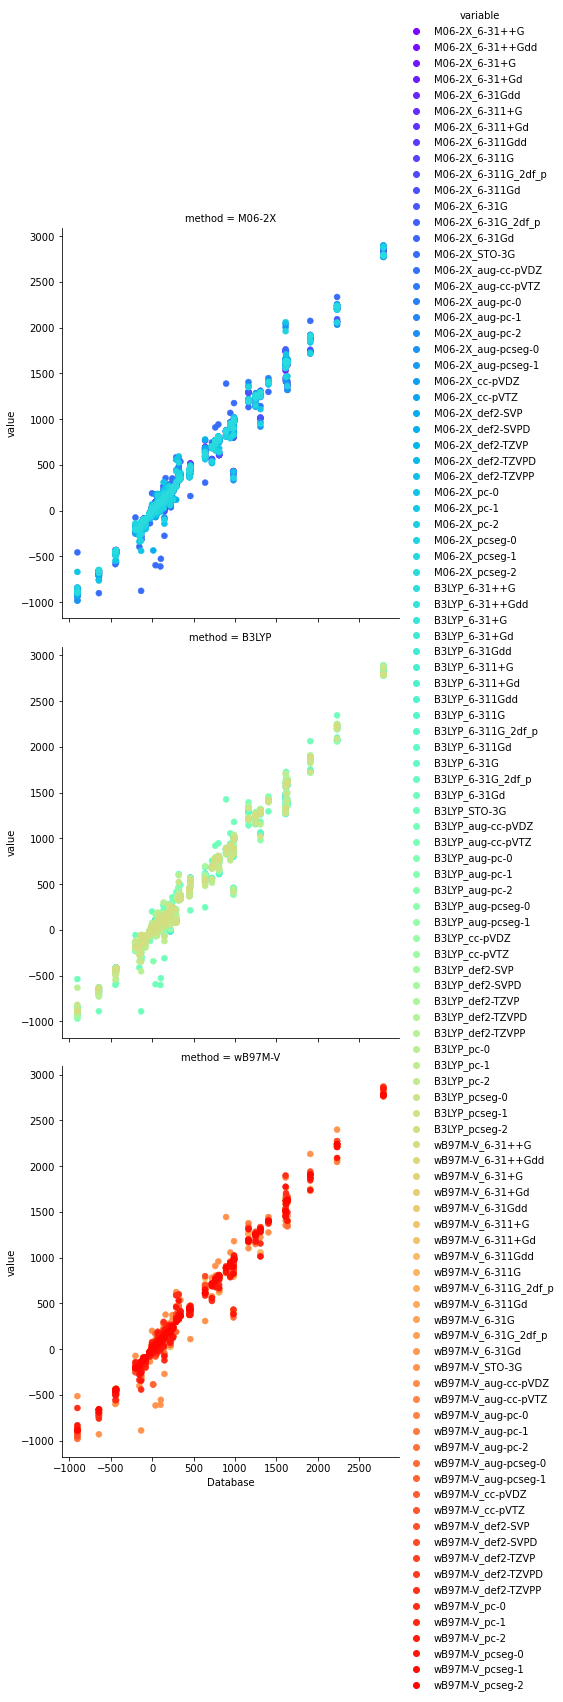

In [73]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'variable', row = 'method', height = 6 , edgecolor=None, palette = 'rainbow')
#plt.xlim(-20,20)
#plt.ylim(-20,20)
plt.show()
#This is more painful to read due to the method determining the colour as well as the relplot (so M06-2X is always blue)
#want the values close to (0,0)?

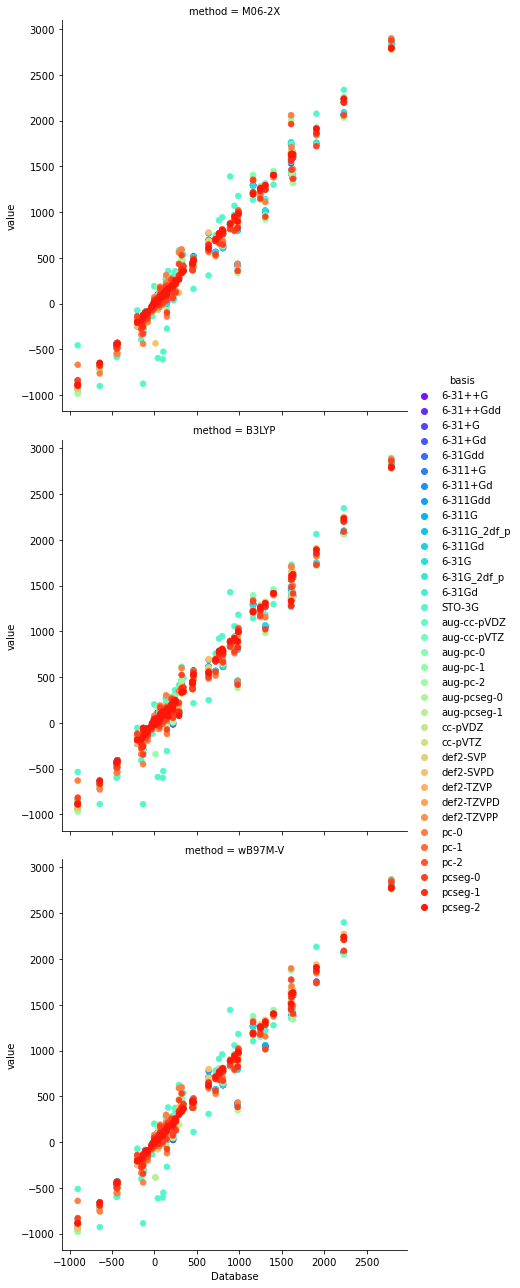

In [74]:
sns.relplot(x = "Database", y = "value", data=new_df, hue = 'basis', row = 'method',  height = 6 , edgecolor=None, palette = 'rainbow', alpha = 1)
#plt.xlim(120,140)
#plt.ylim(-500,500)

plt.show()

## Plot analysis

- These graphs are quite difficult to understand quickly.
- This is due to lots of data covering other bits of data - cant see aug-pcseg-1 at all 
- Zooming in could make it easier to read the data 
- Different basis sets are better with different methods
    - E.g. aug-pcseg-1 and aug-pc-1 perform best with wB97M-V  while pcseg-2 performs better with M06-2X (though pcseg-2 seems pretty goopd either way).
    - Could be interesting doing these graphs with varying methods and basis set being the constant?

# Summary Plots

In [75]:
new_means = new_means.sort_values(by=['value'], ascending = False)
new_means

name   method        basis variable       value
259        B3LYP_STO-3G    B3LYP       STO-3G     WMAD  202.724866
294      wB97M-V_STO-3G  wB97M-V       STO-3G     WMAD  189.948574
224       M06-2X_STO-3G   M06-2X       STO-3G     WMAD  186.976000
309        wB97M-V_pc-0  wB97M-V         pc-0     WMAD  174.012964
239         M06-2X_pc-0   M06-2X         pc-0     WMAD  166.887667
..                  ...      ...          ...      ...         ...
132   M06-2X_def2-TZVPD   M06-2X   def2-TZVPD      MSD    1.900687
121  M06-2X_aug-cc-pVTZ   M06-2X  aug-cc-pVTZ      MSD    1.658319
194    wB97M-V_aug-pc-2  wB97M-V     aug-pc-2      MSD    1.547875
200   wB97M-V_def2-SVPD  wB97M-V    def2-SVPD      MSD    0.937137
124     M06-2X_aug-pc-2   M06-2X     aug-pc-2      MSD    0.615019

[315 rows x 5 columns]

In [76]:
wmadonly = wmadonly.sort_values(by=['value'], ascending = False)
order_list = ['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0','6-31G','6-31Gd','6-31Gdd','6-31+G','6-31+Gd','6-31G_2df_p','6-31++G','6-31++Gdd','6-311G','6-311Gd','6-311Gdd','6-311+G','6-311+Gd','6-311G_2df_p','def2-SVP','def2-SVPD','pc-1','pcseg-1','aug-pc-1','aug-pcseg-1','cc-pVDZ','aug-cc-pVDZ','cc-pVTZ','aug-cc-pVTZ','def2-TZVP','def2-TZVPP','def2-TZVPD','pc-2', 'pcseg-2','aug-pc-2']
hue_order = ['M06-2X', 'B3LYP', 'wB97M-V']


In [77]:
GRAPHRAPHRAPH = means.loc[means['method'] == 'wB97M-V']

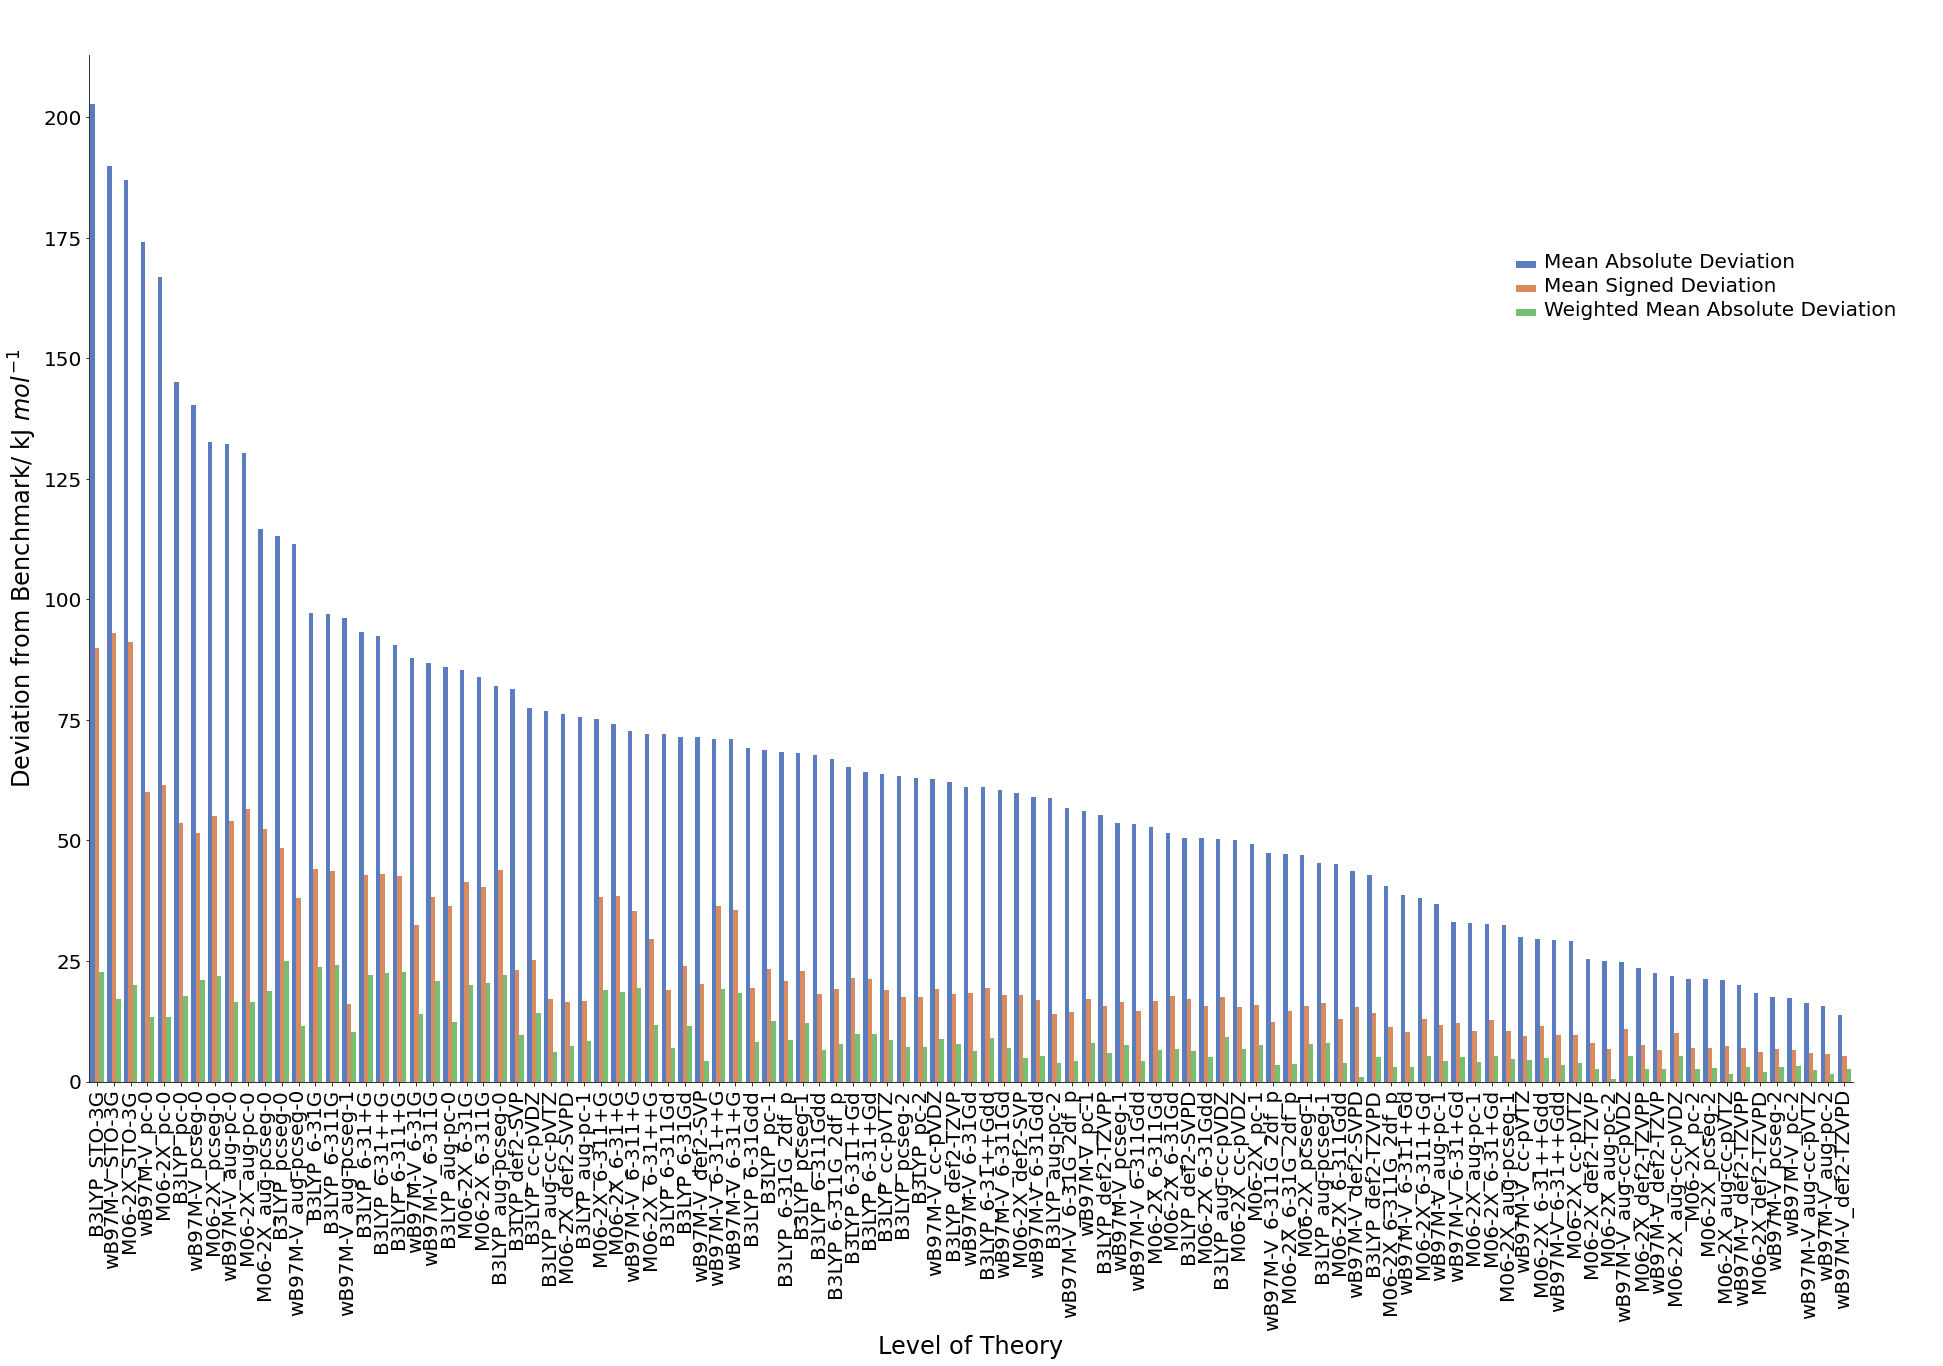

In [78]:
g = sns.catplot(x='name', y='value', hue = 'variable', data=new_means, kind='bar', height=15, palette="muted" ,aspect = 1.7)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)

plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1, 1])
new_labels = ["Mean Absolute Deviation", "Mean Signed Deviation", "Weighted Mean Absolute Deviation"]
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

Really painful to read, though actually has some good information

    - MSD is negative for aug-pc-2? 
    
    - STO-3G is pretty bad as expected (same as other SZ basis sets)
    
        - This doesnt depend on the method, the basis is bad
        
    - Quite difficult to find the 'good' basis sets from this graph
    
    - Havent found a good way to change the x tick length to make easier to read (so i changed the aspect and height)

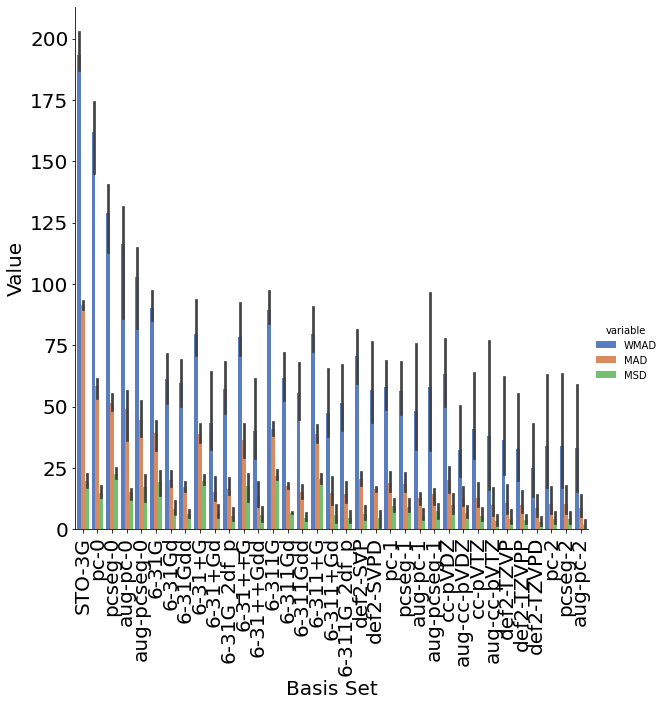

In [79]:
g=sns.catplot(x='basis', y='value', hue = 'variable', data=new_means, kind='bar', height=8, palette="muted",order=order_list)#, aspect=3, order=means["basis"])
g.set_xticklabels(rotation=90)
#plt.ylim(-10,250)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=20)
plt.ylabel('Value', fontsize=20)
#plt.ylim(-20,30)
plt.show()

- This plot is great at showing which is a good basis set and which isnt
    - SZ are clearly bad
    - Better than the previous at getting the point across about method vs basis set for these calculations
- Some of these are missing error bars? 
    - Not really sure why...

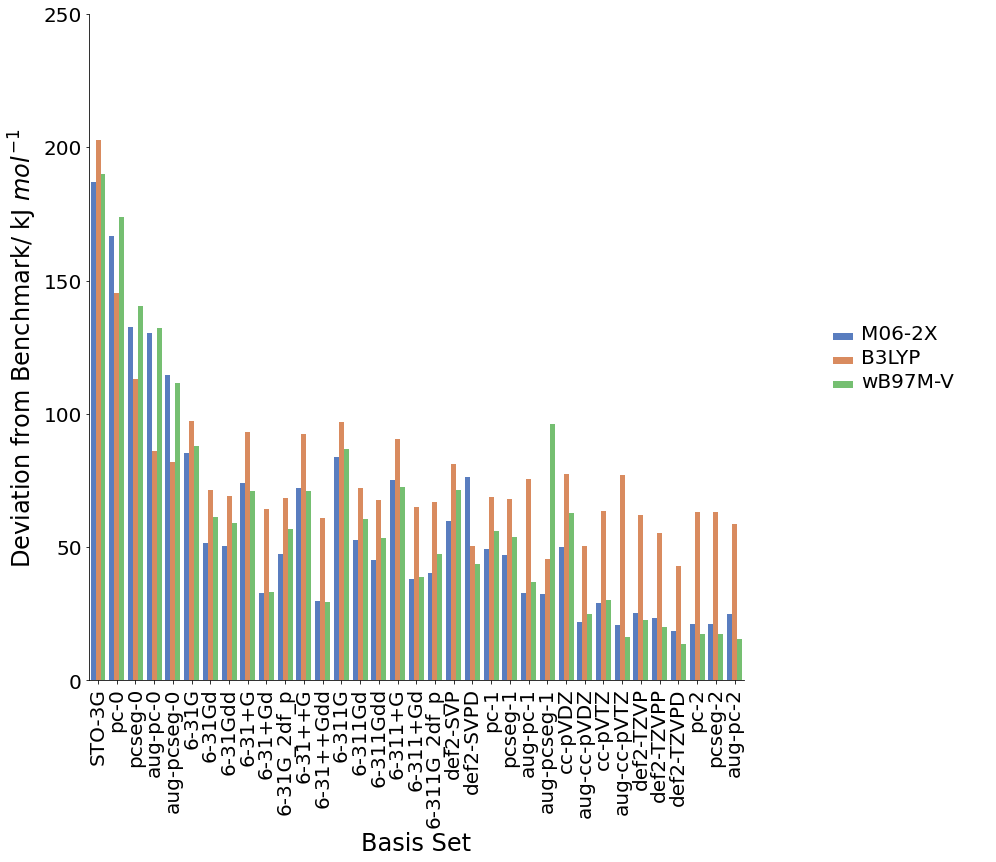

In [80]:
plt.show()

g = sns.catplot(x='basis', y='value', hue = 'method', data=wmadonly, kind='bar', height=10, palette="muted",order=order_list,hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)
plt.ylim(0, 250)


#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

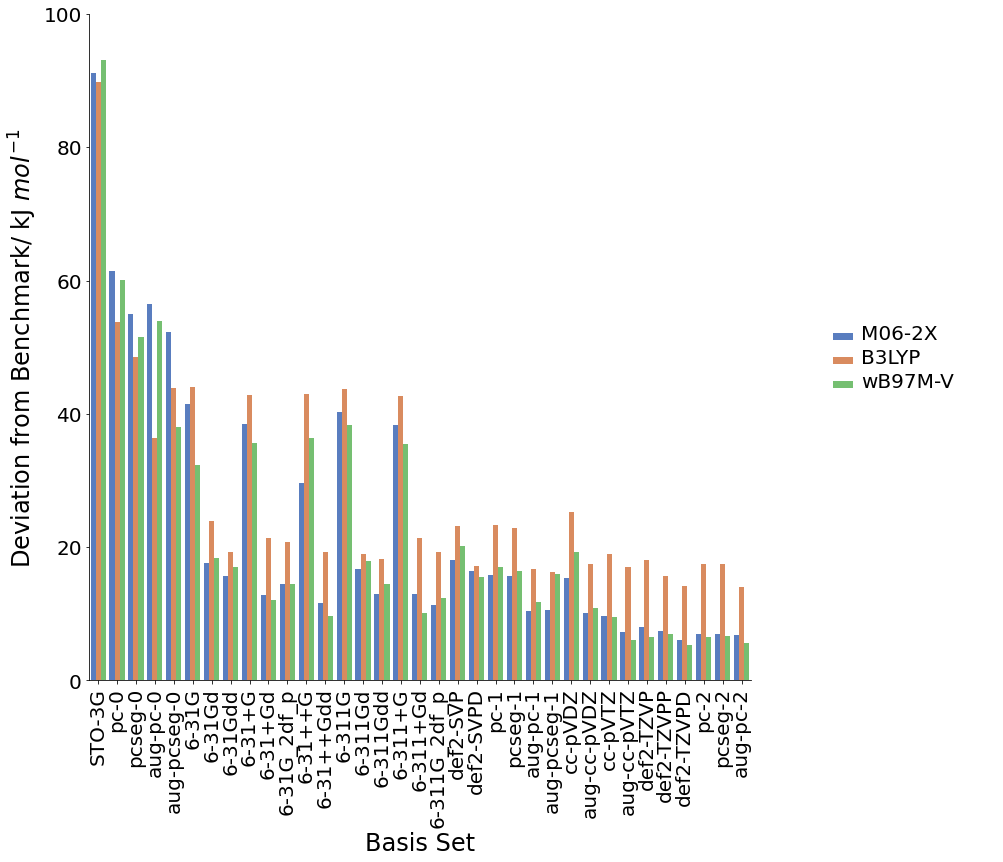

In [81]:
plt.show()

g = sns.catplot(x='basis', y='value', hue = 'method', data=madonly, kind='bar', height=10, palette="muted",order=order_list,hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

legend_title = ""
g._legend.set_title(legend_title)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(g._legend.get_title(), fontsize=22)
plt.setp(g._legend.get_texts(), fontsize=20);
g.set_xticklabels(rotation=90)
plt.ylim(0, 100)


#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

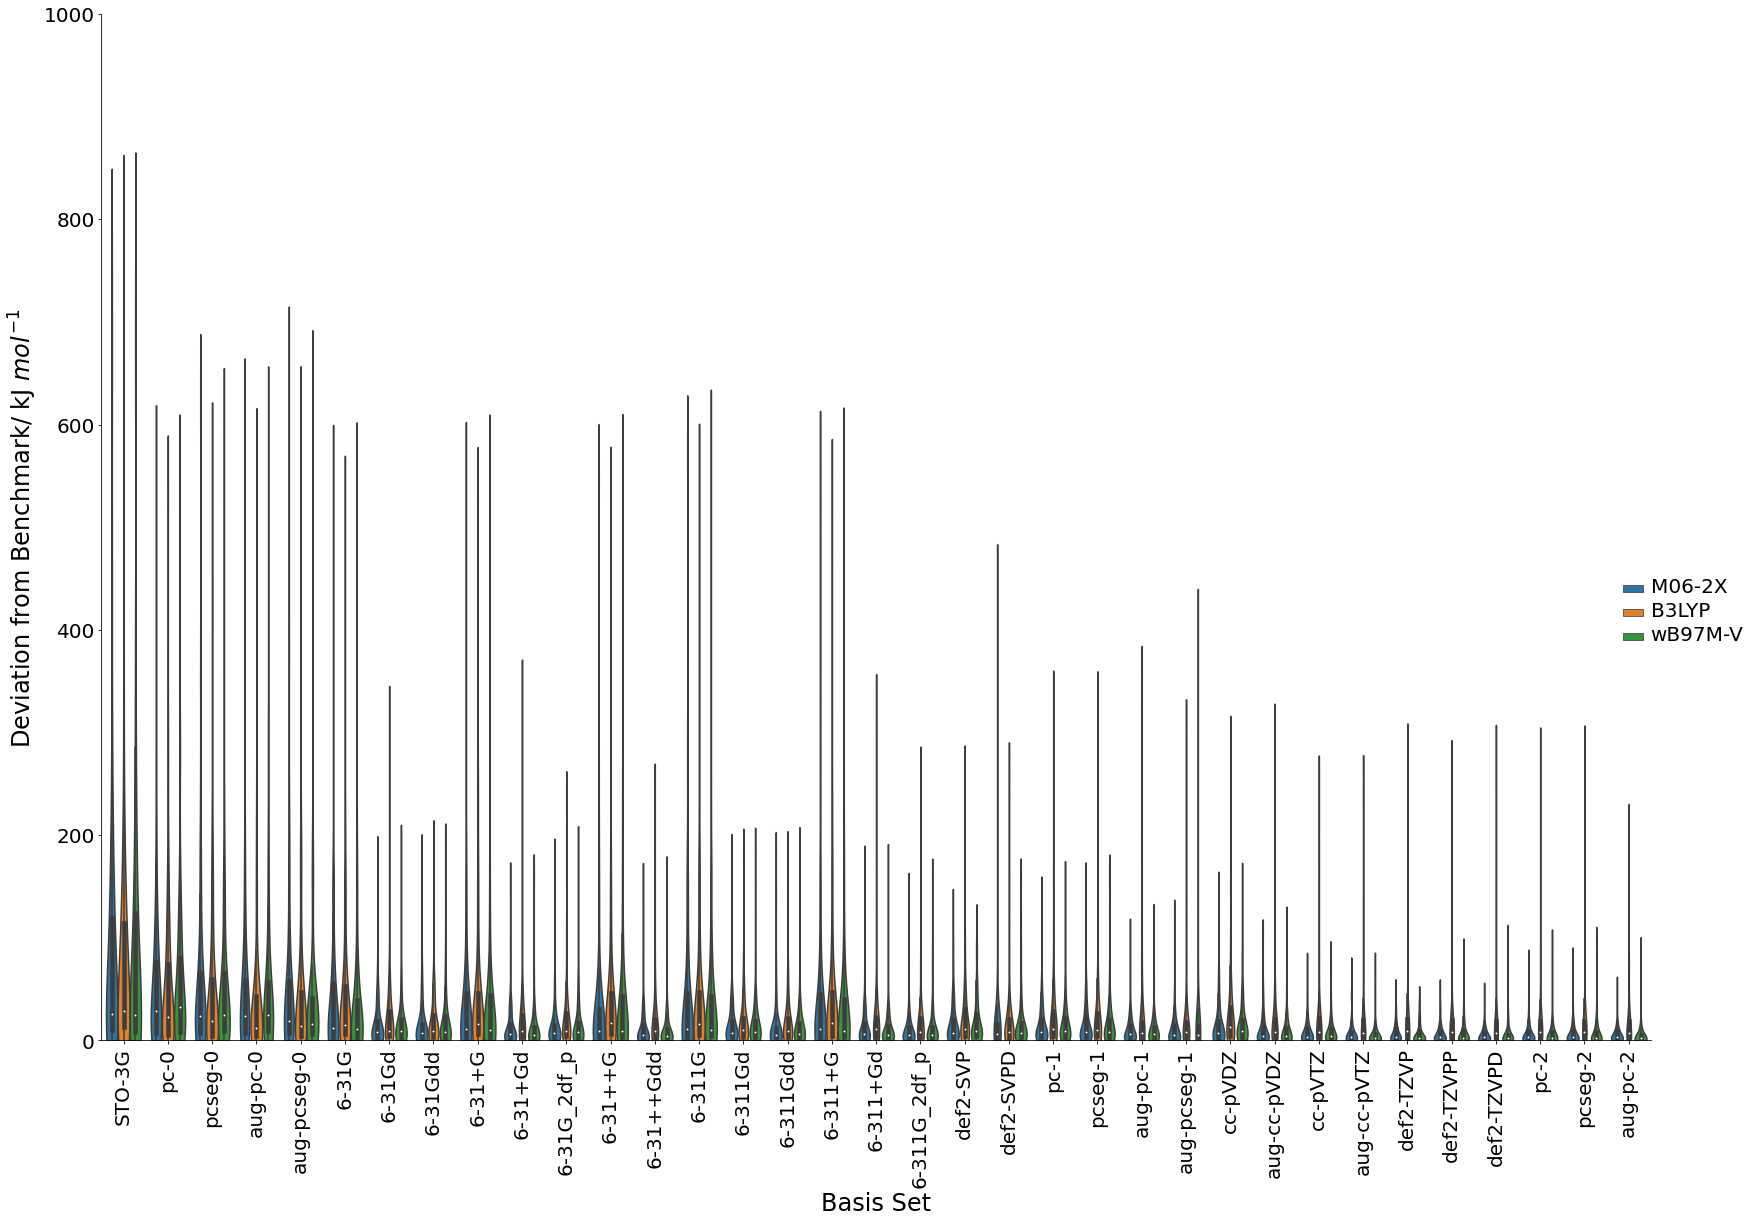

In [82]:
q = sns.catplot(data=new_df, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=order_list,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


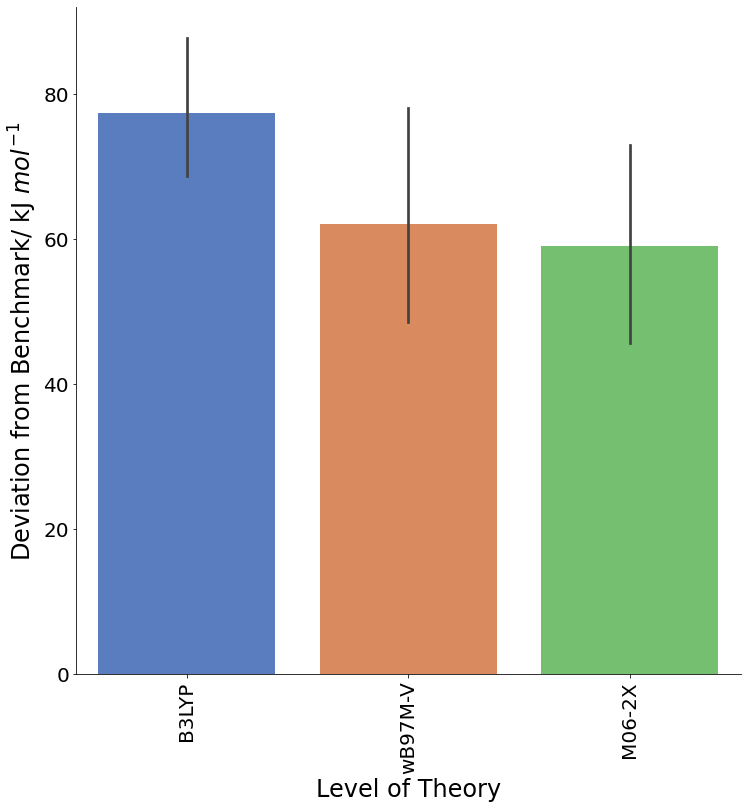

In [83]:
g=sns.catplot(x='method', y='value', data=wmadonly, kind='bar', height=10, palette="muted",hue_order=['M06-2X','B3LYP','wB97M-V'])

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

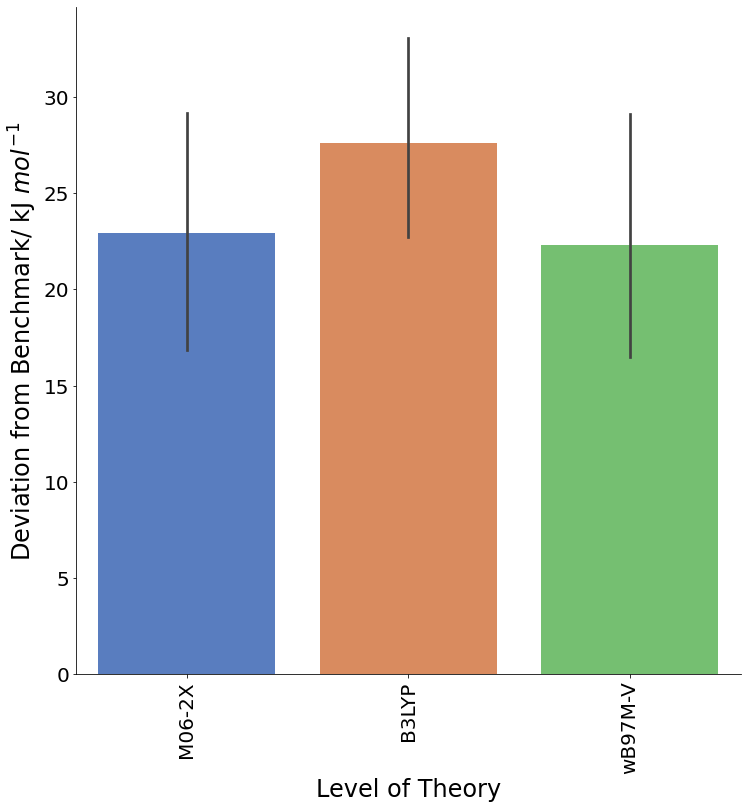

In [84]:
g=sns.catplot(x='method', y='value', data=madonly, kind='bar', height=10, palette="muted",hue_order=hue_order)

plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Level of Theory', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)

g.set_xticklabels(rotation=90)

#g.set_xticklabels(["M06-2X/cc-pVDZ", "wB97M-V/cc-pVDZ", "B3LYP/cc-pVDZ", "M06-2X/STO-3G", "wB97M-V/STO-3G",
          #         "B3LYP/STO-3G", "M06-2X/pc-1", "wB97M-V/pc-1", "B3LYP/pc-1", "M06-2X/def2-SVP", "wB97M-V/def2-SVP",
           #       "B3LYP/def2-SVP", "B3LYP/6-31G", "B3LYP/6-31+G", "M06-2X/cc-pVTZ"], rotation=90, horizontalalignment='right')

plt.show()

M06-2X being so close wB97M-V is concerning? Im not sure if thats an indication of a problem or not

Clearly shows that wB97M-V is a better method than B3LYP (and that we really shouldnt use B3LYP)

In [85]:
DataFrame_means_wB97MV
DataFrame_means_B3LYP
DataFrame_means_M062X
DataFrame_new_df_wB97MV
DataFrame_new_df_B3LYP
DataFrame_new_df_M062X

Reaction id    Database        variable       value  method    basis  \
0       ACONF_11   11.012297  M06-2X_6-31++G    8.917241  M06-2X  6-31++G   
1       ACONF_14   12.899284  M06-2X_6-31++G   10.749396  M06-2X  6-31++G   
2        AHB21_6 -106.775774  M06-2X_6-31++G -113.322399  M06-2X  6-31++G   
3       AHB21_10 -156.105181  M06-2X_6-31++G -182.279688  M06-2X  6-31++G   
4       AHB21_15  -36.066113  M06-2X_6-31++G  -45.262878  M06-2X  6-31++G   
...          ...         ...             ...         ...     ...      ...   
4510    YBDE18_6  216.480354  M06-2X_pcseg-2  196.435690  M06-2X  pcseg-2   
4511    YBDE18_8  224.806521  M06-2X_pcseg-2  199.450337  M06-2X  pcseg-2   
4512    YBDE18_9  136.314842  M06-2X_pcseg-2  136.618303  M06-2X  pcseg-2   
4513   YBDE18_13  218.739715  M06-2X_pcseg-2  206.730456  M06-2X  pcseg-2   
4514   YBDE18_16  251.500465  M06-2X_pcseg-2  234.294473  M06-2X  pcseg-2   

            MSD        MAD Data Source       WMAD  
0      2.095057   2.095057       ACONF  64.000000  
1      2.149888   2.149888       ACONF  66.000000  
2      6.546625   6.546625       AHB21  16.000000  
3     26.174507  26.174507       AHB21  66.000000  
4      9.196765   9.196765       AHB21  23.000000  
...         ...        ...         ...        ...  
4510  20.044664  20.044664      YBDE18  23.051364  
4511  25.356184  25.356184      YBDE18  29.159611  
4512  -0.303461   0.303461      YBDE18   0.348981  
4513  12.009259  12.009259      YBDE18  13.810648  
4514  17.205992  17.205992      YBDE18  19.786890  

[4515 rows x 10 columns]

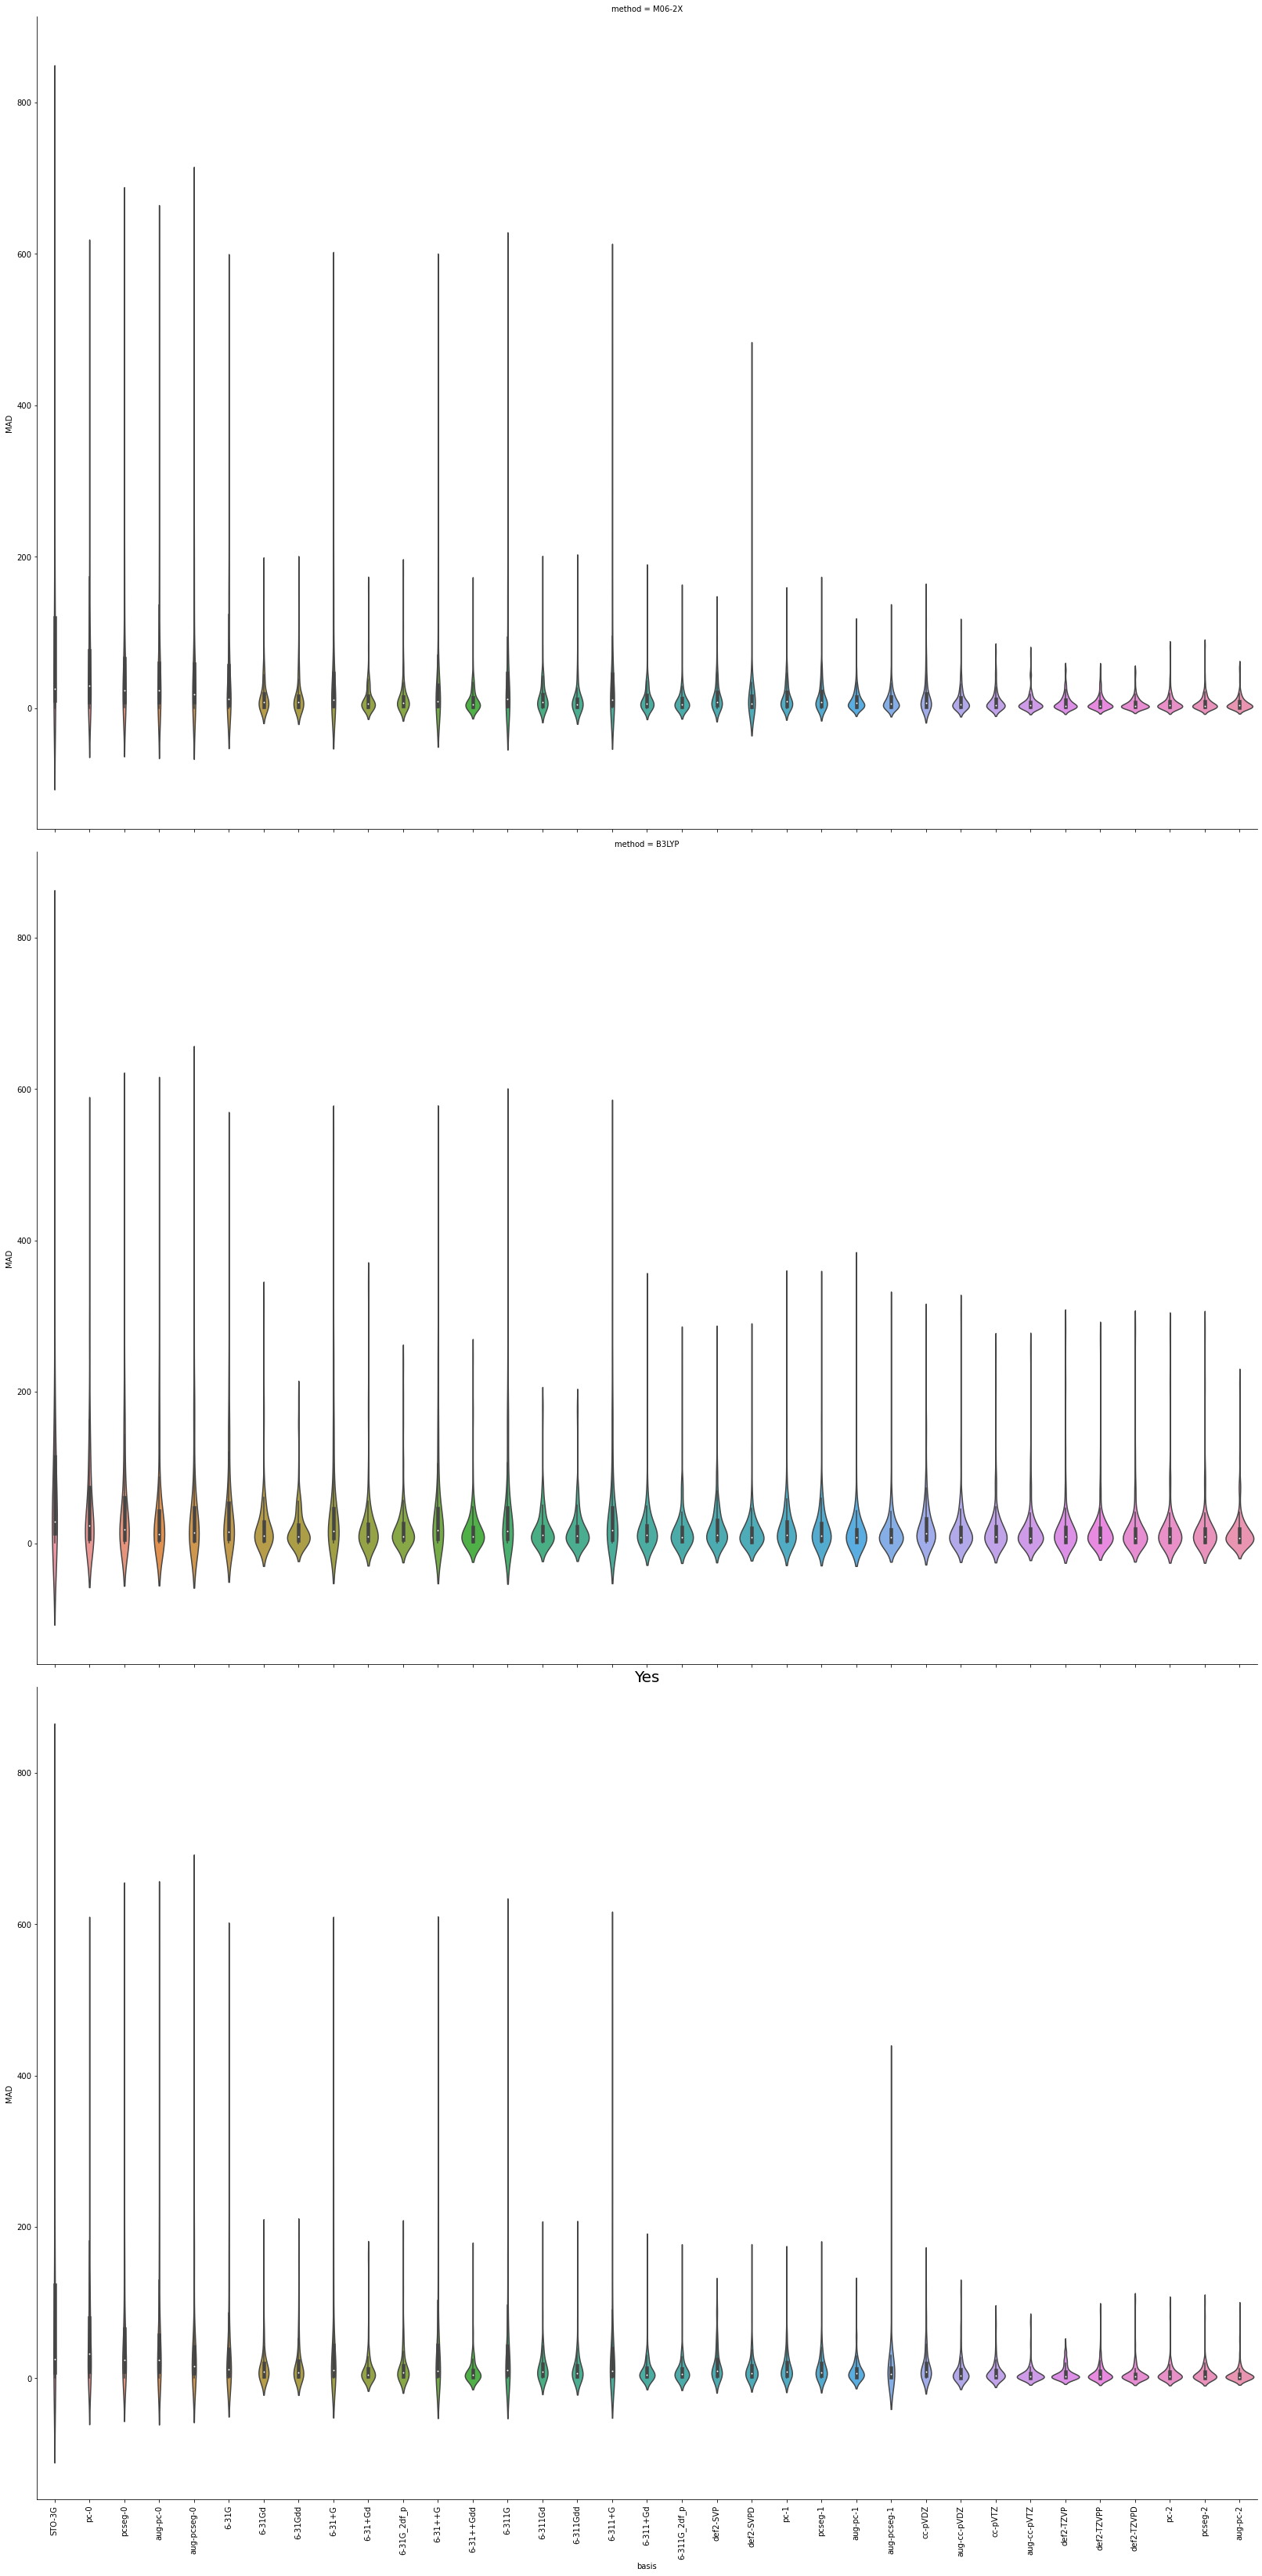

In [86]:
g = sns.catplot(data=new_df, x="basis", y = "MAD",kind = 'violin', height = 15,row="method", aspect =1.5,order=order_list,hue_order=hue_order)
#plt.xlim(120,140)
#plt.ylim(-500,500)
g.set_xticklabels(rotation=90)
plt.title('Yes',fontsize=20)
plt.show()


#leg.set_bbox_to_anchor([1.2, 0.7])

#plt.setp(q._legend.get_texts(), fontsize=20);


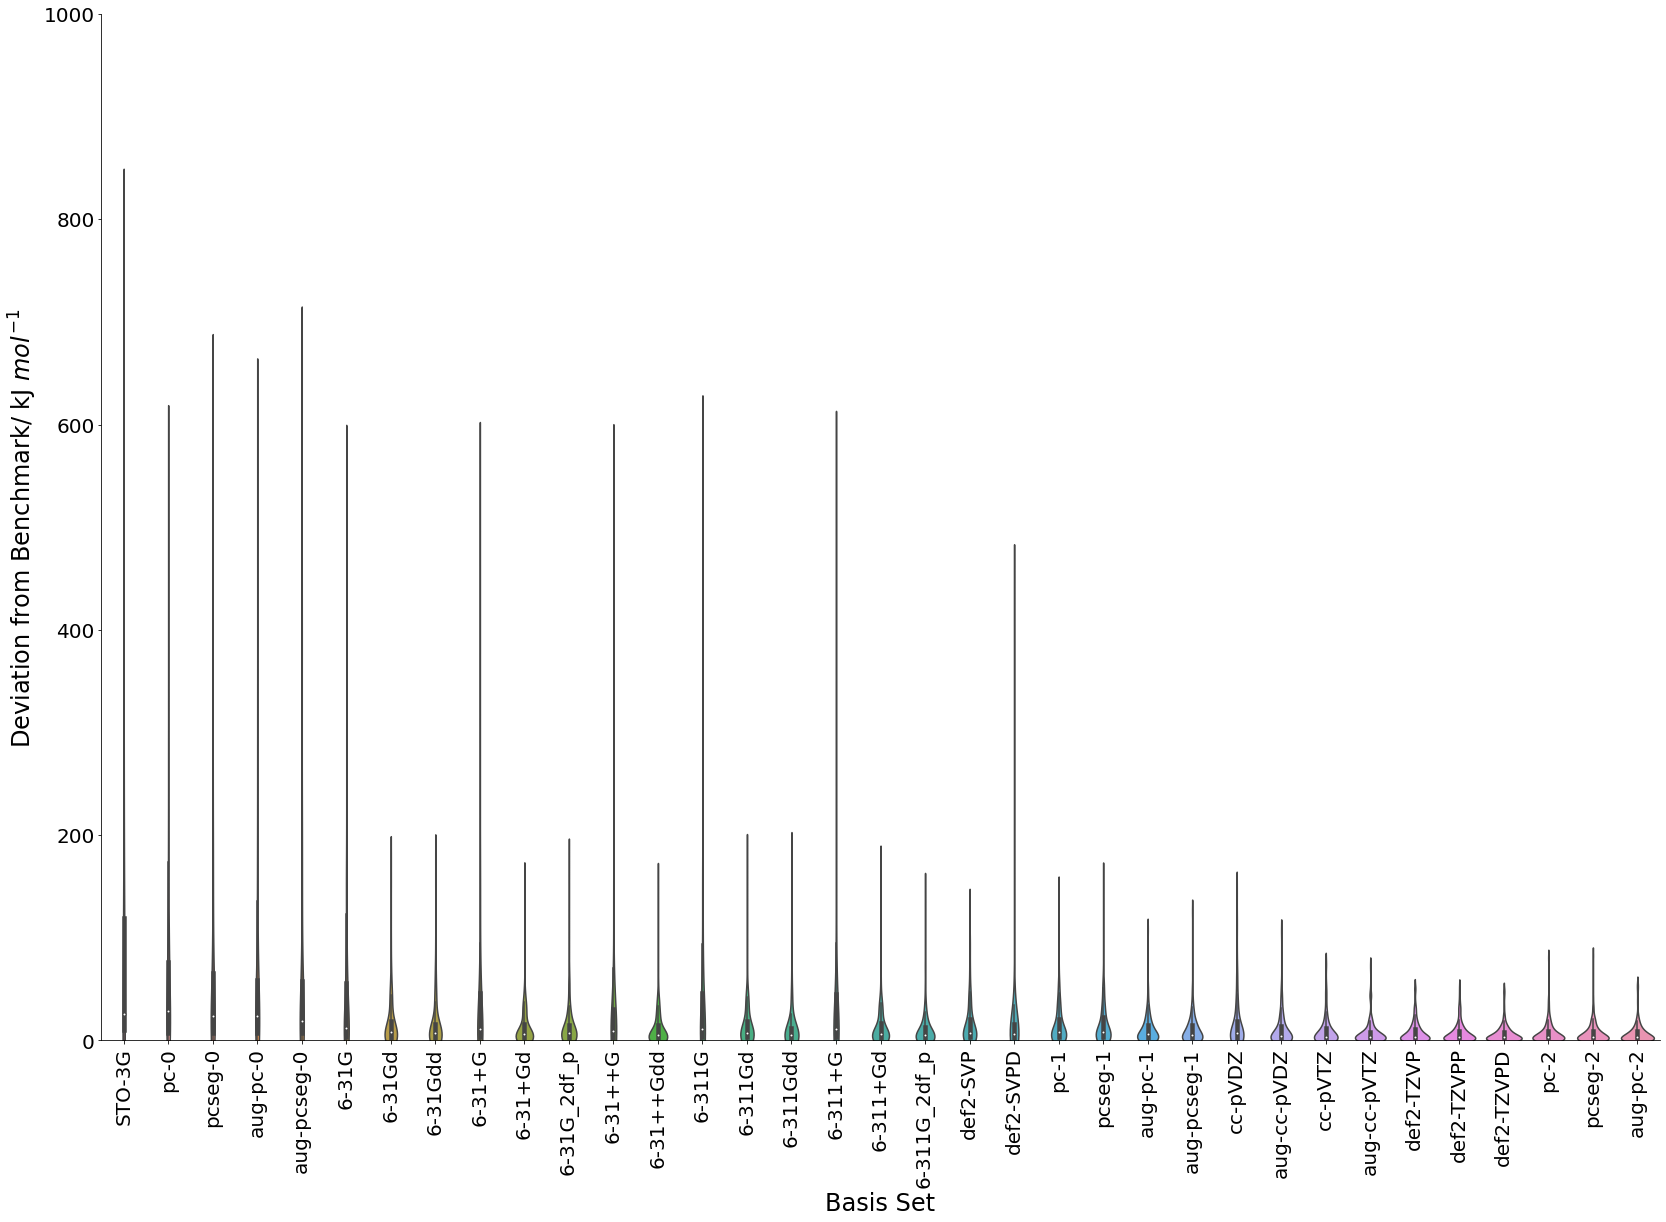

In [87]:
q = sns.catplot(data=DataFrame_new_df_M062X, x="basis", y = "MAD",kind = 'violin', height = 15, aspect =1.5,order=order_list,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,1000)
q.set_xticklabels(rotation=90)
legend_title = ""
#q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
#plt.setp(q._legend.get_title(), fontsize=22)
#plt.setp(q._legend.get_texts(), fontsize=20);



In [88]:
DoubleandTripleZeta=new_df.loc[new_df['basis'] == 'cc-pVTZ']
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-cc-pVTZ'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVPP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-TZVPD'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pc-2'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pcseg-2'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pc-2'])

#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31G'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31+G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31Gdd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31+Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31G_2df_p'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31++G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-31++Gdd'])

#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311Gdd'])
#DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311+G'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311+Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311Gd'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == '6-311G_2df_p'])

DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-SVP'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'def2-SVPD'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pc-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'pcseg-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pc-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-pcseg-1'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'cc-pVDZ'])
DoubleandTripleZeta=DoubleandTripleZeta.append(new_df.loc[new_df['basis'] == 'aug-cc-pVDZ'])

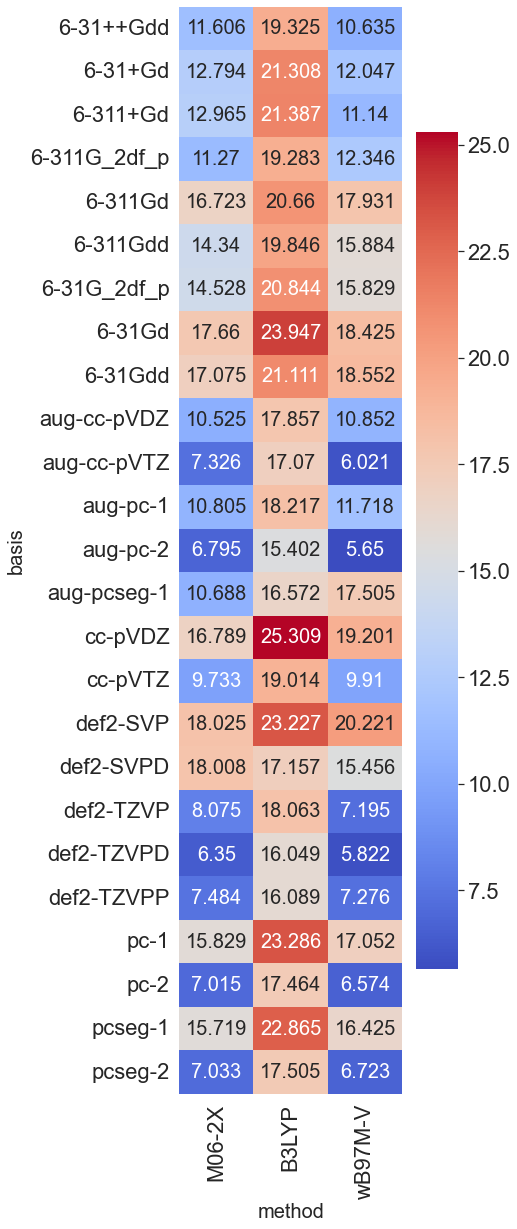

In [89]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZeta.pivot_table(values='MAD',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap = df_heatmap.round(decimals=3)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

In [90]:
Logged_MAD = np.log(new_df['MAD'])
Logged_df = new_df
Logged_df['Log MAD'] = Logged_MAD
Logged_df

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
13540    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
13541    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
13542    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
13543   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
13544   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source       WMAD   Log MAD  
0       2.095057   2.095057       ACONF  64.000000  0.739581  
1       2.149888   2.149888       ACONF  66.000000  0.765416  
2       6.546625   6.546625       AHB21  16.000000  1.878950  
3      26.174507  26.174507       AHB21  66.000000  3.264786  
4       9.196765   9.196765       AHB21  23.000000  2.218852  
...          ...        ...         ...        ...       ...  
13540   5.457959   5.457959      YBDE18   6.276653  1.697075  
13541  11.533865  11.533865      YBDE18  13.263945  2.445287  
13542  12.007651  12.007651      YBDE18  13.808798  2.485544  
13543  31.636432  31.636432      YBDE18  36.381897  3.454309  
13544   8.245244   8.245244      YBDE18   9.482030  2.109637  

[13545 rows x 11 columns]

In [91]:
TripleZetaOrder=['cc-pVTZ','aug-cc-pVTZ','def2-TZVP','def2-TZVPP','def2-TZVPD','pc-2', 'pcseg-2','aug-pc-2','6-311G','6-311+G','6-311+Gd','6-311Gd','6-311Gdd','6-311G_2df_p']
TripleZeta=Logged_df.loc[Logged_df['basis'] == 'cc-pVTZ']
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-cc-pVTZ'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVP'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVPP'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-TZVPD'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-2'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-2'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-2'])

DoubleZetaOrder=['6-31G','6-31+G','6-31Gd','6-31Gdd','6-31+Gd','6-31G_2df_p','6-31++G','6-31++Gdd','def2-SVP','def2-SVPD','pc-1','pcseg-1','aug-pc-1','aug-pcseg-1','cc-pVDZ','aug-cc-pVDZ']
DoubleZeta=Logged_df.loc[Logged_df['basis'] == '6-31G']
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31+G'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31Gd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31Gdd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31+Gd'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31G_2df_p'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31++G'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-31++Gdd'])

TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311G'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311Gdd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311+G'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311+Gd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311Gd'])
TripleZeta=TripleZeta.append(Logged_df.loc[Logged_df['basis'] == '6-311G_2df_p'])

DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-SVP'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'def2-SVPD'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pcseg-1'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'cc-pVDZ'])
DoubleZeta=DoubleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-cc-pVDZ'])

SingleZetaOrder=['STO-3G','pc-0','pcseg-0','aug-pc-0','aug-pcseg-0']
SingleZeta=Logged_df.loc[Logged_df['basis'] == 'STO-3G']
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pc-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'pcseg-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pc-0'])
SingleZeta=SingleZeta.append(Logged_df.loc[Logged_df['basis'] == 'aug-pcseg-0'])



PopleOnly=Logged_df.loc[Logged_df['basis'] == '6-31G']
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31+G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31Gdd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31+Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31G_2df_p'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31++G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-31++Gdd'])

PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311Gdd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311+G'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311+Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311Gd'])
PopleOnly=PopleOnly.append(Logged_df.loc[Logged_df['basis'] == '6-311G_2df_p'])

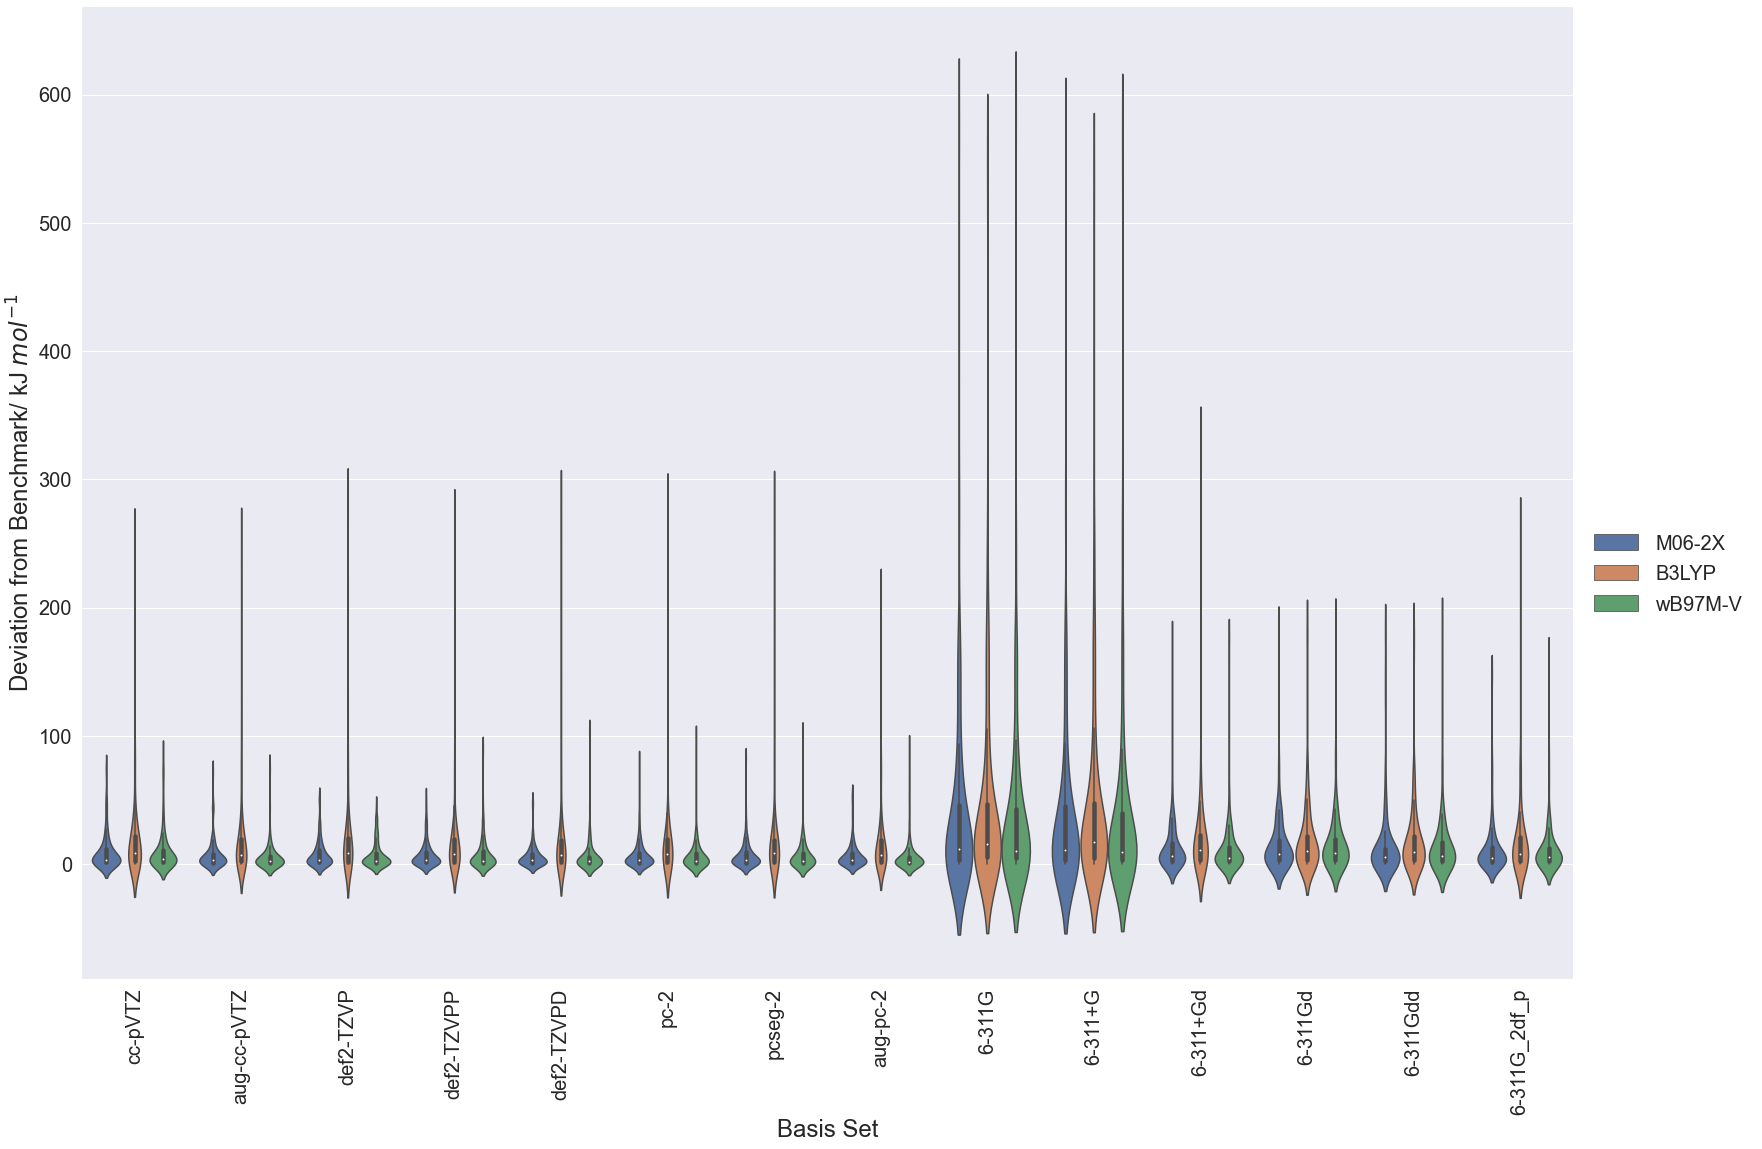

In [92]:
q = sns.catplot(data=TripleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


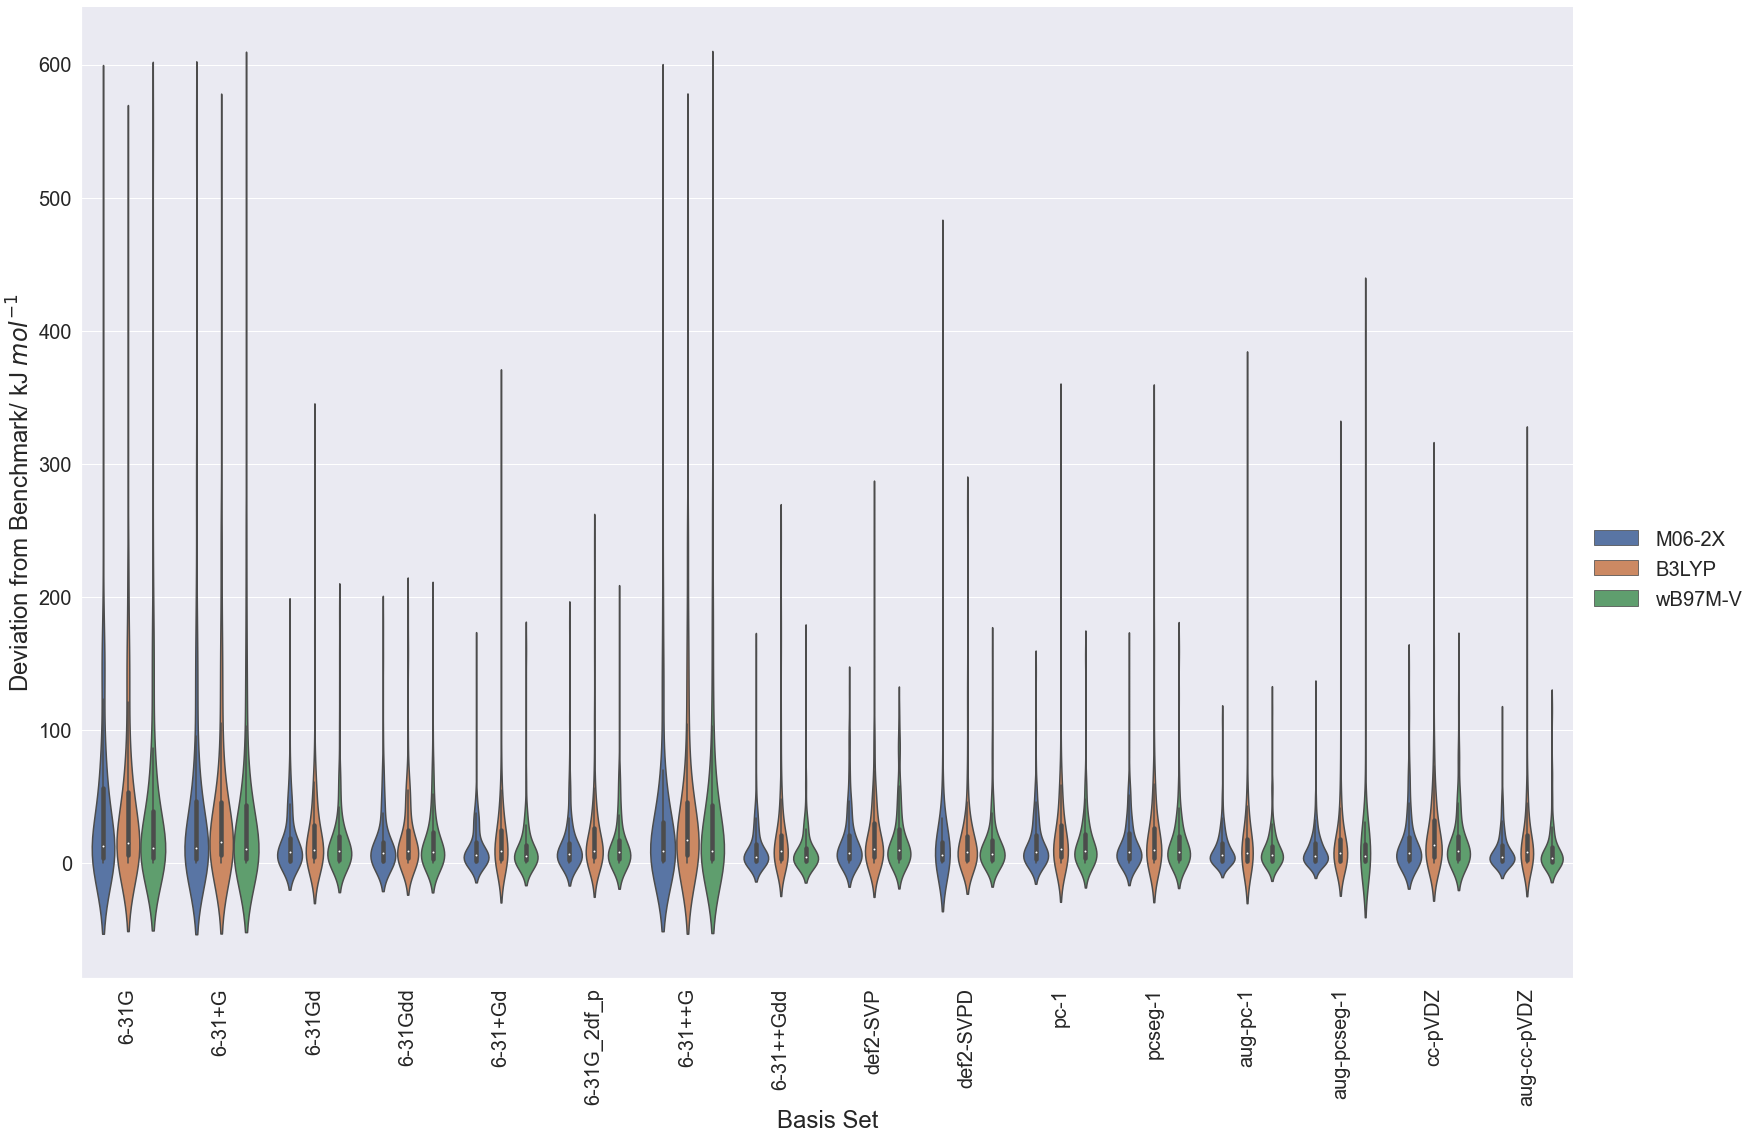

In [93]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


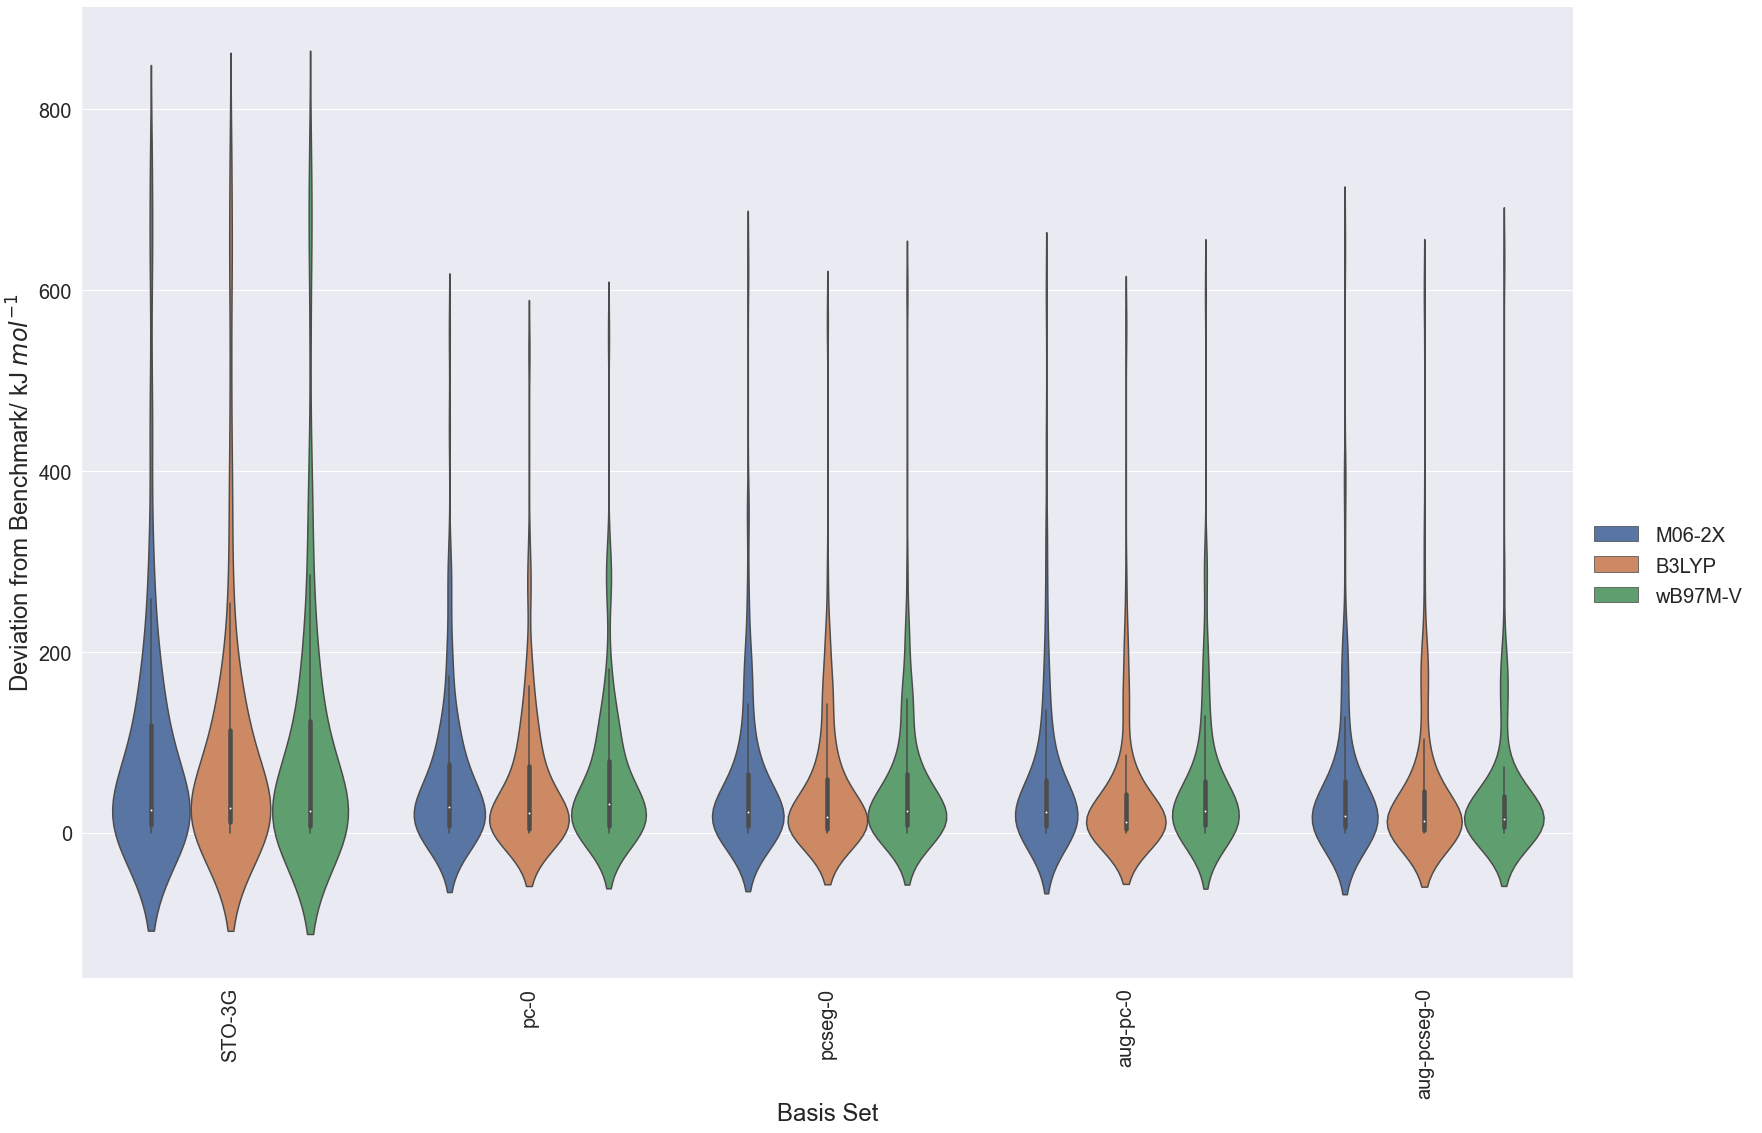

In [94]:
q = sns.catplot(data=SingleZeta, x="basis", y = "MAD",kind = 'violin',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


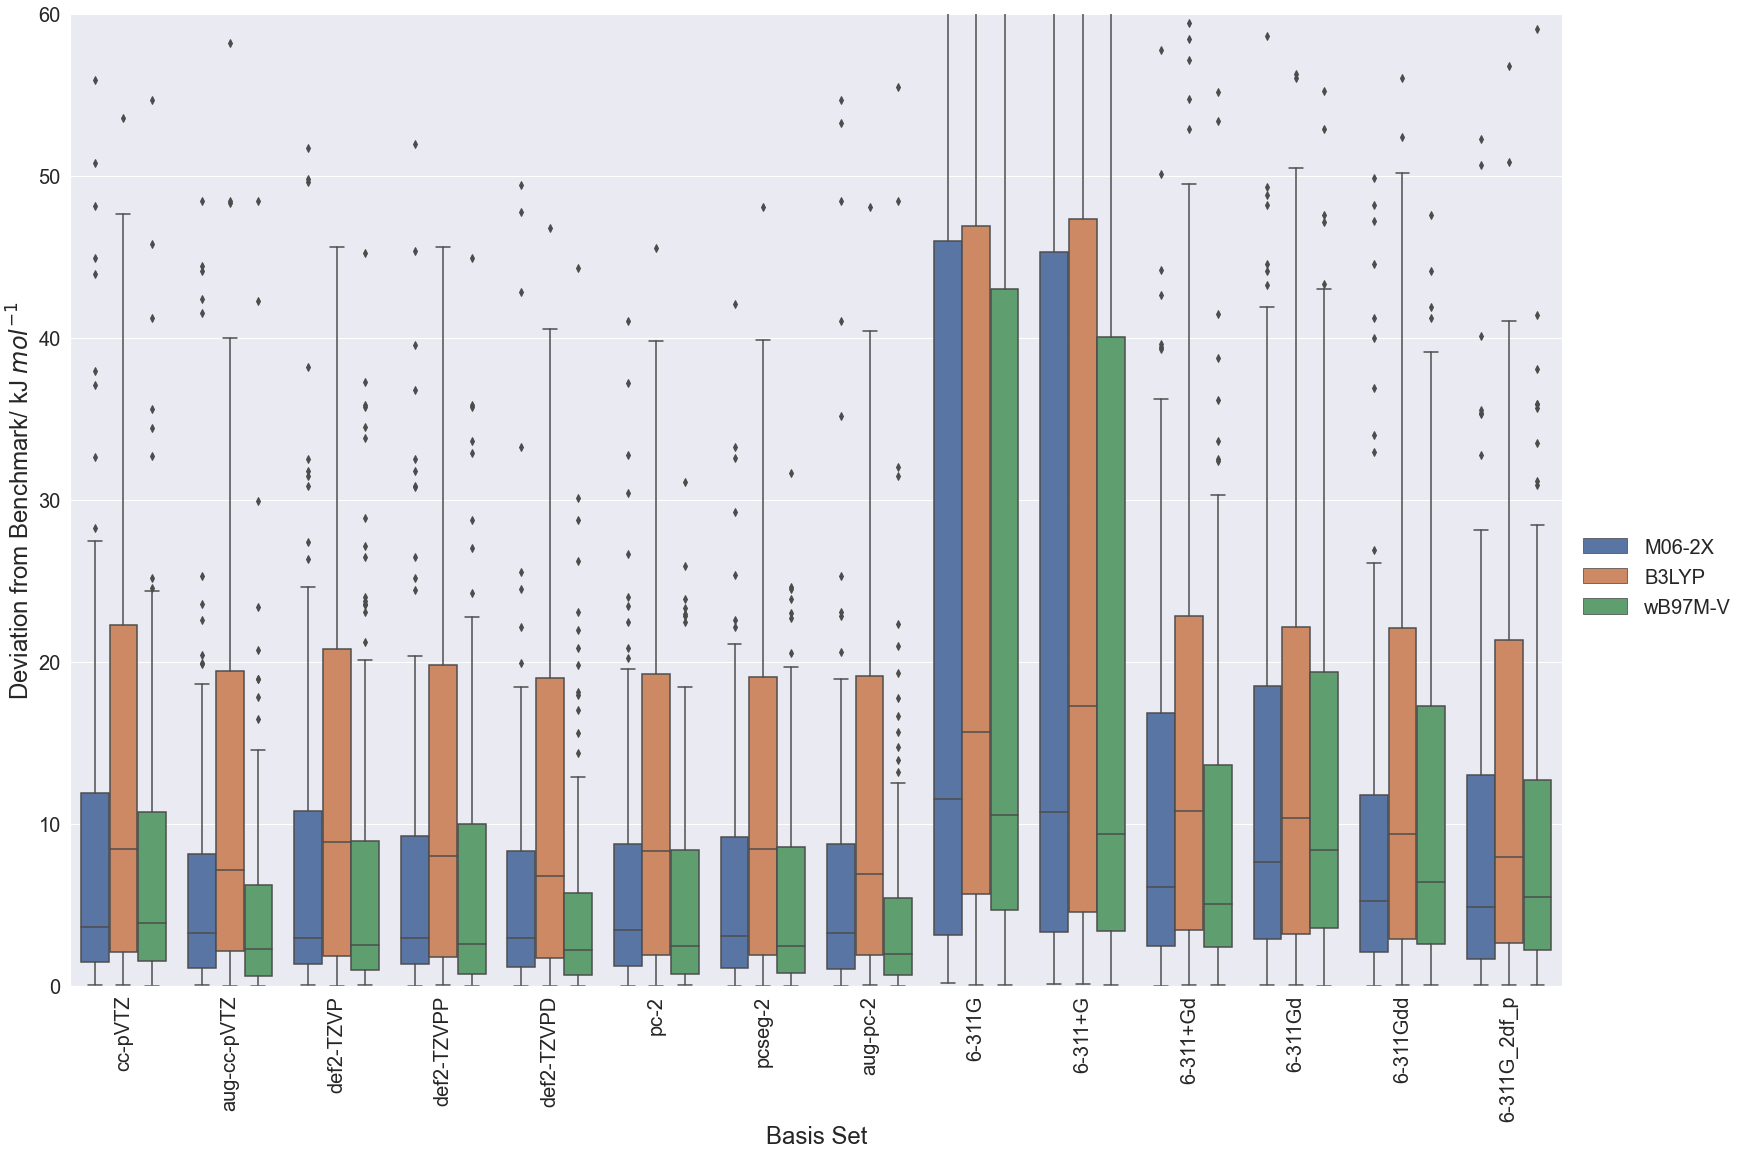

In [95]:
q = sns.catplot(data=TripleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


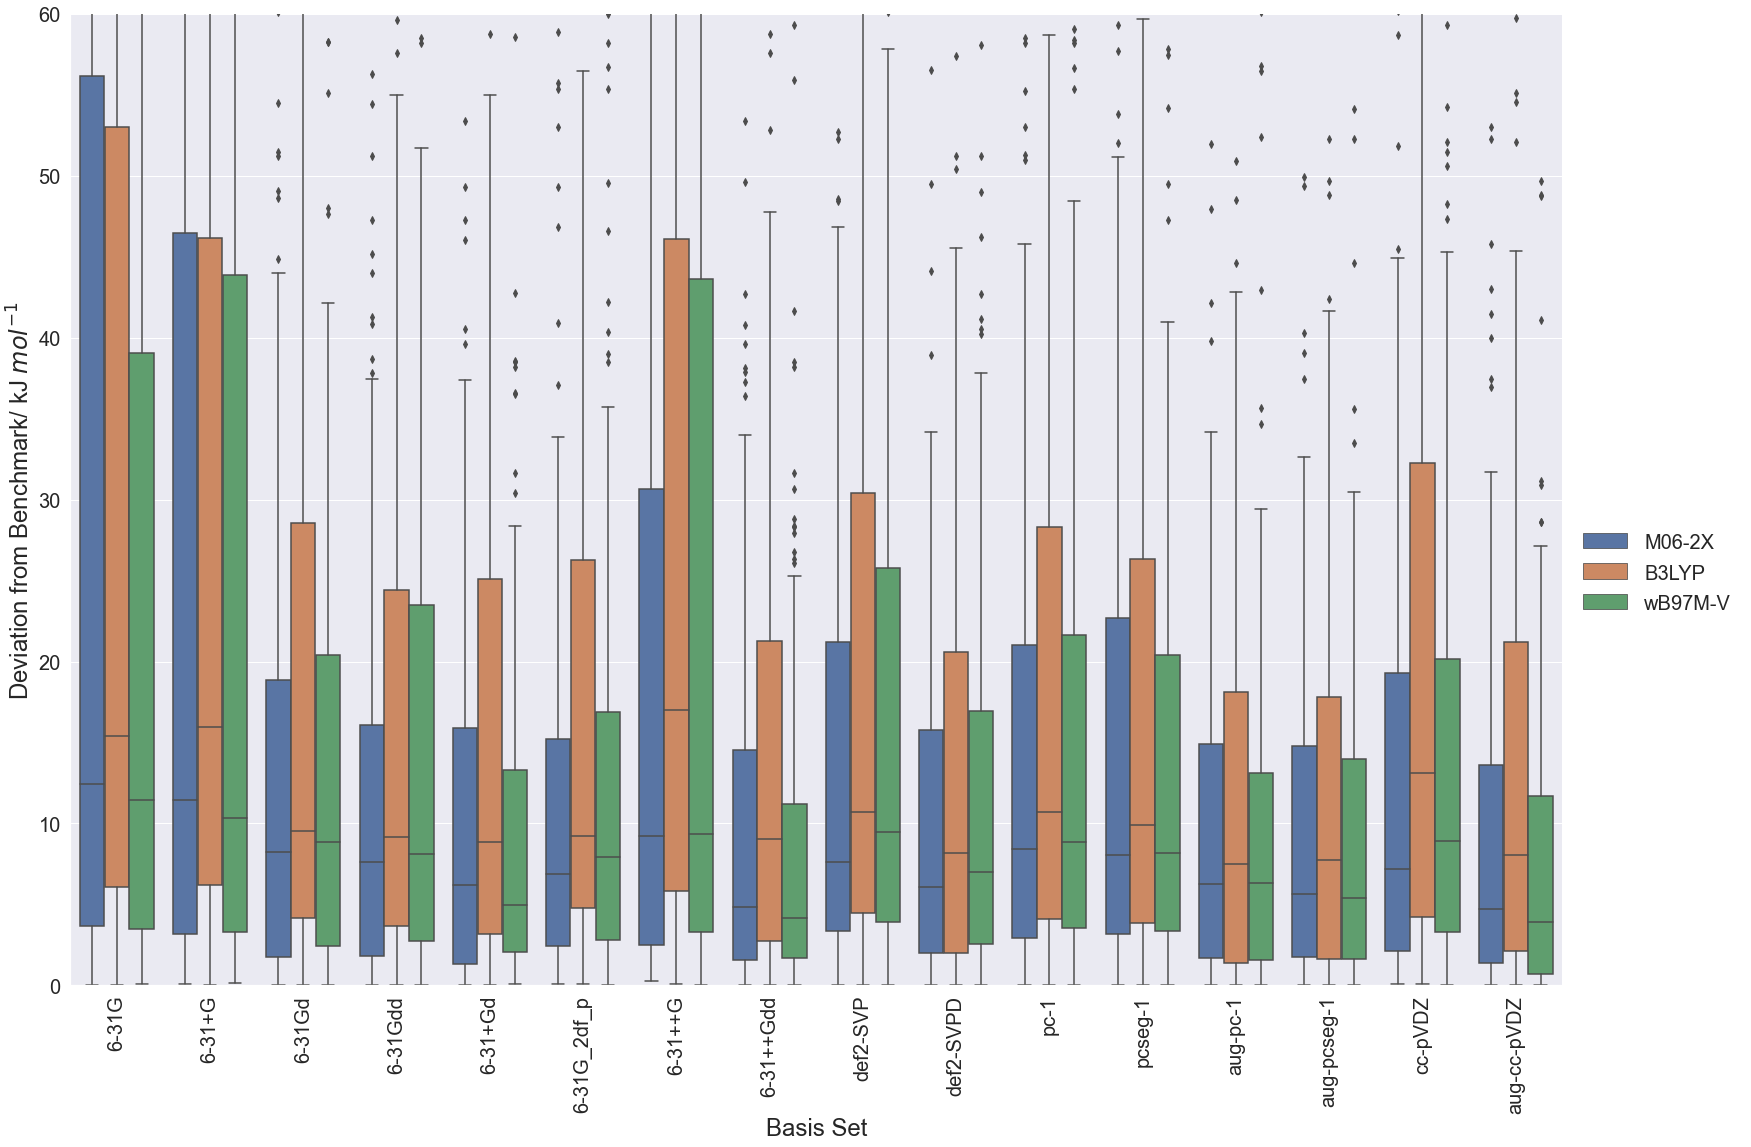

In [96]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


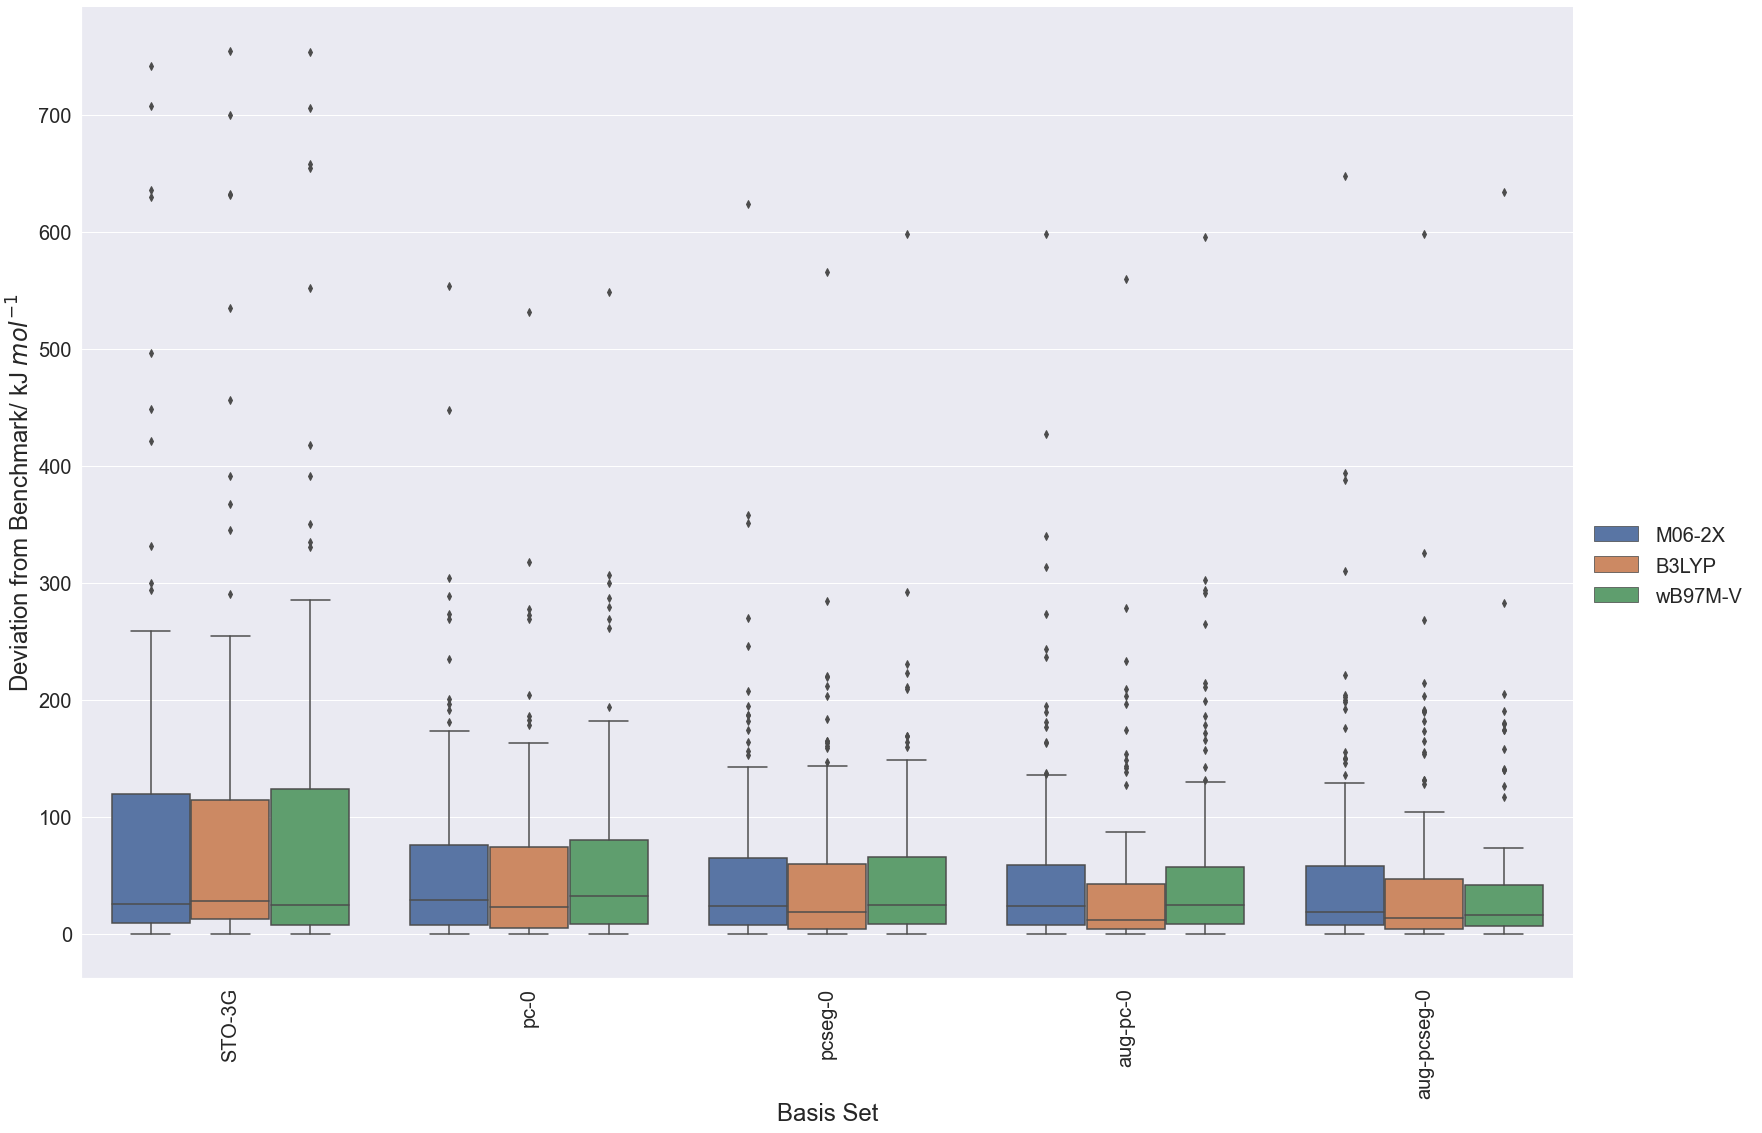

In [97]:
q = sns.catplot(data=SingleZeta, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


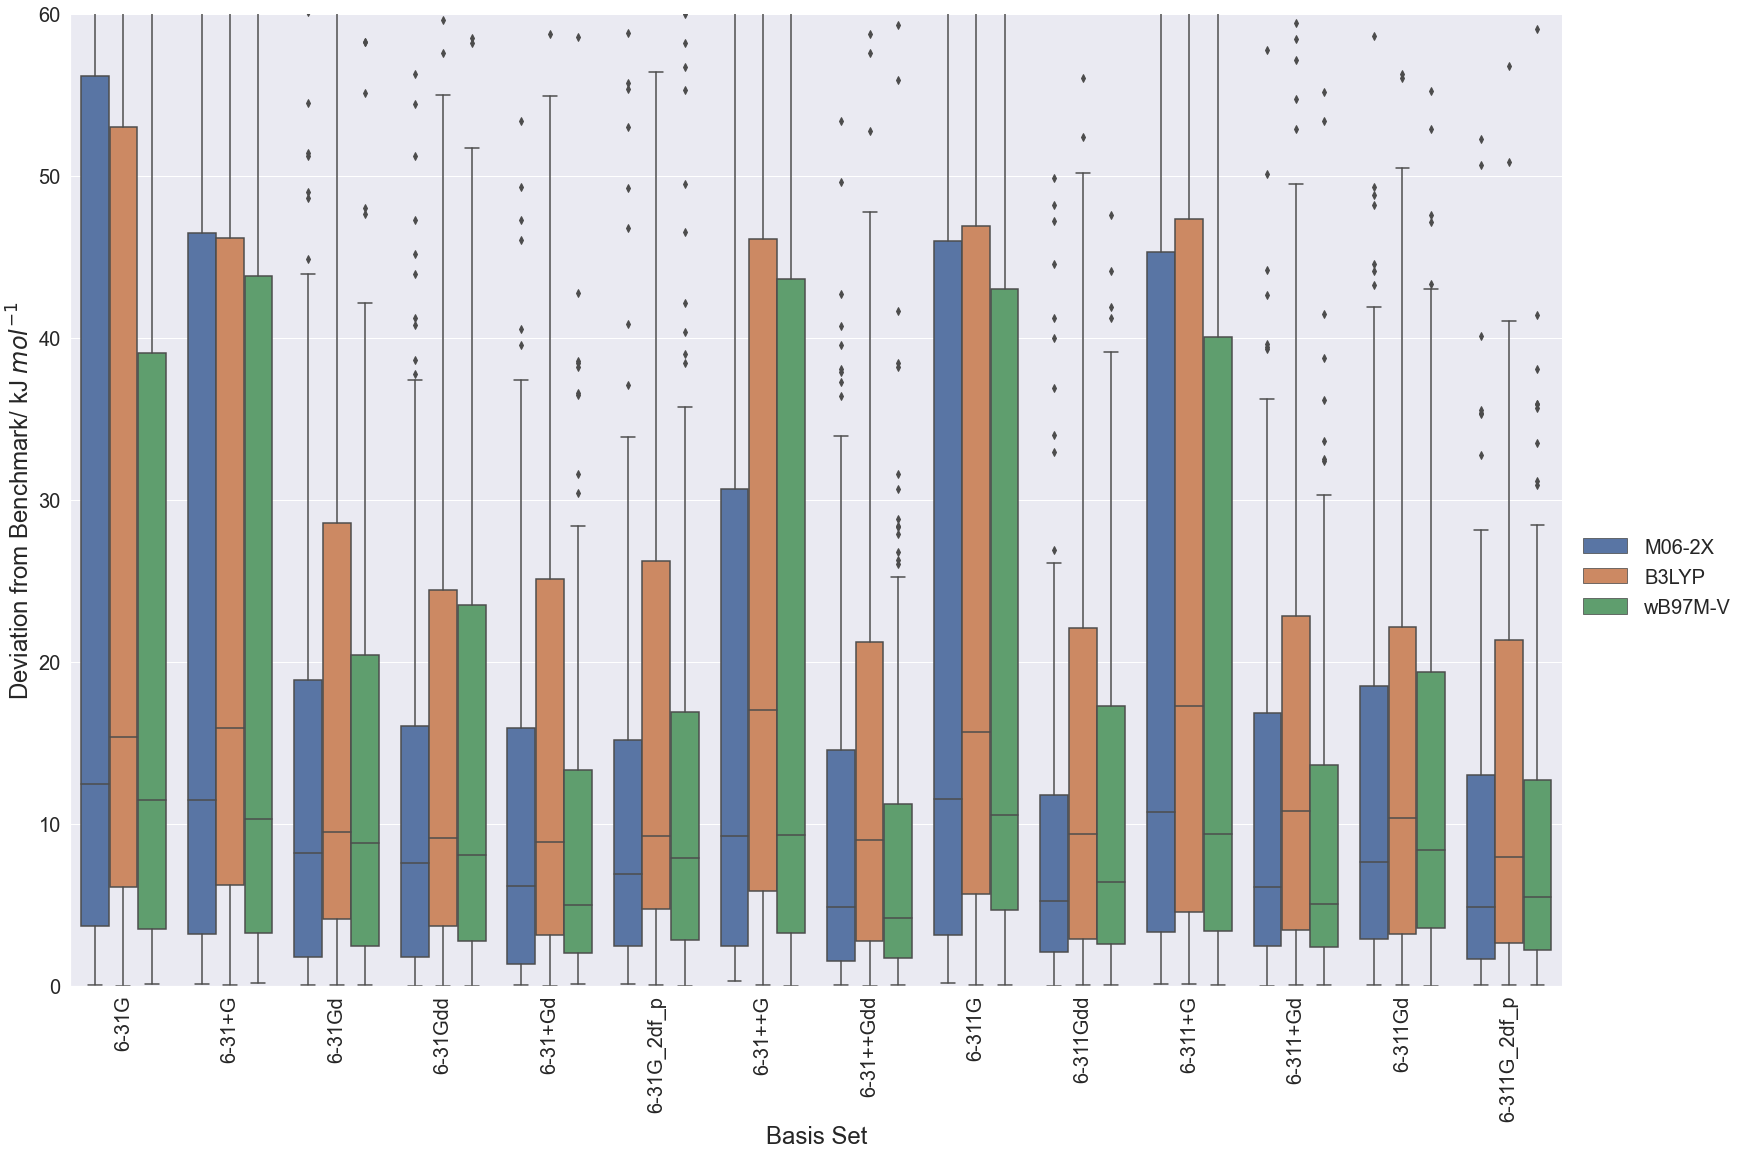

In [98]:
q = sns.catplot(data=PopleOnly, x="basis", y = "MAD",kind = 'box',hue="method", height = 15, aspect =1.5,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
plt.ylim(0,60)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


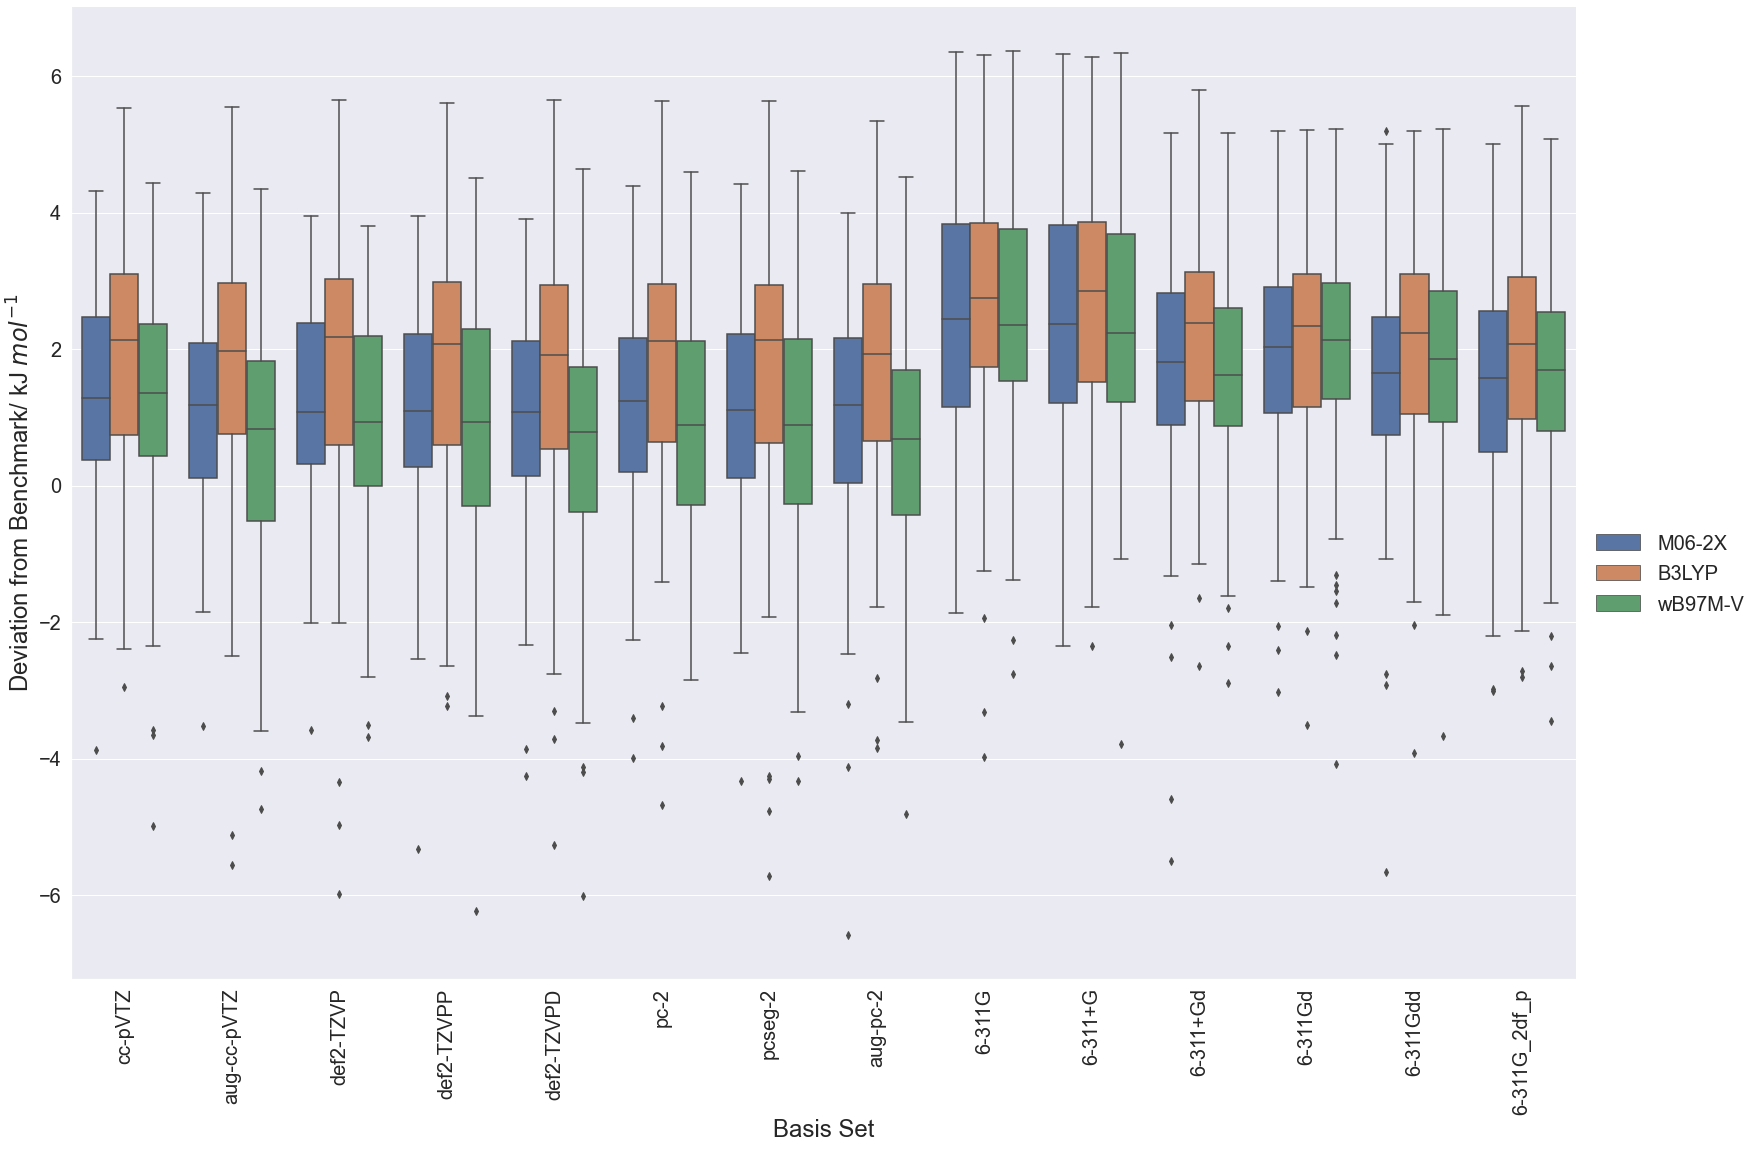

In [99]:
q = sns.catplot(data=TripleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=TripleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


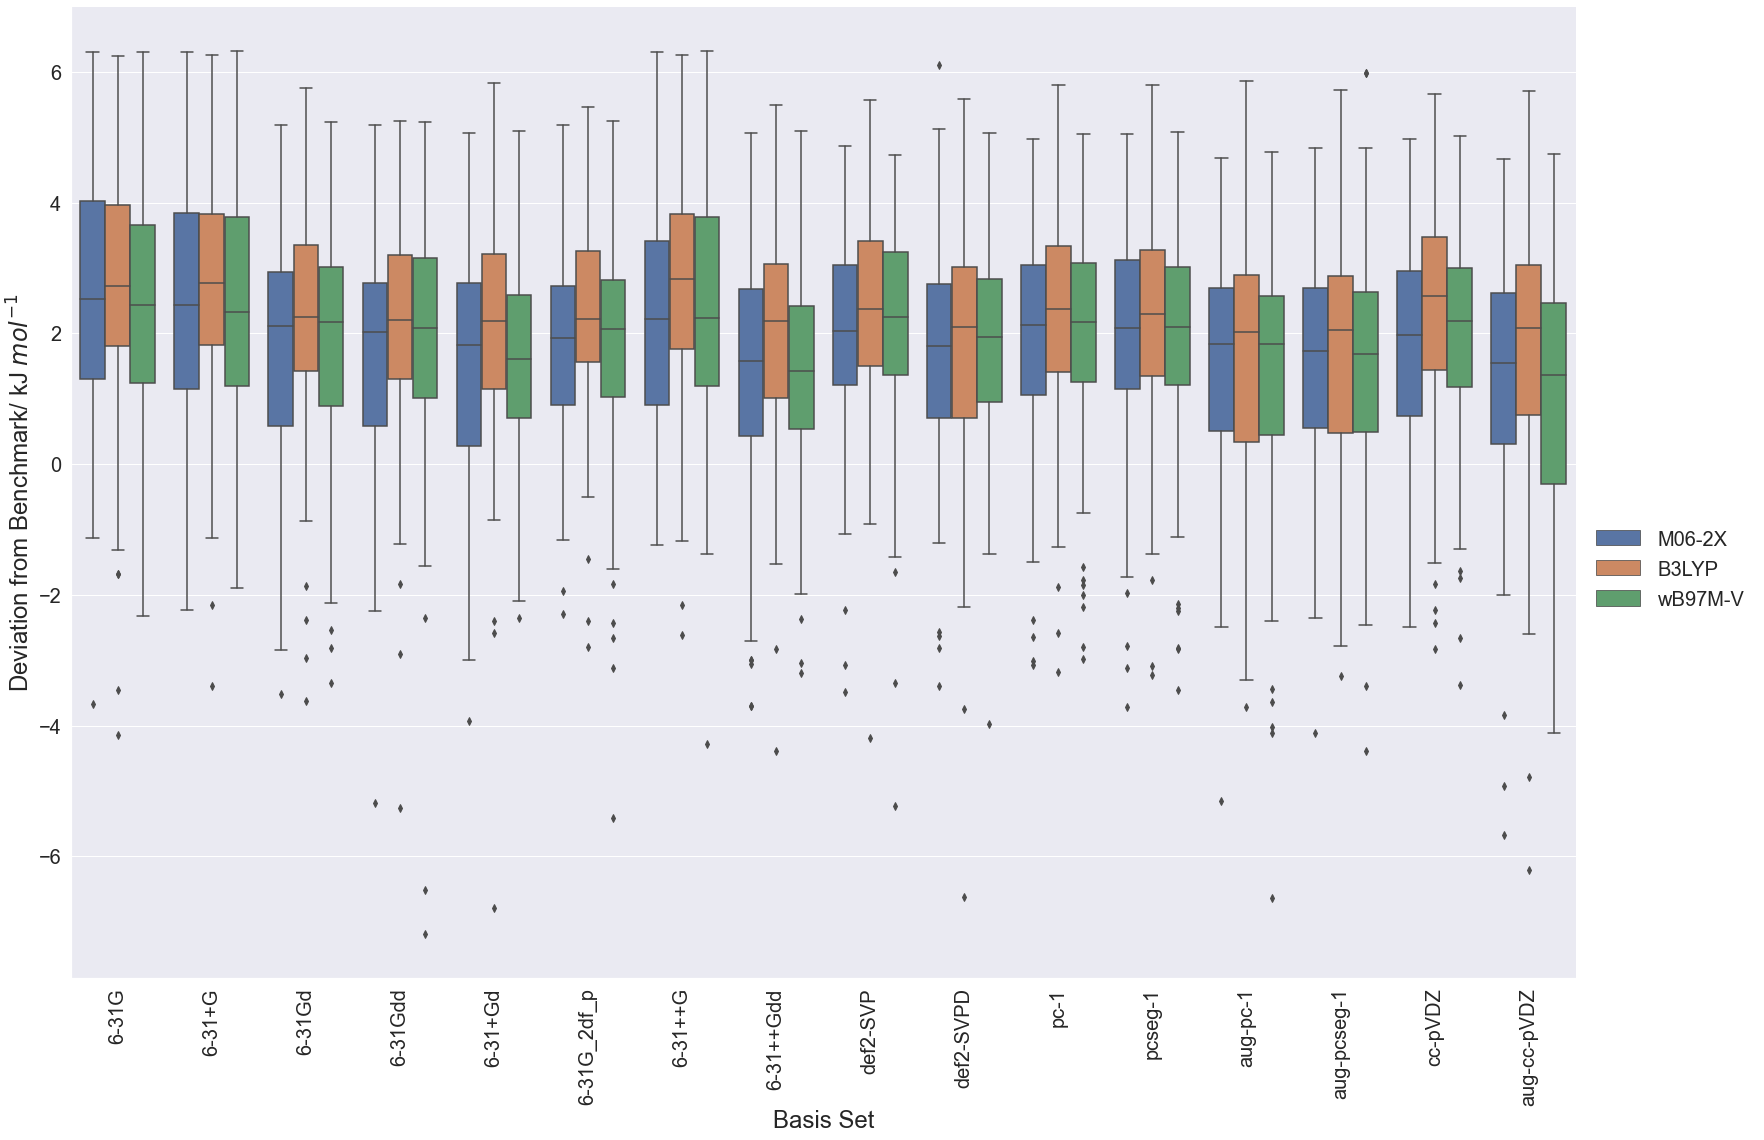

In [100]:
q = sns.catplot(data=DoubleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=DoubleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


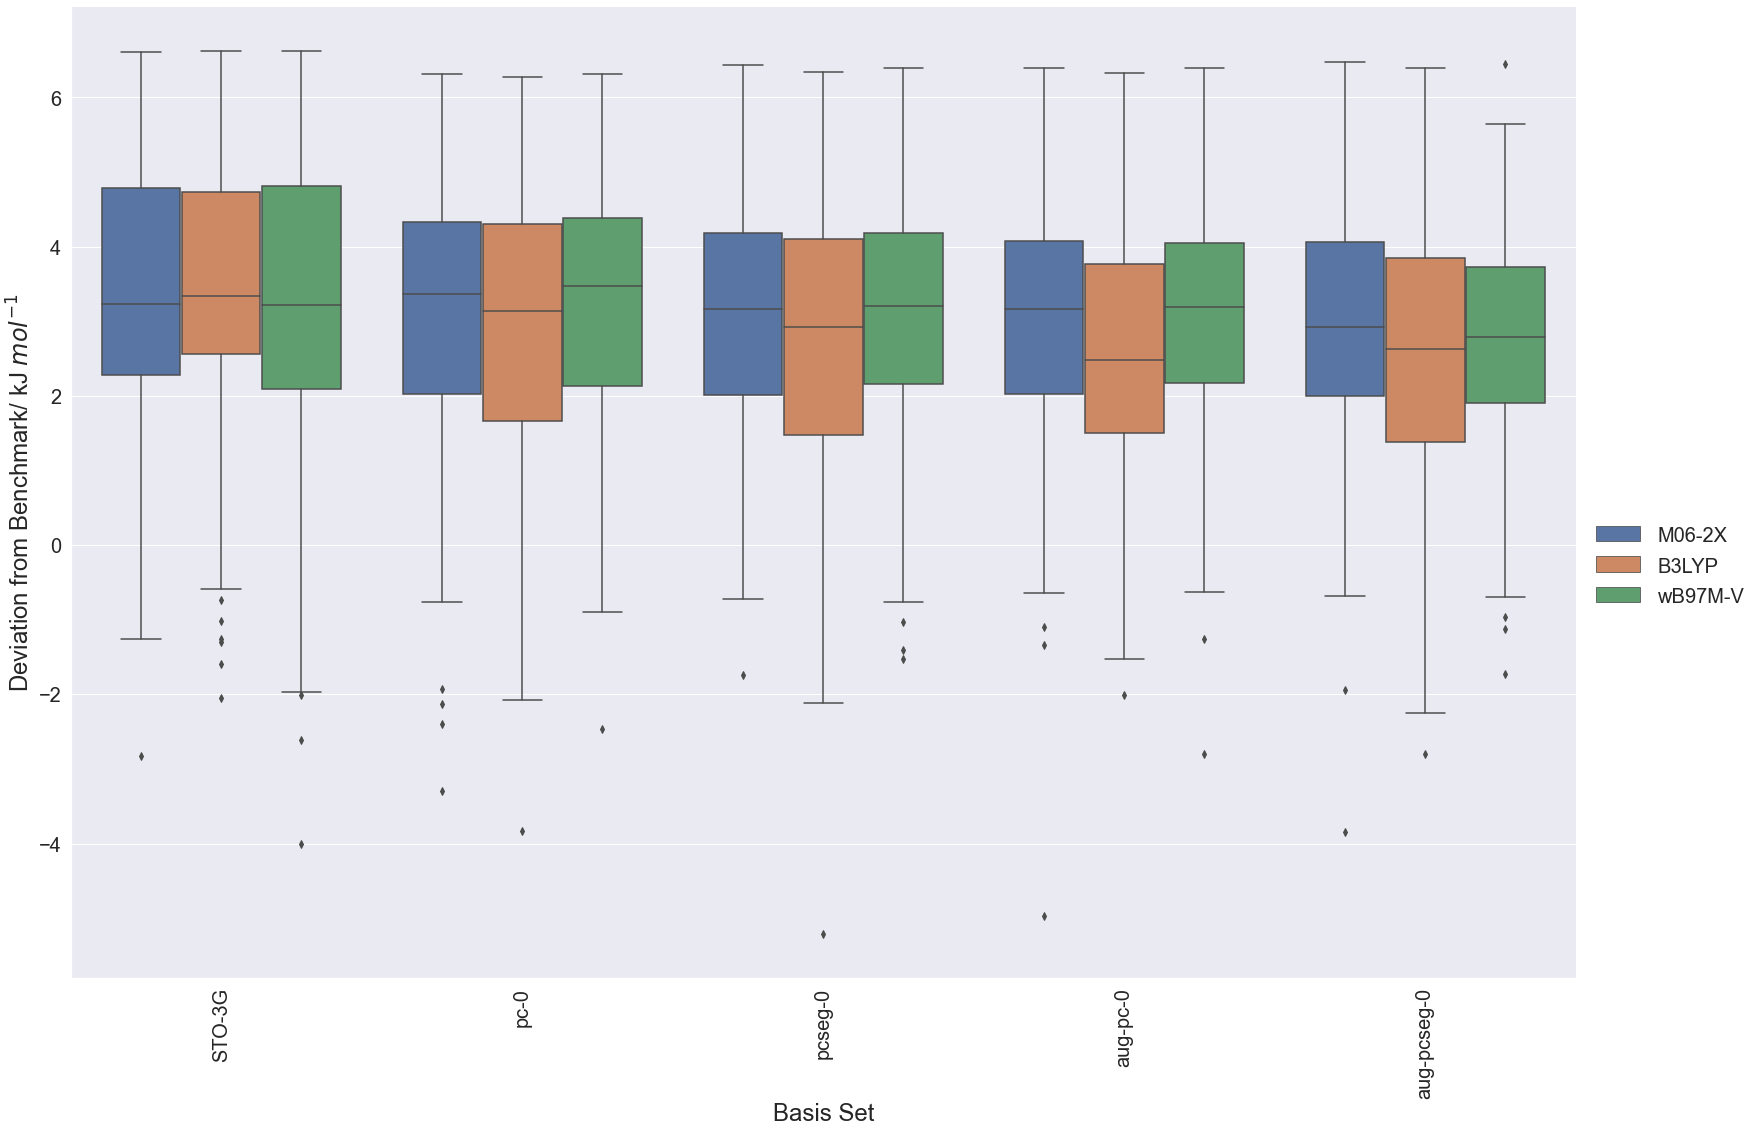

In [101]:
q = sns.catplot(data=SingleZeta, x="basis", y = "Log MAD",kind = 'box',hue="method", height = 15, aspect =1.5,order=SingleZetaOrder,hue_order=hue_order)
plt.yticks( fontsize= 20)
plt.xticks( fontsize= 20)
plt.xlabel('Basis Set', fontsize=24)
plt.ylabel("Deviation from Benchmark/ kJ $mol^{-1}$", fontsize=24)
#plt.ylim(0,1000)
legend_title = ""
q._legend.set_title(legend_title)
leg = g._legend
#leg.set_bbox_to_anchor([1.2, 0.7])
plt.setp(q._legend.get_title(), fontsize=22)
plt.setp(q._legend.get_texts(), fontsize=20);
q.set_xticklabels(rotation=90)


In [102]:
Test_DataFrame_median = pd.DataFrame(columns =['name', 'MAD', 'MSD', 'WMAD', 'method', 'basis', 'MEDIAN'])
median_list = []
for basis in full_basisset_list:
    for method in full_method_list:
        PURPLEPURPLEPURPLE = new_df.loc[new_df['basis'] == f'{basis}']
        YELLOWYELLOWYELLOW = PURPLEPURPLEPURPLE.loc[PURPLEPURPLEPURPLE['method'] == f'{method}']
        median_value = np.nanmedian(YELLOWYELLOWYELLOW['MAD'])
        standard_deviation = np.nanstd(YELLOWYELLOWYELLOW['MAD'])
        
        
        BLACKBLACKBLACK = means.loc[means['basis'] == f'{basis}']
        MAGENTAMAGENTAMAGENTA = BLACKBLACKBLACK.loc[BLACKBLACKBLACK['method'] == f'{method}']
        
        
        MAGENTAMAGENTAMAGENTA['MEDIAN'] = median_value
        MAGENTAMAGENTAMAGENTA['STD'] = standard_deviation
        Test_DataFrame_median =Test_DataFrame_median.append(MAGENTAMAGENTAMAGENTA)

/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_89862/3475574793.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAGENTAMAGENTAMAGENTA['MEDIAN'] = median_value
/var/folders/sn/3_cfmsmd3wzg8vpmz4svp33w0000gn/T/ipykernel_89862/3475574793.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MAGENTAMAGENTAMAGENTA['STD'] = standard_deviation


In [103]:
Test_DataFrame_median

name        MAD        MSD       WMAD   method      basis  \
0     M06-2X_6-31++G  29.578455  11.781686  72.154281   M06-2X    6-31++G   
0      B3LYP_6-31++G  42.983700  22.529641  92.381345    B3LYP    6-31++G   
0    wB97M-V_6-31++G  36.406823  19.272366  71.014505  wB97M-V    6-31++G   
0   M06-2X_6-31++Gdd  11.605848   4.849148  29.658793   M06-2X  6-31++Gdd   
0    B3LYP_6-31++Gdd  19.325027   9.119966  61.091517    B3LYP  6-31++Gdd   
..               ...        ...        ...        ...      ...        ...   
0      B3LYP_pcseg-1  22.864846  12.239743  68.067463    B3LYP    pcseg-1   
0    wB97M-V_pcseg-1  16.424677   7.659742  53.667243  wB97M-V    pcseg-1   
0     M06-2X_pcseg-2   7.032545   2.717562  21.284701   M06-2X    pcseg-2   
0      B3LYP_pcseg-2  17.504986   7.124323  63.341137    B3LYP    pcseg-2   
0    wB97M-V_pcseg-2   6.722732   2.935514  17.431165  wB97M-V    pcseg-2   

       MEDIAN        STD  
0    9.251259  66.675912  
0   17.013614  70.044596  
0    9.339624  69.354858  
0    4.872171  18.370514  
0    9.011521  32.703396  
..        ...        ...  
0    9.889273  38.854840  
0    8.188915  24.871515  
0    3.046162  10.272356  
0    8.473386  34.219079  
0    2.431377  12.624064  

[105 rows x 8 columns]

In [104]:
DoubleandTripleZetaMedian=Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'cc-pVTZ']
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-cc-pVTZ'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVPP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-TZVPD'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pc-2'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pcseg-2'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pc-2'])

#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31G'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31+G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31Gdd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31+Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31G_2df_p'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31++G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-31++Gdd'])

#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311Gdd'])
#DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311+G'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311+Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311Gd'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == '6-311G_2df_p'])

DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-SVP'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'def2-SVPD'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pc-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'pcseg-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pc-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-pcseg-1'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'cc-pVDZ'])
DoubleandTripleZetaMedian=DoubleandTripleZetaMedian.append(Test_DataFrame_median.loc[Test_DataFrame_median['basis'] == 'aug-cc-pVDZ'])

In [105]:
DoubleandTripleZetaMedian

name        MAD        MSD       WMAD   method  \
0        M06-2X_cc-pVTZ   9.733145   3.811654  29.111169   M06-2X   
0         B3LYP_cc-pVTZ  19.014358   8.598143  63.713999    B3LYP   
0       wB97M-V_cc-pVTZ   9.525735   4.496891  30.005796  wB97M-V   
0    M06-2X_aug-cc-pVTZ   7.325869   1.658319  20.970243   M06-2X   
0     B3LYP_aug-cc-pVTZ  17.070445   6.059948  76.940238    B3LYP   
..                  ...        ...        ...        ...      ...   
0         B3LYP_cc-pVDZ  25.308624  14.231439  77.414494    B3LYP   
0       wB97M-V_cc-pVDZ  19.200703   8.878581  62.644262  wB97M-V   
0    M06-2X_aug-cc-pVDZ  10.116807   5.259226  21.846568   M06-2X   
0     B3LYP_aug-cc-pVDZ  17.442157   9.340493  50.271137    B3LYP   
0   wB97M-V_aug-cc-pVDZ  10.851609   5.378406  24.856953  wB97M-V   

          basis     MEDIAN        STD  
0       cc-pVTZ   3.625621  13.991080  
0       cc-pVTZ   8.459830  33.626413  
0       cc-pVTZ   3.890283  15.362866  
0   aug-cc-pVTZ   3.278303  11.035553  
0   aug-cc-pVTZ   7.170304  29.647120  
..          ...        ...        ...  
0       cc-pVDZ  13.145433  37.374117  
0       cc-pVDZ   8.939700  26.867534  
0   aug-cc-pVDZ   4.739199  14.752186  
0   aug-cc-pVDZ   8.052813  32.730770  
0   aug-cc-pVDZ   3.934946  19.039444  

[75 rows x 8 columns]

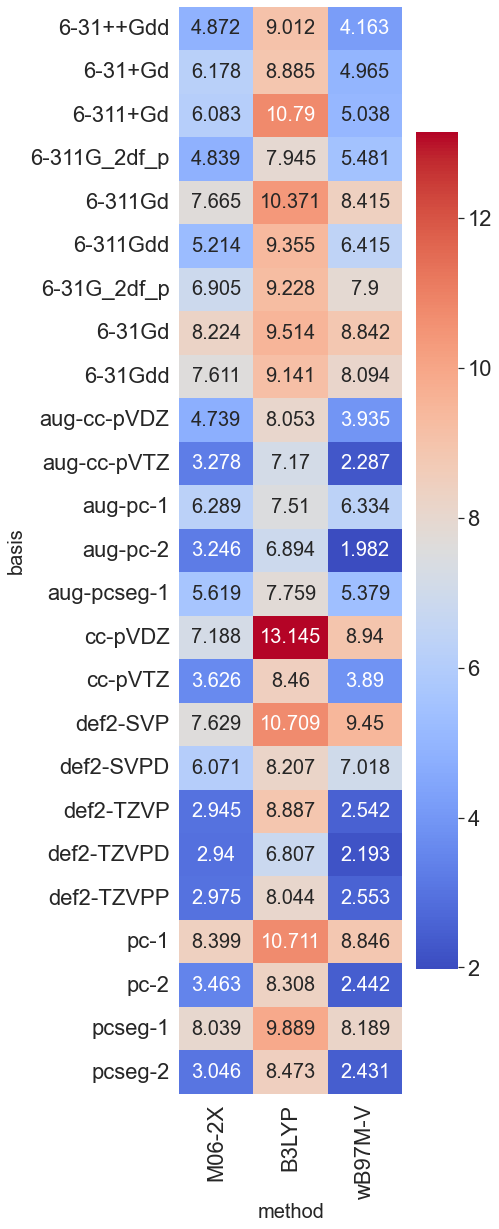

In [106]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZetaMedian.pivot_table(values='MEDIAN',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap = df_heatmap.round(decimals=3)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

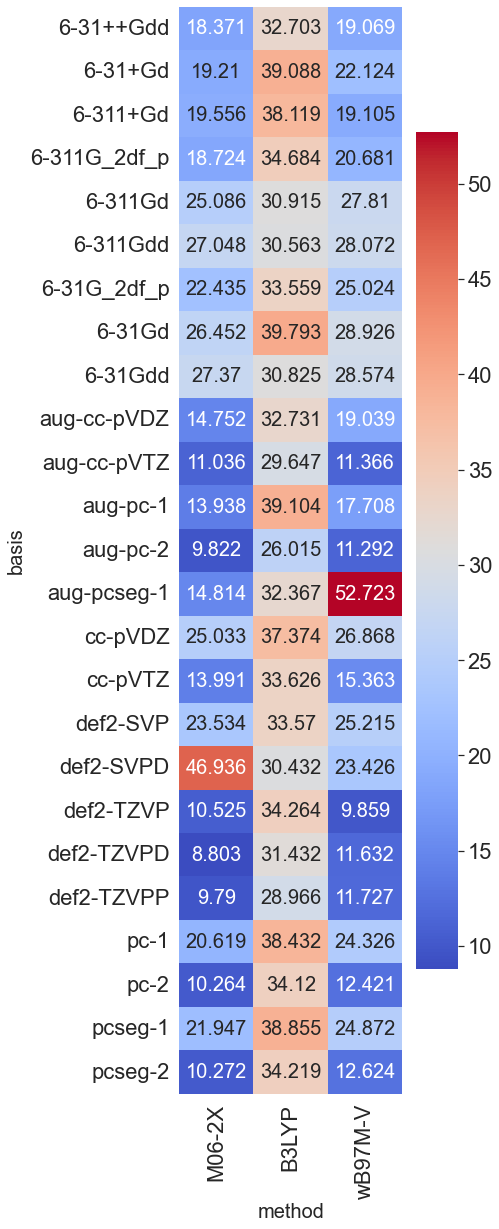

In [107]:
plt.figure(figsize = (5,20))
sns.set(font_scale=2)
df_heatmap = DoubleandTripleZetaMedian.pivot_table(values='STD',index='basis',columns='method')
df_heatmap=df_heatmap.reindex(columns=['M06-2X','B3LYP','wB97M-V'])
df_heatmap = df_heatmap.round(decimals=3)
z=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm",fmt='g',annot_kws={"fontsize":20})
plt.xlabel('method',fontsize=20)
plt.ylabel('basis',fontsize=20)
#z.set_xticklabels(rotation=90)
plt.show()

In [108]:
new_df

Reaction id    Database         variable       value   method    basis  \
0        ACONF_11   11.012297   M06-2X_6-31++G    8.917241   M06-2X  6-31++G   
1        ACONF_14   12.899284   M06-2X_6-31++G   10.749396   M06-2X  6-31++G   
2         AHB21_6 -106.775774   M06-2X_6-31++G -113.322399   M06-2X  6-31++G   
3        AHB21_10 -156.105181   M06-2X_6-31++G -182.279688   M06-2X  6-31++G   
4        AHB21_15  -36.066113   M06-2X_6-31++G  -45.262878   M06-2X  6-31++G   
...           ...         ...              ...         ...      ...      ...   
13540    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
13541    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
13542    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
13543   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
13544   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source       WMAD   Log MAD  
0       2.095057   2.095057       ACONF  64.000000  0.739581  
1       2.149888   2.149888       ACONF  66.000000  0.765416  
2       6.546625   6.546625       AHB21  16.000000  1.878950  
3      26.174507  26.174507       AHB21  66.000000  3.264786  
4       9.196765   9.196765       AHB21  23.000000  2.218852  
...          ...        ...         ...        ...       ...  
13540   5.457959   5.457959      YBDE18   6.276653  1.697075  
13541  11.533865  11.533865      YBDE18  13.263945  2.445287  
13542  12.007651  12.007651      YBDE18  13.808798  2.485544  
13543  31.636432  31.636432      YBDE18  36.381897  3.454309  
13544   8.245244   8.245244      YBDE18   9.482030  2.109637  

[13545 rows x 11 columns]

In [109]:
YELLOWYELLOWYELLOW

Reaction id    Database         variable       value   method    basis  \
13416    ACONF_11   11.012297  wB97M-V_pcseg-2   11.105519  wB97M-V  pcseg-2   
13417    ACONF_14   12.899284  wB97M-V_pcseg-2   12.411783  wB97M-V  pcseg-2   
13418     AHB21_6 -106.775774  wB97M-V_pcseg-2 -119.212200  wB97M-V  pcseg-2   
13419    AHB21_10 -156.105181  wB97M-V_pcseg-2 -180.595281  wB97M-V  pcseg-2   
13420    AHB21_15  -36.066113  wB97M-V_pcseg-2  -44.858524  wB97M-V  pcseg-2   
...           ...         ...              ...         ...      ...      ...   
13540    YBDE18_6  216.480354  wB97M-V_pcseg-2  211.022395  wB97M-V  pcseg-2   
13541    YBDE18_8  224.806521  wB97M-V_pcseg-2  213.272656  wB97M-V  pcseg-2   
13542    YBDE18_9  136.314842  wB97M-V_pcseg-2  124.307191  wB97M-V  pcseg-2   
13543   YBDE18_13  218.739715  wB97M-V_pcseg-2  187.103283  wB97M-V  pcseg-2   
13544   YBDE18_16  251.500465  wB97M-V_pcseg-2  243.255221  wB97M-V  pcseg-2   

             MSD        MAD Data Source       WMAD   Log MAD  
13416  -0.093221   0.093221       ACONF   2.888928 -2.372779  
13417   0.487501   0.487501       ACONF  15.107660 -0.718463  
13418  12.436426  12.436426       AHB21  31.464157  2.520630  
13419  24.490100  24.490100       AHB21  61.959954  3.198269  
13420   8.792411   8.792411       AHB21  22.244801  2.173889  
...          ...        ...         ...        ...       ...  
13540   5.457959   5.457959      YBDE18   6.276653  1.697075  
13541  11.533865  11.533865      YBDE18  13.263945  2.445287  
13542  12.007651  12.007651      YBDE18  13.808798  2.485544  
13543  31.636432  31.636432      YBDE18  36.381897  3.454309  
13544   8.245244   8.245244      YBDE18   9.482030  2.109637  

[129 rows x 11 columns]

In [110]:
#PDF AND OVERLAP STATISTIC SEE IF OVERLAP GOOD

In [111]:
baby_sample = norm.rvs(loc=20,scale=0.6,size=1000)

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

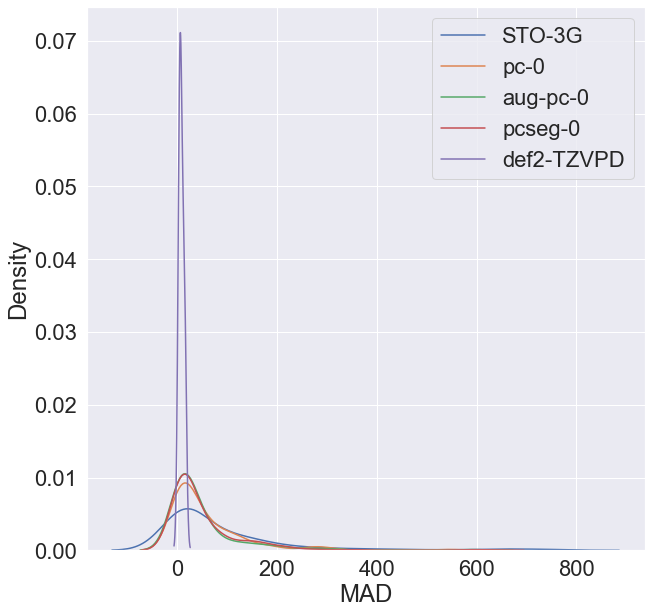

In [112]:
plt.figure(figsize = (10,10))

sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'STO-3G']['MAD'],hist=False,bins=10000,label='STO-3G')
sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'pc-0']['MAD'],hist=False,bins=10000,label='pc-0')
sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'aug-pc-0']['MAD'],hist=False,bins=10000,label='aug-pc-0')
sns.distplot(SingleZeta.loc[SingleZeta['basis'] == 'pcseg-0']['MAD'],hist=False,bins=10000,label='pcseg-0')
sns.distplot(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'def2-TZVPD']['MAD'],hist=False,bins=10000,label='def2-TZVPD')
#sns.distplot(DoubleandTripleZetaMedian.loc[DoubleandTripleZetaMedian['basis'] == 'cc-pVTZ']['MAD'],hist=False,bins=10000,label='cc-pVTZ')
plt.legend()
#plt.xlim(0,120)

###### 